In [3]:
library(dplyr)   
library(caret)
library(tidyverse)

load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_finale.Rdata")

options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 500)

load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_iniziale.Rdata")
df <- DatiUsati1
rm(DatiUsati1)

In [7]:
df <- df[c("patientKey","icuAdmDate__icuAdmDate","icuAdmDate__icuAdmTime","centreCode","genderClear","age","degenzaPreTra","admWard_RIC_PED",
           "typeStatus_RIC","pulmonarHypertension","epatopulmonarSyndrome",
           "BleedingEsophagGastric","prevLiverTransplant","presentRefractAscites","tipps","leastOneEpathenal",
           "leastOneSpontaneousBacterial","thrombosisDegreeWithNone","portosystEncephalPresent","nutritStatus",
           "surgeonSurgery","mechanicVentilation","clifSofaForCardio","albumInfusOver7Days",
           "bilirubinaTotale","INR","serumCreatinine","Sodiemia","ratioPaO2FiO2","platCountTranspl","albumina",
           "surgeryDuration","IntraoperativTransfected","plasmaFresco","plasmaPools","doseFibrinogen","CRIOprecipitated",
           "useEmorecuper","CristalloidiComp","ColloidiComp","Albumina50Comp",
           "noradrenalineEndSurger","intermedLactates","coldIschemia","syndromeReperfus",
           "shuntPortedTemp", "anastomTechnic","venousBypass","bileAnastomosis","abdomOpenEndSurg",
           "scoreCHILD","organDonorSex","organDonorType","organDonorSampleTechnic","organDonorECMO",
           "regionalPerfusion","organDonorBiopsy","organDonorRecondOrgan",
           "organDonorProvenance","organDonorCauseOfDeath","organDonorAge", "organDonorHeight",
           "organDonorDrawalSodiemia","organDonorGammaGT","realMELD","realMELDNa","DRI","EDRI", "degenzaPostTraOSP",
           "hospOutcome_RIC","icuMortality",
           "liverDisords_buddChiariSyndrome","liverDisords_cirrhosisAlcoholic","liverDisords_cirrhosisAutoimmune","liverDisords_cirrhosisBiliaryPrimitiv",
              "liverDisords_cirrhosisBiliarySecond","liverDisords_cirrhosisCryptogenetic","liverDisords_cirrhosisDrugs","liverDisords_cirrhosisOtherRaison",
              "liverDisords_cirrhosisVirusB","liverDisords_cirrhosisVirusC","liverDisords_cirrhosisVirusD","liverDisords_cirrhosisVirusOther","liverDisords_extraEpathiBileDucts",
              "liverDisords_HCCstageI","liverDisords_HCCstageII","liverDisords_Hemochromatosis","liverDisords_hepatFulm","liverDisords_NASHpathology",
              "liverDisords_otherCholestaticDisease","liverDisords_otherCongenitBilia","liverDisords_otherIndication","liverDisords_polycysticDisease",
              "liverDisords_primitScleroColangitis","liverDisords_subAcute","liverDisords_wilsonDisease",
          "tip_ritr","oxygenTherapy","frequency","degree","organDonorMaastricht",
           "organDonorSteadyMacroscopic","organDonorRecondHypoNormoter",
          "comorbidities_none_RIC","comorbidities_asthma_RIC","comorbidities_modCOPD_RIC","comorbidities_sevCOPD_RIC",
        "comorbidities_restLunDis_RIC","comorbidities_hypertension_RIC","comorbidities_myocard_RIC","comorbidities_heartFail2_RIC",
        "comorbidities_heartFail4_RIC","comorbidities_arrhythmia_RIC","comorbidities_perVascDis_RIC","comorbidities_dementia_RIC",
        "comorbidities_cerDis_RIC","comorbidities_hemiParaQuadr_RIC","comorbidities_neuro_RIC","comorbidities_modRenal_RIC",
        "comorbidities_diab1_RIC","comorbidities_diab2NoIns_RIC","comorbidities_diab2Ins_RIC","comorbidities_drugIndCoag_RIC",
        "comorbidities_antiaggrTherapy_RIC","comorbidities_severePsychosis_RIC")]

In [11]:
df1 <- df %>% filter(degenzaPostTraOSP <= 8)

df2 <- df %>% filter(degenzaPostTraOSP > 8 & degenzaPostTraOSP <= 18)

In [21]:
paste("I pazienti con degenza minore di 8 giorni sono", nrow(df1))
paste("I pazienti con degenza compresa tra 9 e 18 giorni sono", nrow(df2))

[1] "I pazienti con degenza minore di 8 giorni sono 157"

[1] "I pazienti con degenza compresa tra 9 e 18 giorni sono 560"

In [98]:
# Data

print("<= 8")
summary(df1$icuAdmDate__icuAdmDate)

print("<= 18")
summary(df2$icuAdmDate__icuAdmDate)

[1] "<= 8"


Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2018-10-23" "2020-01-22" "2020-12-22" "2020-09-21" "2021-06-04" "2021-12-15"

[1] "<= 18"


Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2018-10-11" "2019-11-15" "2020-08-24" "2020-08-10" "2021-05-13" "2021-12-31"

In [99]:
# Orario (è una variabile "character" quindi posso confrontare solo in questo modo senza fare ulteriori modifche)

print("<= 8")
table(df1$icuAdmDate__icuAdmTime)

print("<= 18")
table(df2$icuAdmDate__icuAdmTime)

[1] "<= 8"



00:05 00:10 00:15 00:34 01:00 01:25 01:45 01:53 02:00 02:15 02:30 02:45 03:00 
    1     1     1     1     1     1     1     1     2     1     1     1     1 
03:07 03:10 03:43 04:00 04:30 05:10 05:15 06:25 06:30 09:30 10:00 10:10 11:30 
    1     1     1     1     2     1     1     1     1     1     1     1     1 
11:58 12:00 12:05 12:15 12:21 12:32 12:42 12:58 13:02 13:10 13:27 13:52 13:55 
    1     1     1     1     1     1     1     1     2     1     1     2     1 
13:56 13:57 14:00 14:04 14:10 14:11 14:12 14:13 14:15 14:16 14:17 14:18 14:30 
    1     2     4     1     1     1     1     1     2     1     1     1     1 
14:35 14:36 14:39 14:40 14:54 14:56 14:57 15:00 15:05 15:08 15:10 15:13 15:17 
    1     1     1     2     2     1     1     4     1     1     1     2     1 
15:20 15:25 15:41 15:46 15:48 15:54 16:00 16:02 16:16 16:22 16:26 16:29 16:30 
    2     1     1     1     1     1     3     1     1     1     1     1     1 
16:38 16:44 16:51 16:52 16:59 17:00 17:05 17:30 17:

[1] "<= 18"



00:10 00:15 00:20 00:28 00:30 00:35 00:45 00:50 01:00 01:15 01:23 01:24 01:29 
    1     2     1     1     2     1     1     1     3     1     1     1     1 
01:30 01:35 01:45 01:50 01:57 02:00 02:10 02:15 02:28 02:30 02:40 02:49 03:00 
    3     1     2     1     1     4     2     1     1     1     1     1     2 
03:18 03:30 03:36 03:45 03:50 03:53 03:56 04:00 04:15 04:30 04:33 04:35 04:36 
    1     2     1     1     2     1     1     3     1     3     1     1     1 
04:56 05:00 05:18 05:50 05:53 06:00 06:13 06:30 06:45 06:59 07:00 07:27 07:33 
    1     2     1     1     1     2     1     1     2     1     2     1     1 
08:00 08:30 08:49 08:50 09:42 10:00 10:03 10:04 10:30 11:00 11:19 11:24 11:30 
    2     3     1     1     1     8     1     1     1     4     2     1     1 
11:40 11:43 11:55 11:57 12:00 12:03 12:10 12:26 12:30 12:31 12:35 12:36 12:50 
    1     1     1     1     9     1     1     1     2     1     1     2     1 
13:00 13:04 13:11 13:12 13:13 13:15 13:16 13:30 13:

[1] "<= 8"



IT003 IT126 IT271 IT456 IT630 IT681 
    2    80     3    53     8    11 

[1] "<= 18"



IT003 IT126 IT236 IT271 IT456 IT630 IT681 
   25   162    12     3    73   146   139 

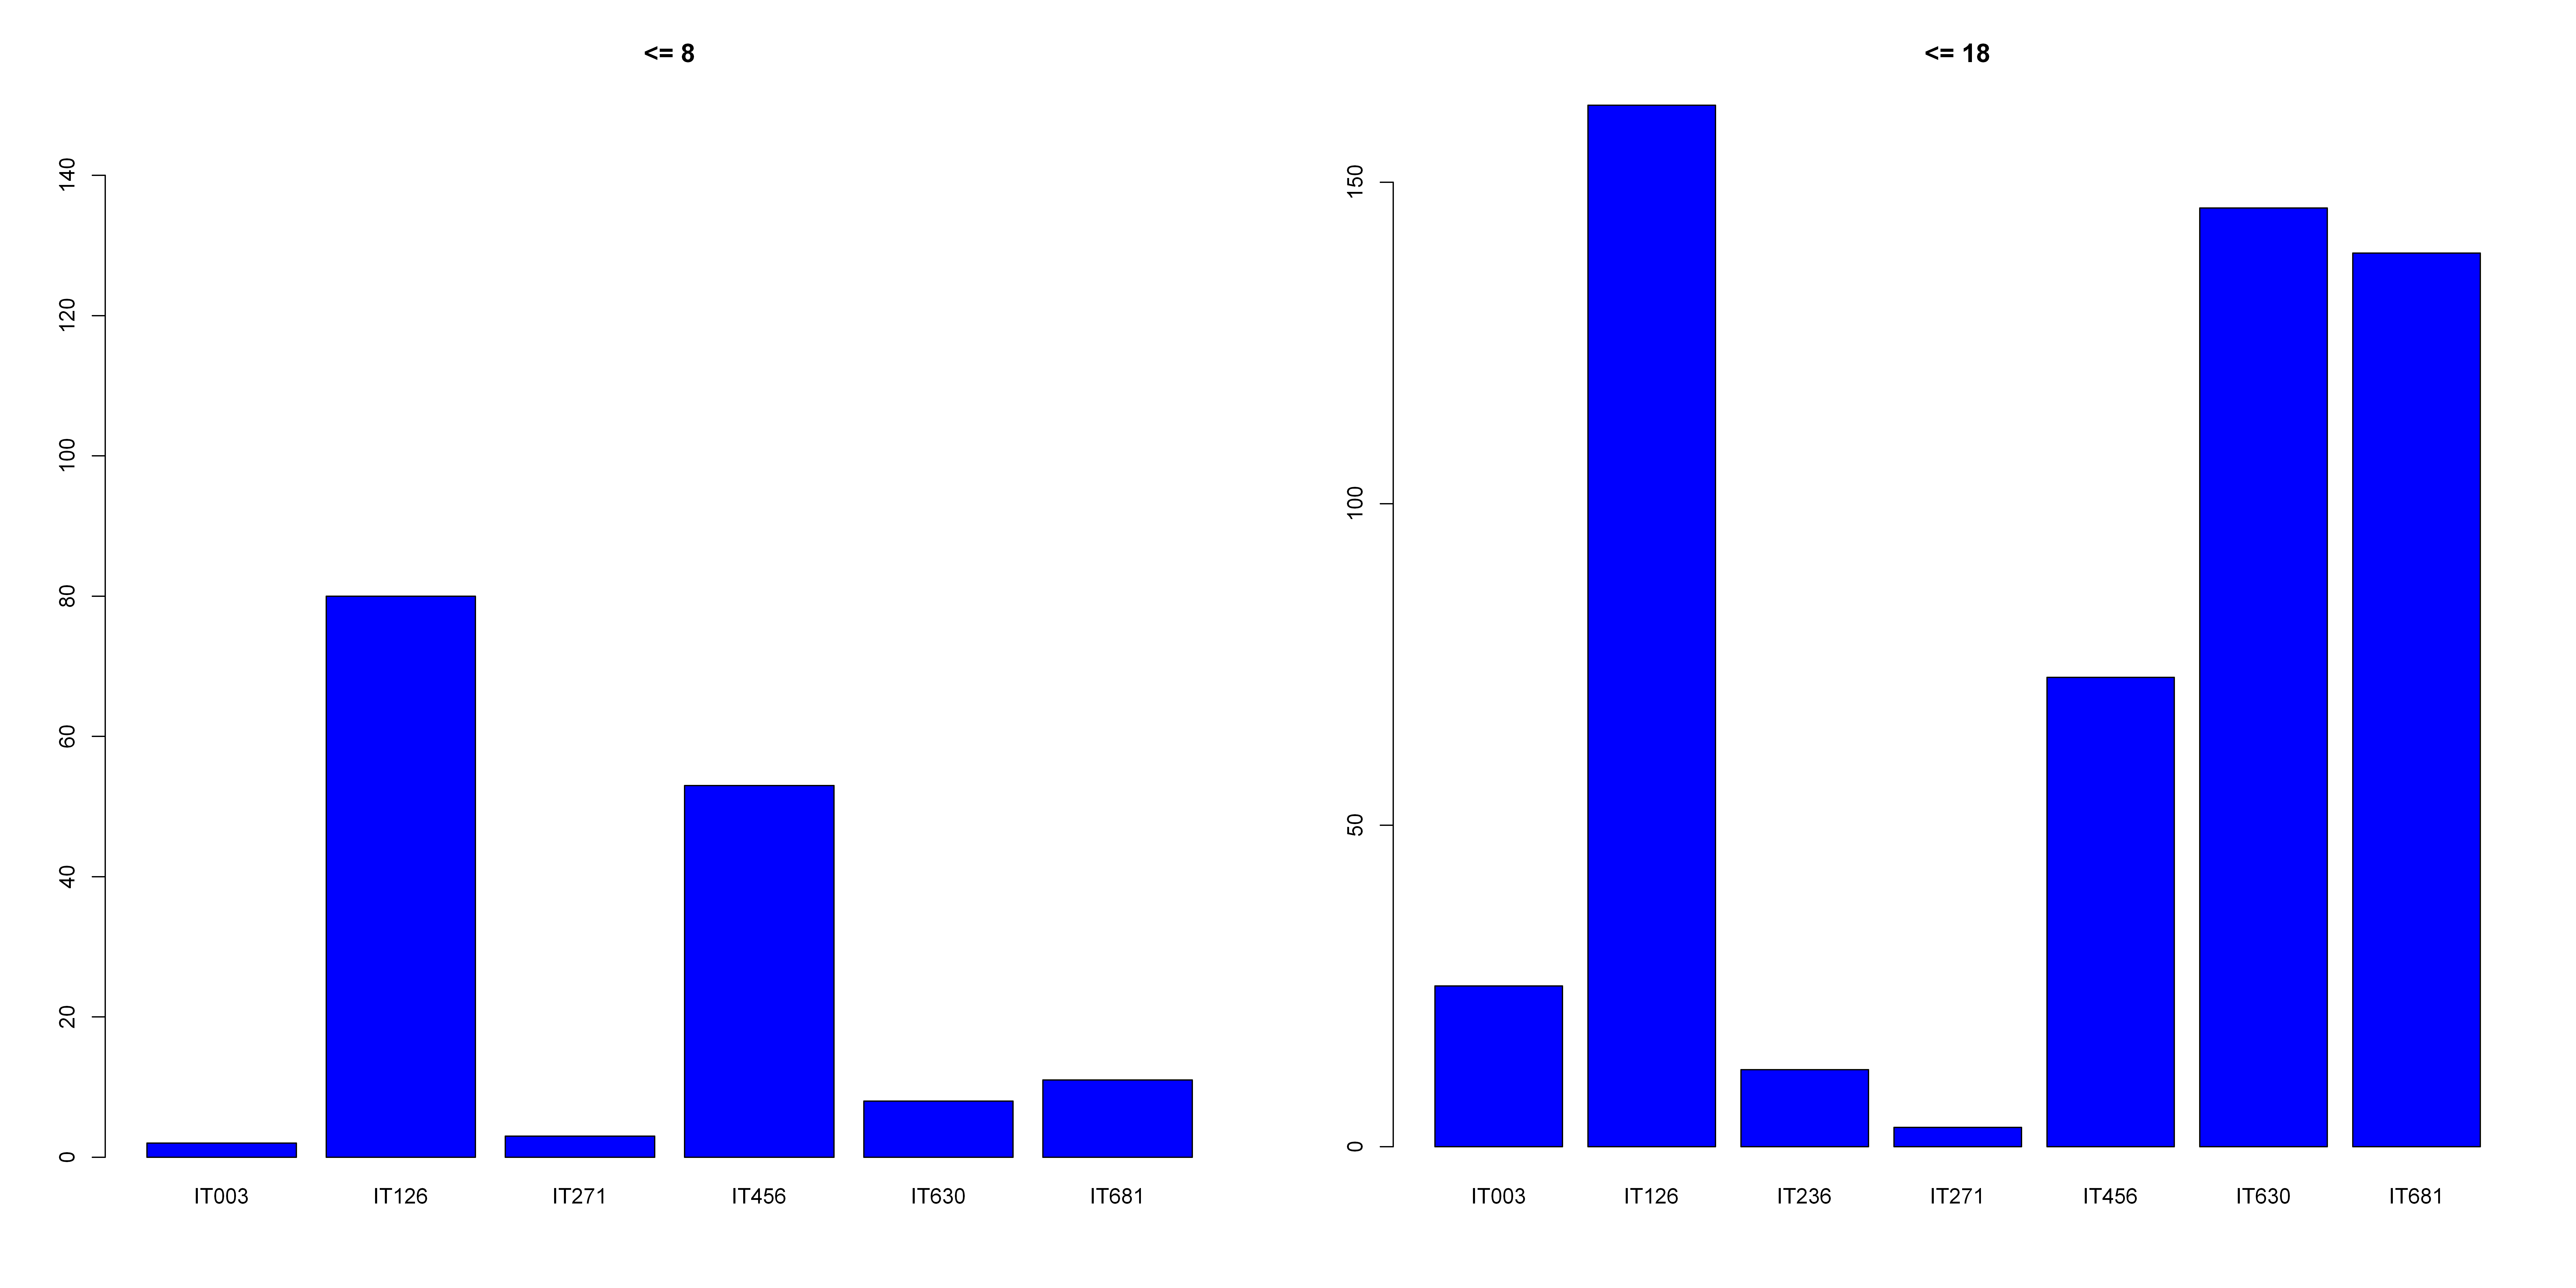

In [120]:
# Codice centro

par(mfrow=c(1,2))

print("<= 8")
table(df1$centreCode)
barplot(table(df1$centreCode), main="<= 8", col="blue", ylim = c(0, 150))

print("<= 18")
table(df2$centreCode)
barplot(table(df2$centreCode), main="<= 18", col="blue")

[1] "<= 8"



  Male Female 
   127     30 

[1] "<= 18"



  Male Female 
   388    172 

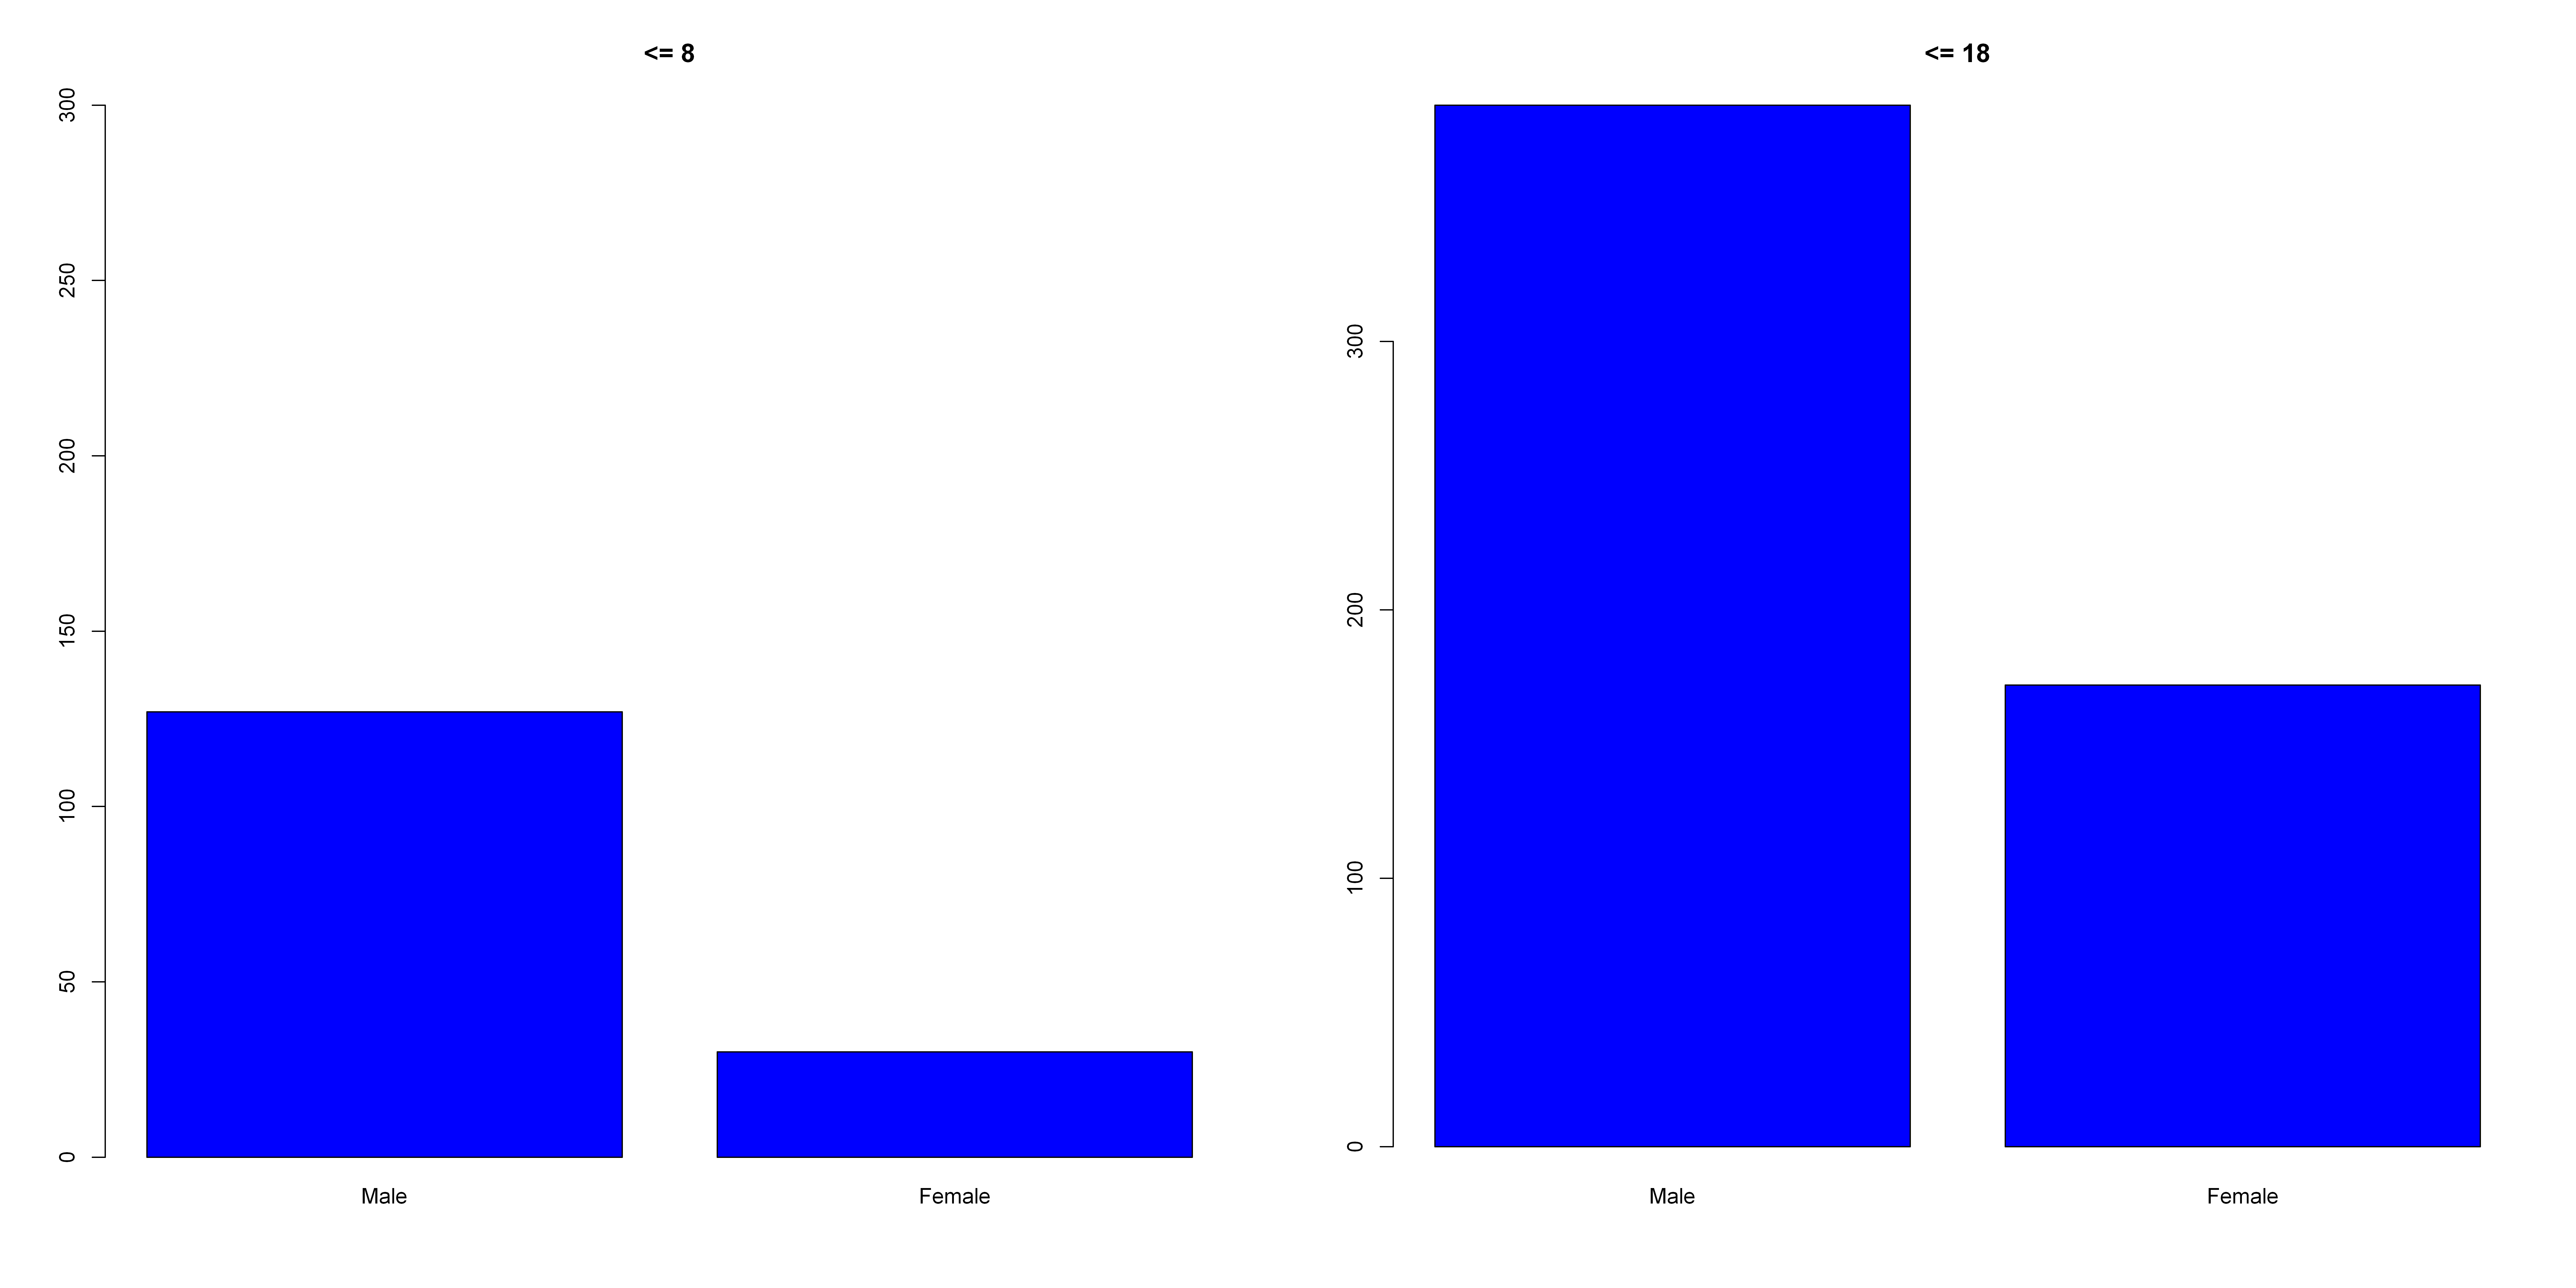

In [119]:
# Genere

par(mfrow=c(1,2))

print("<= 8")
table(df1$genderClear)
barplot(table(df1$genderClear), main="<= 8", col="blue", ylim = c(0, 300))

print("<= 18")
table(df2$genderClear)
barplot(table(df2$genderClear), main="<= 18", col="blue")

[1] "<= 8"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   21.0    53.0    59.0    56.9    64.0    75.0 

[1] "<= 18"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.00   52.75   58.00   56.42   64.00   75.00 

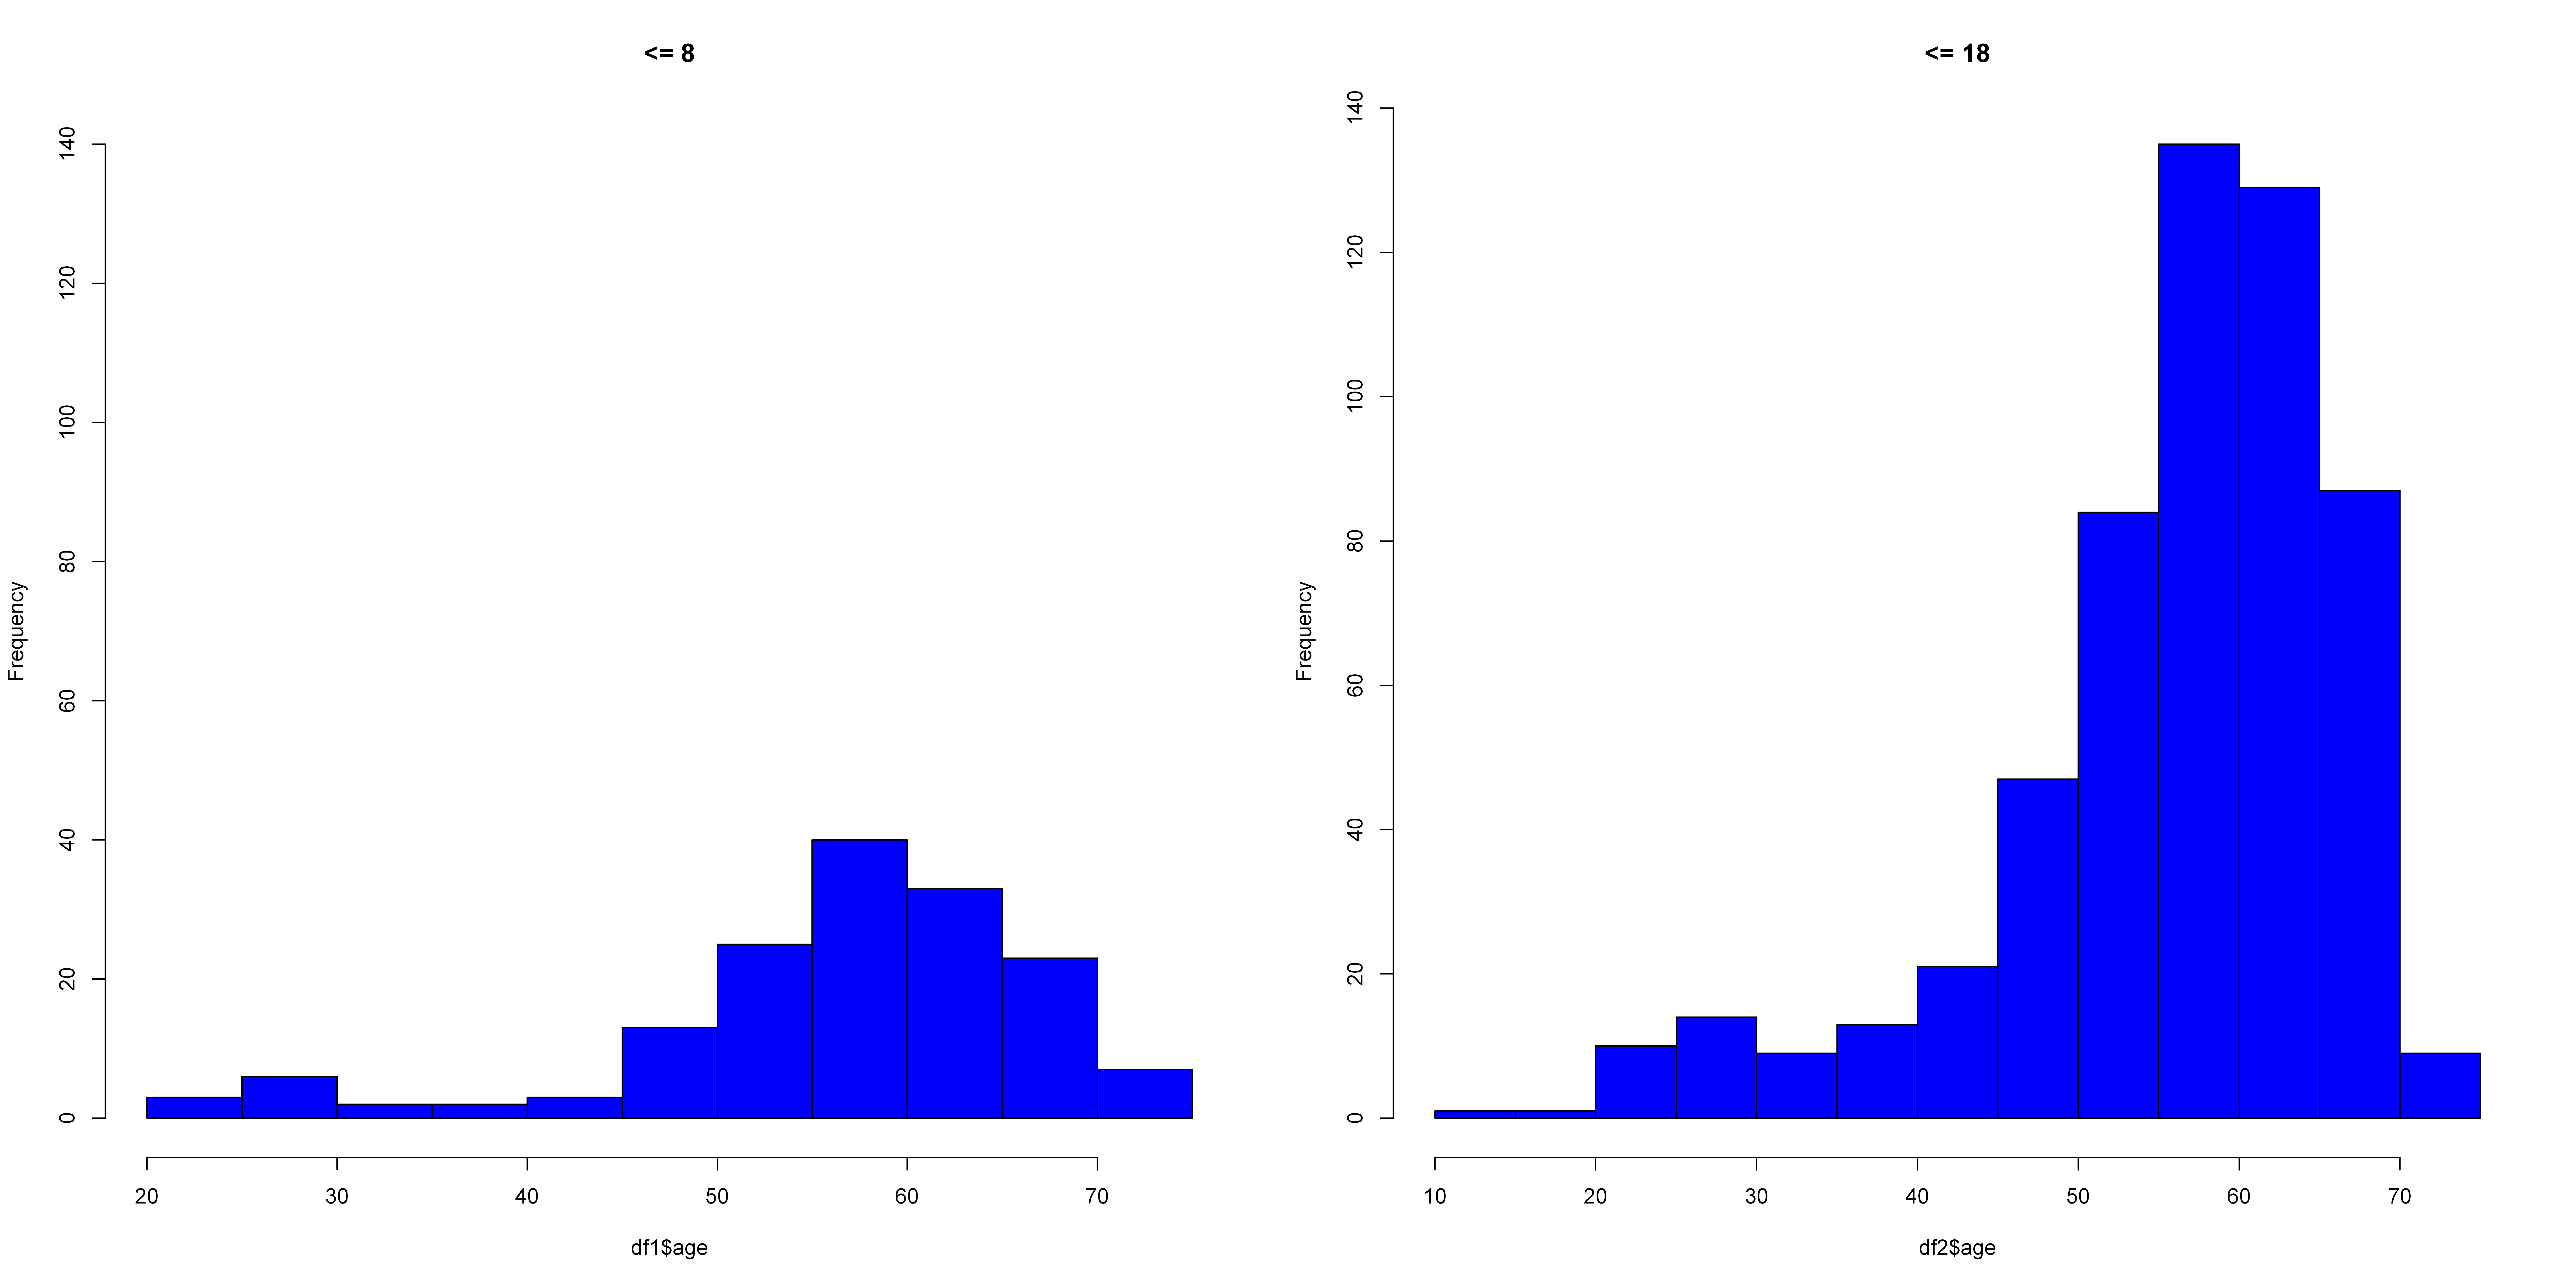

In [118]:
# Età

par(mfrow=c(1,2))

print("<= 8")
summary(df1$age)
hist(df1$age, main="<= 8", col="blue",ylim = c(0, 140))

print("<= 18")
summary(df2$age)
hist(df2$age, main="<= 18", col="blue")

[1] "<= 8"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   1.000   1.929   1.000  61.000       1 

[1] "<= 18"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   3.714   1.000  97.000 

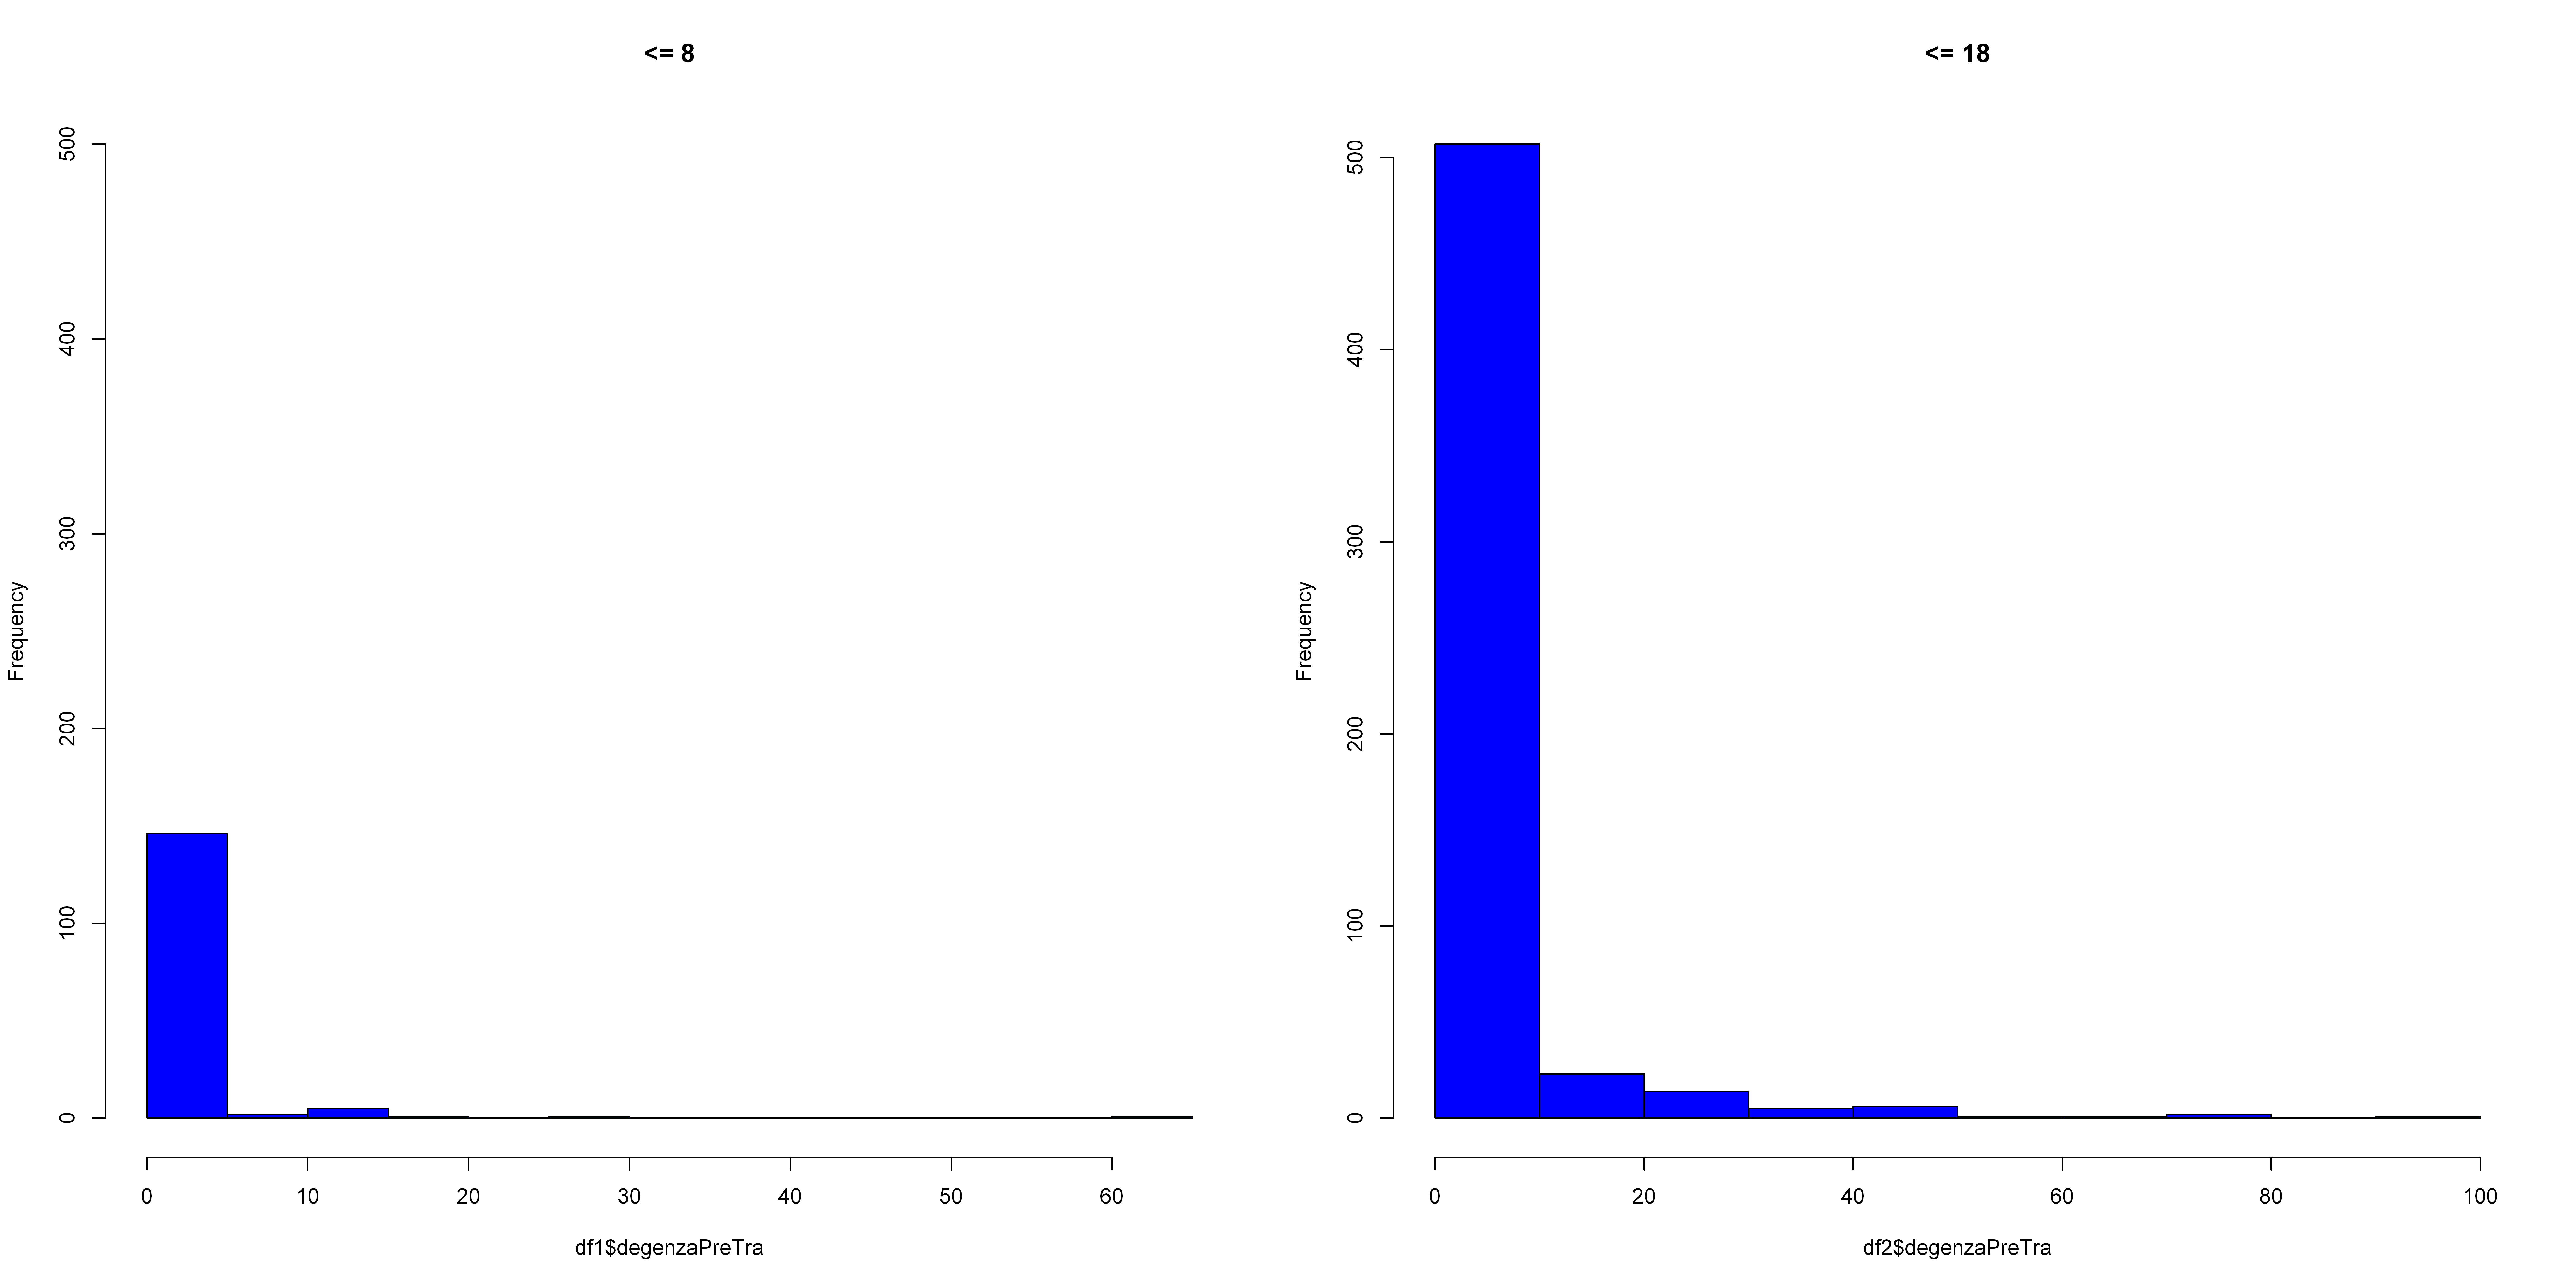

In [117]:
# Degenza pretrapianto

par(mfrow=c(1,2))

print("<= 8")
summary(df1$degenzaPreTra)
hist(df1$degenzaPreTra, main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
summary(df2$degenzaPreTra)
hist(df2$degenzaPreTra, main="<= 18", col="blue")

[1] "<= 8"



 medicalWard surgicalWard    emergRoom     otherIcu      highDep  neonatology 
          64           87            1            1            3            0 

[1] "<= 18"



 medicalWard surgicalWard    emergRoom     otherIcu      highDep  neonatology 
         130          387            4            4           34            0 

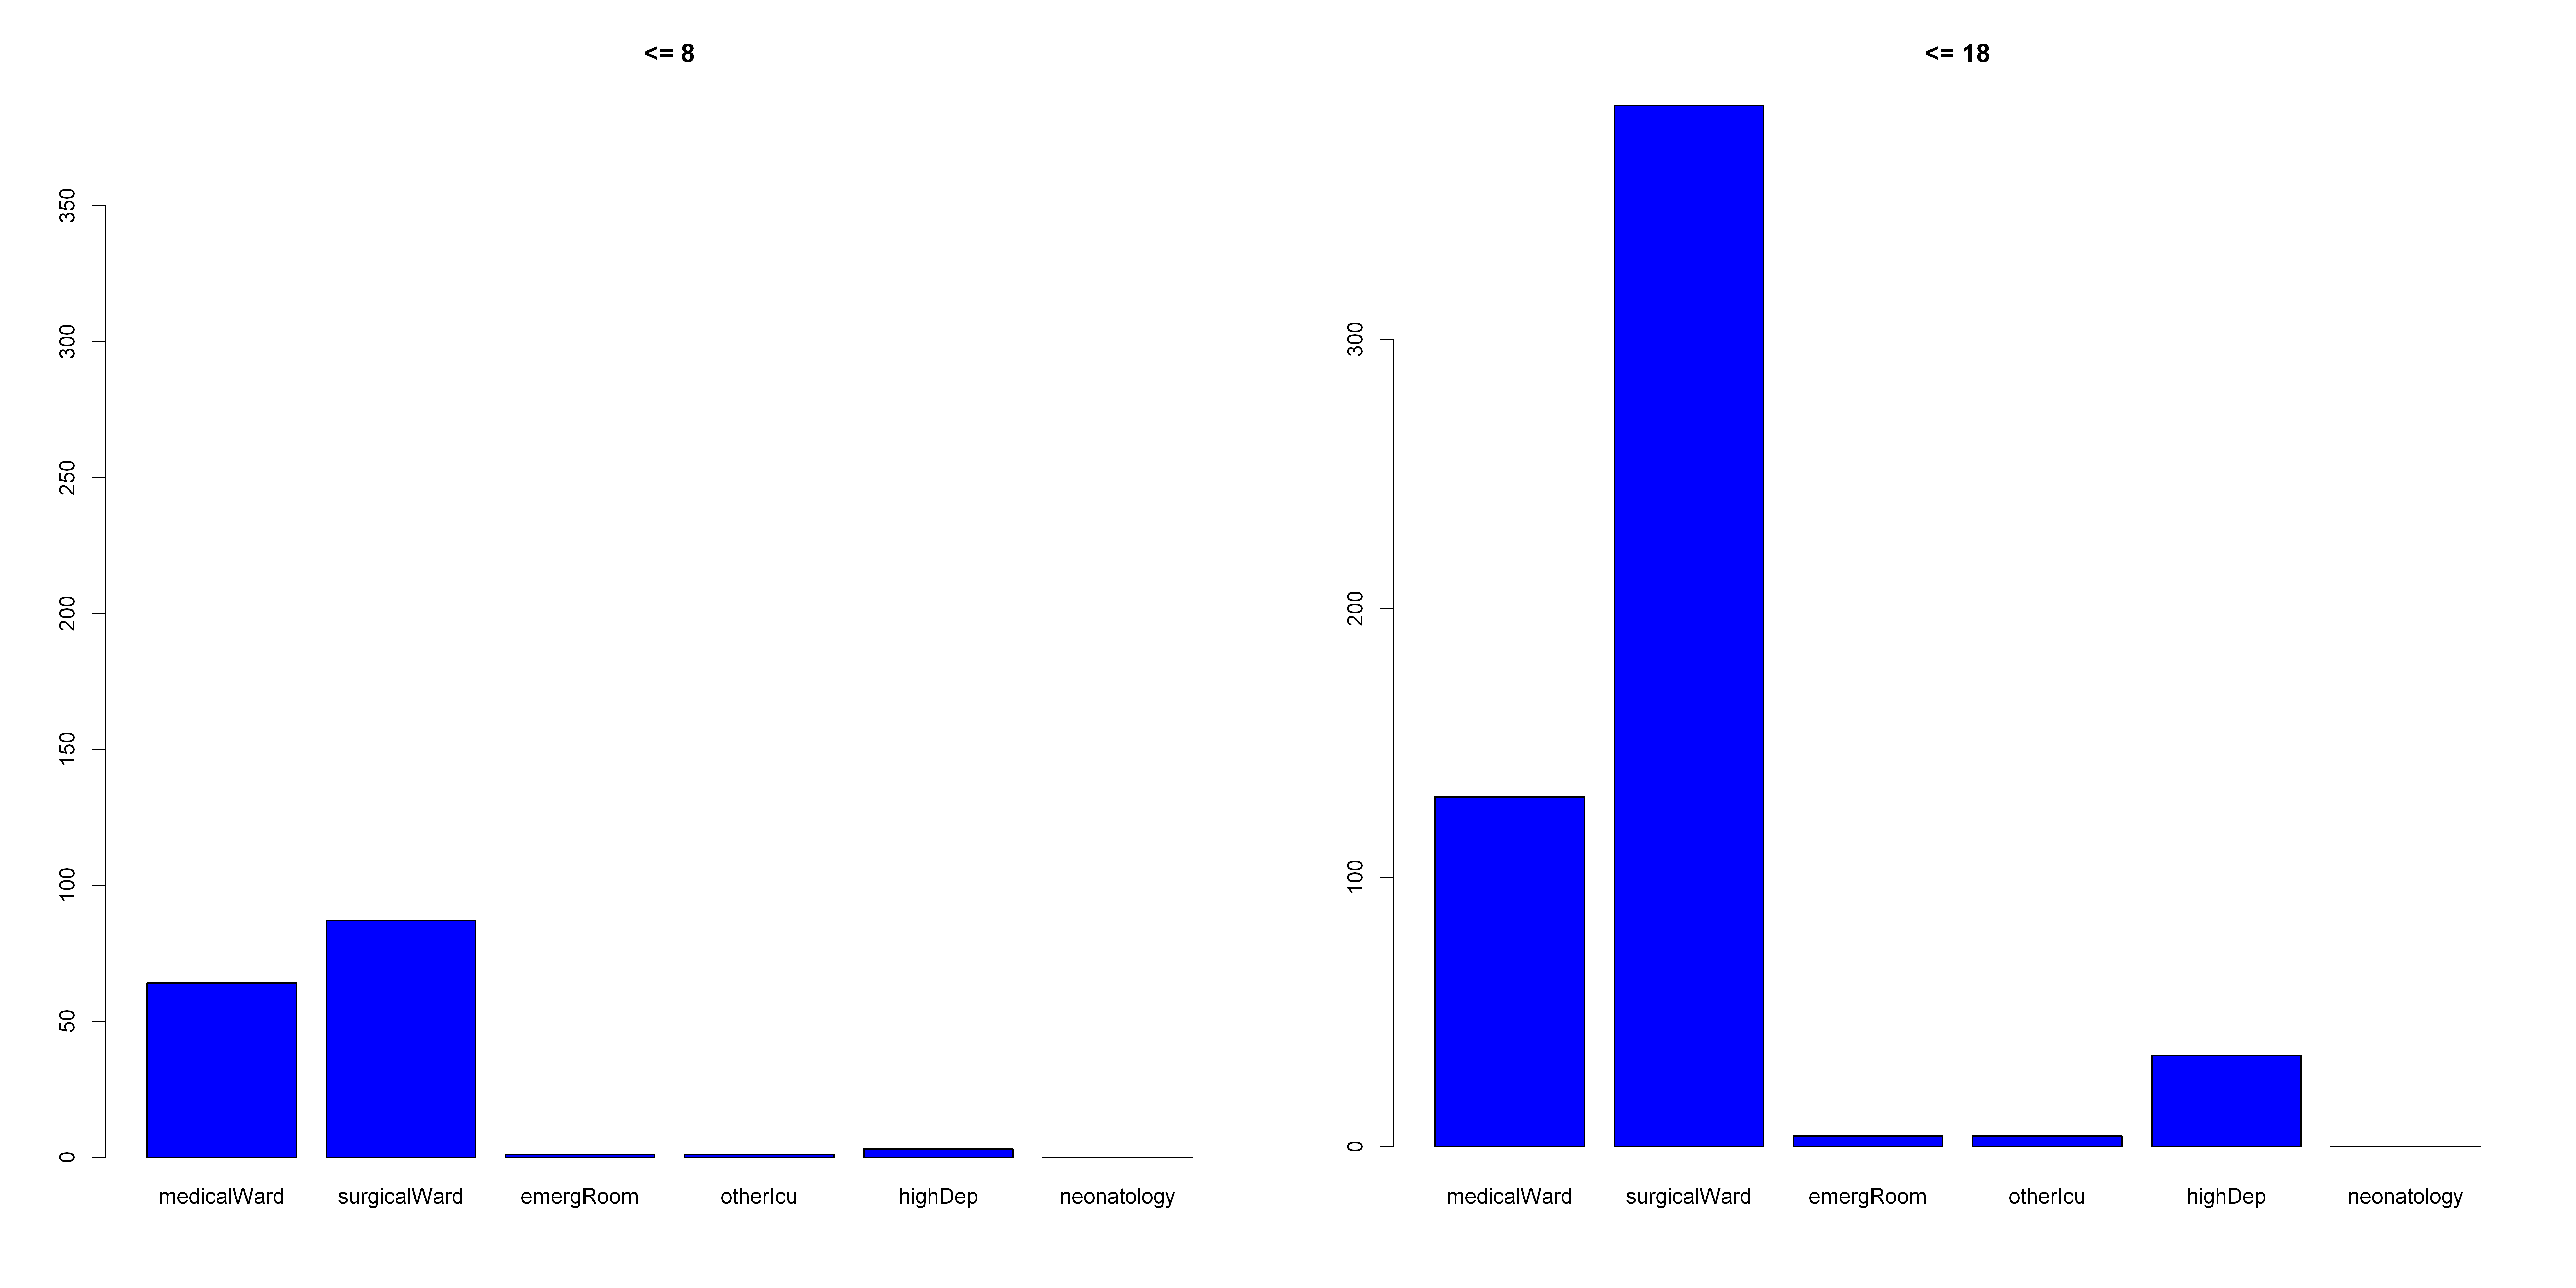

In [114]:
# Reparto

par(mfrow=c(1,2))

print("<= 8")
table(df1$admWard_RIC_PED)
barplot(table(df1$admWard_RIC_PED), main="<= 8", col="blue", ylim = c(0, 387))

print("<= 18")
table(df2$admWard_RIC_PED)
barplot(table(df2$admWard_RIC_PED), main="<= 18", col="blue")

[1] "<= 8"



  nonSurgical electSurgical emergSurgical 
            0            13           144 

[1] "<= 18"



  nonSurgical electSurgical emergSurgical 
            8            51           501 

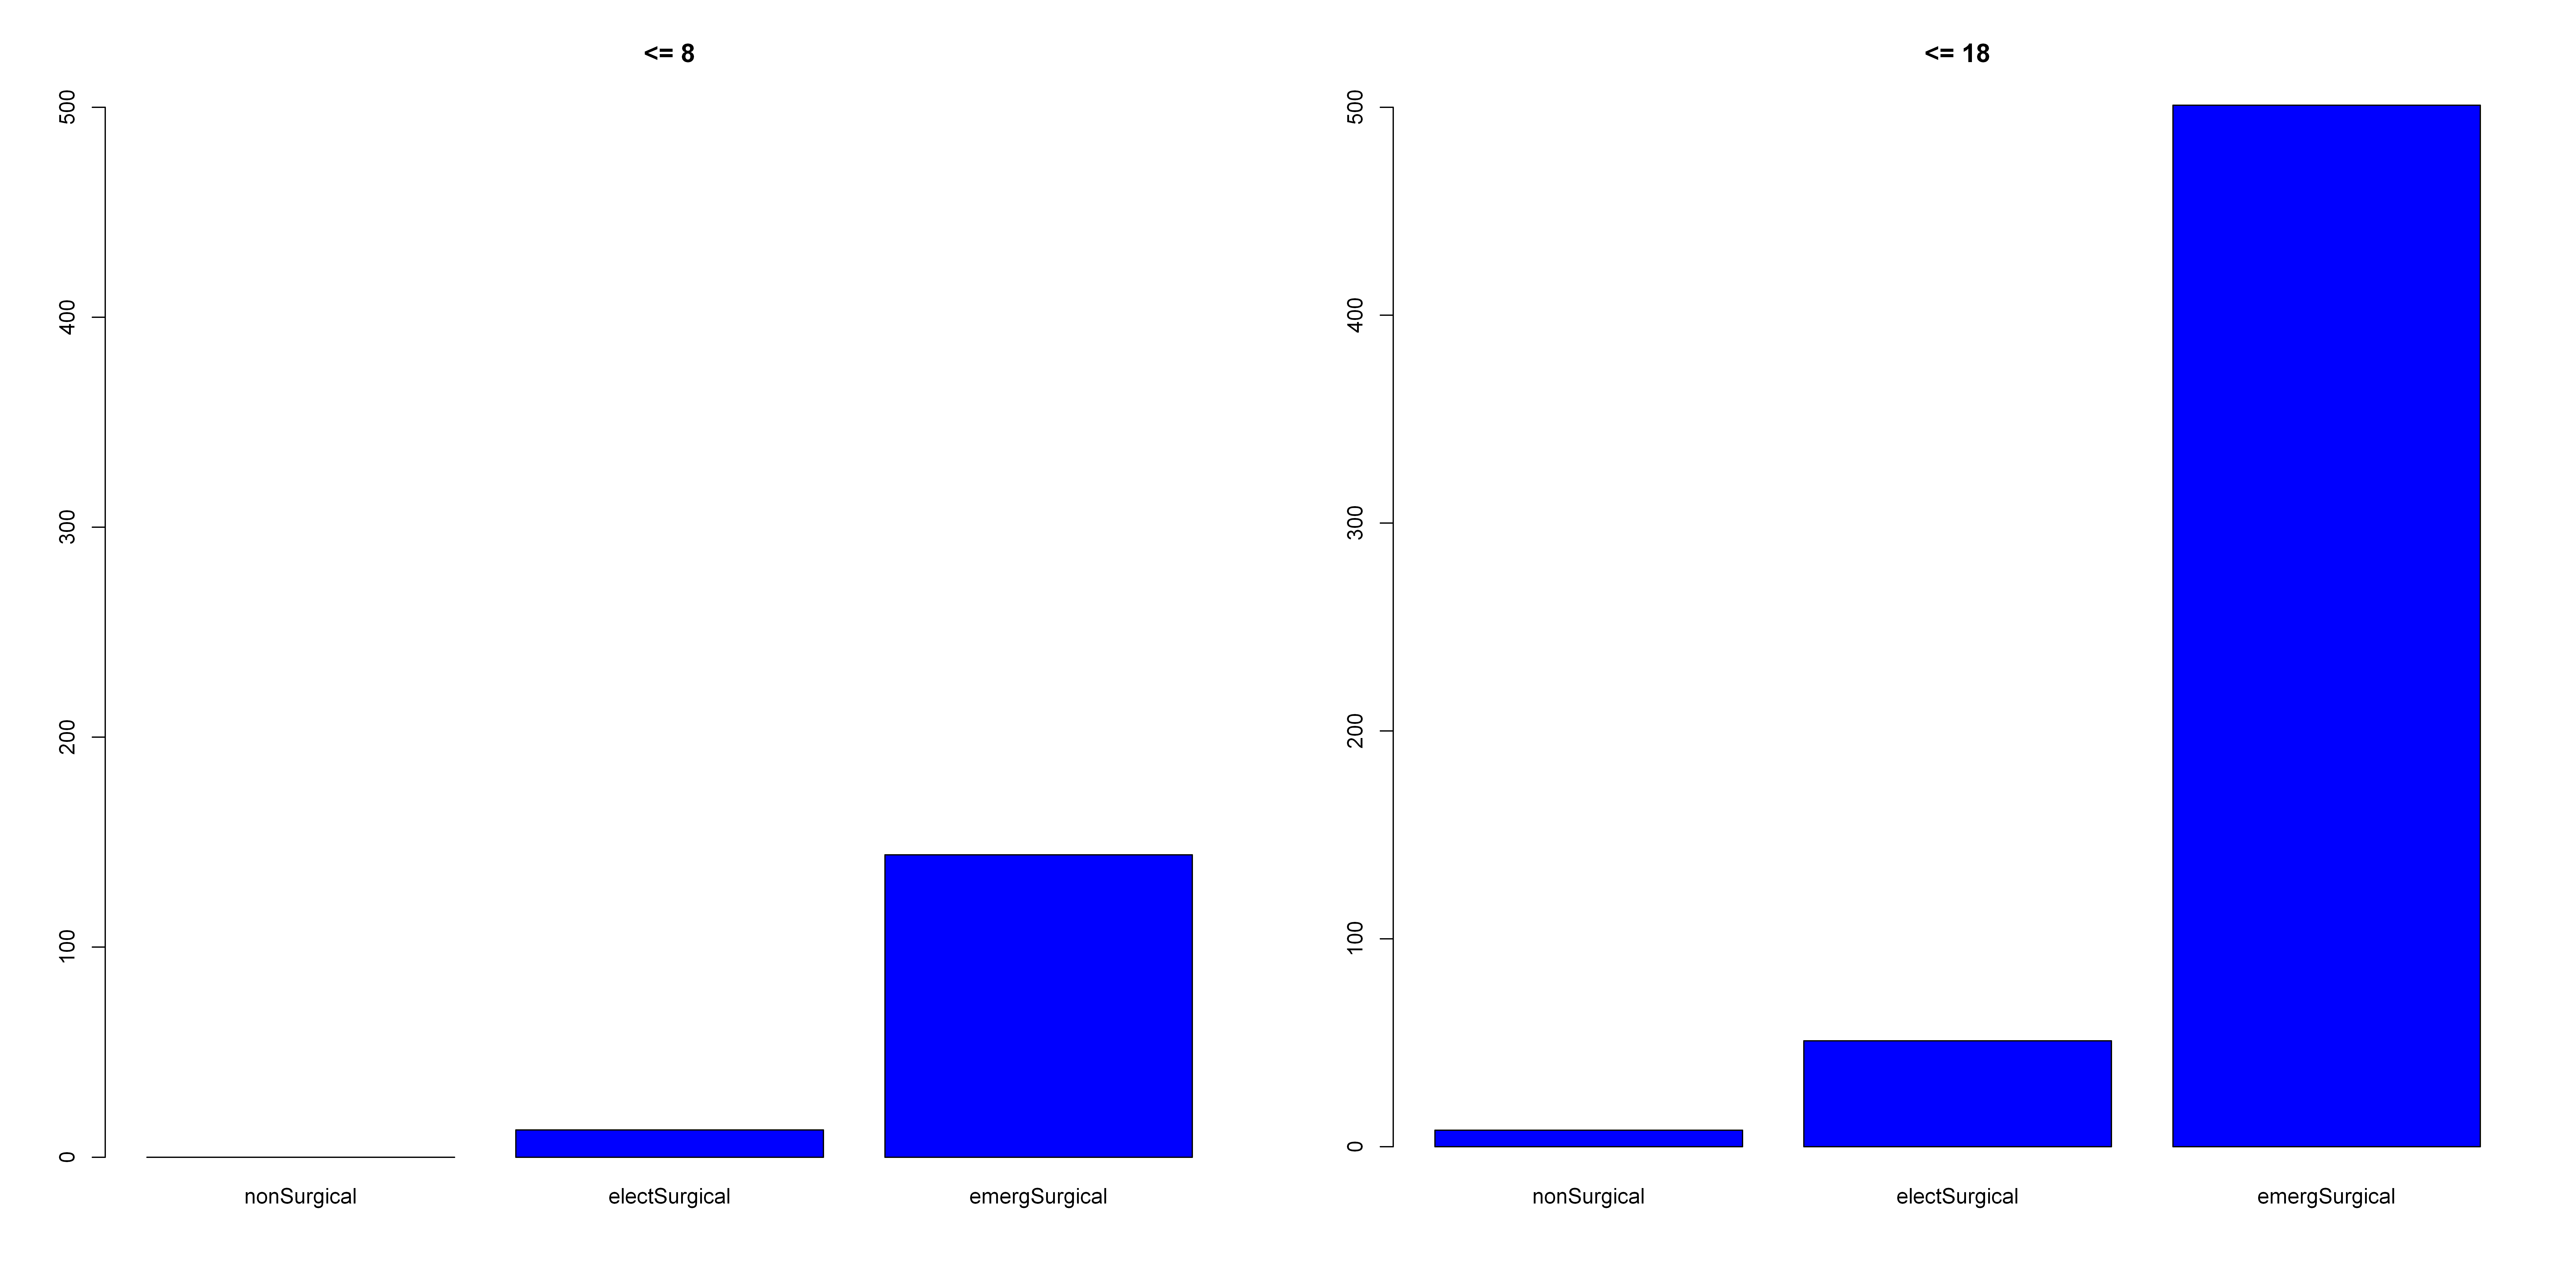

In [113]:
# Status

par(mfrow=c(1,2))

print("<= 8")
table(df1$typeStatus_RIC)
barplot(table(df1$typeStatus_RIC), main="<= 8", col="blue", ylim = c(0, 501))

print("<= 18")
table(df2$typeStatus_RIC)
barplot(table(df2$typeStatus_RIC), main="<= 18", col="blue")

[1] "<= 8"



 responsNo responsYes 
       153          4 

[1] "<= 18"



 responsNo responsYes 
       542         18 

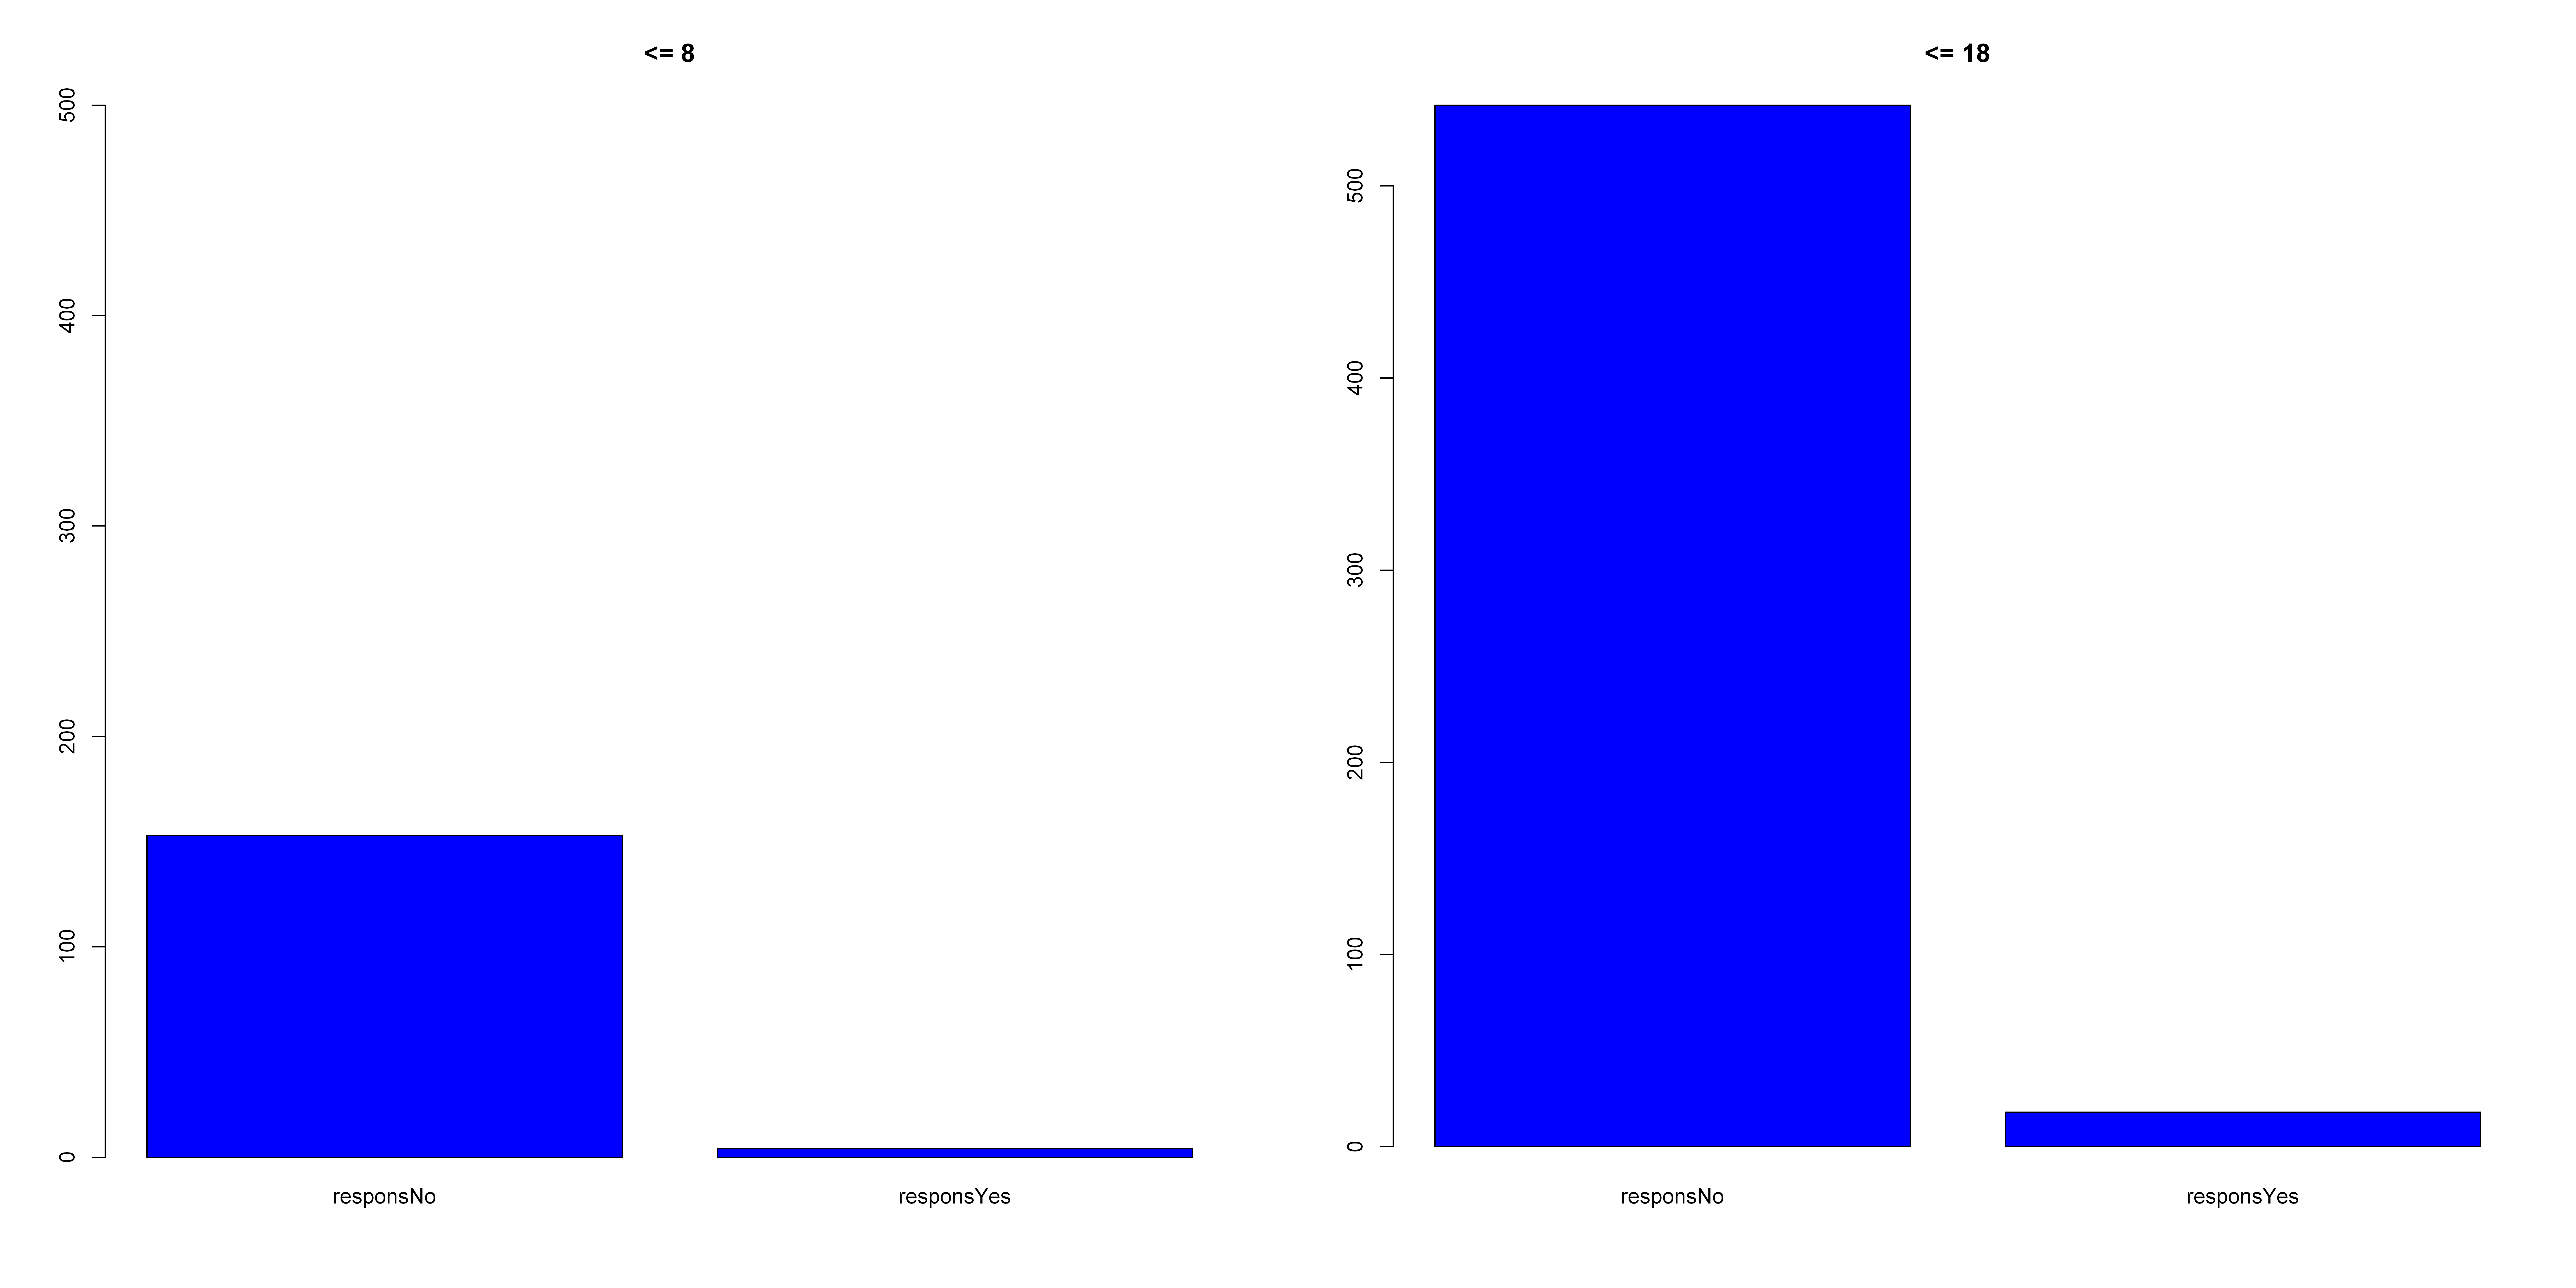

In [123]:
# Ipertensione polmonare

par(mfrow=c(1,2))

print("<= 8")
table(df1$pulmonarHypertension)
barplot(table(df1$pulmonarHypertension), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$pulmonarHypertension)
barplot(table(df2$pulmonarHypertension), main="<= 18", col="blue")

[1] "<= 8"



 responsNo responsYes 
       156          1 

[1] "<= 18"



 responsNo responsYes 
       544         16 

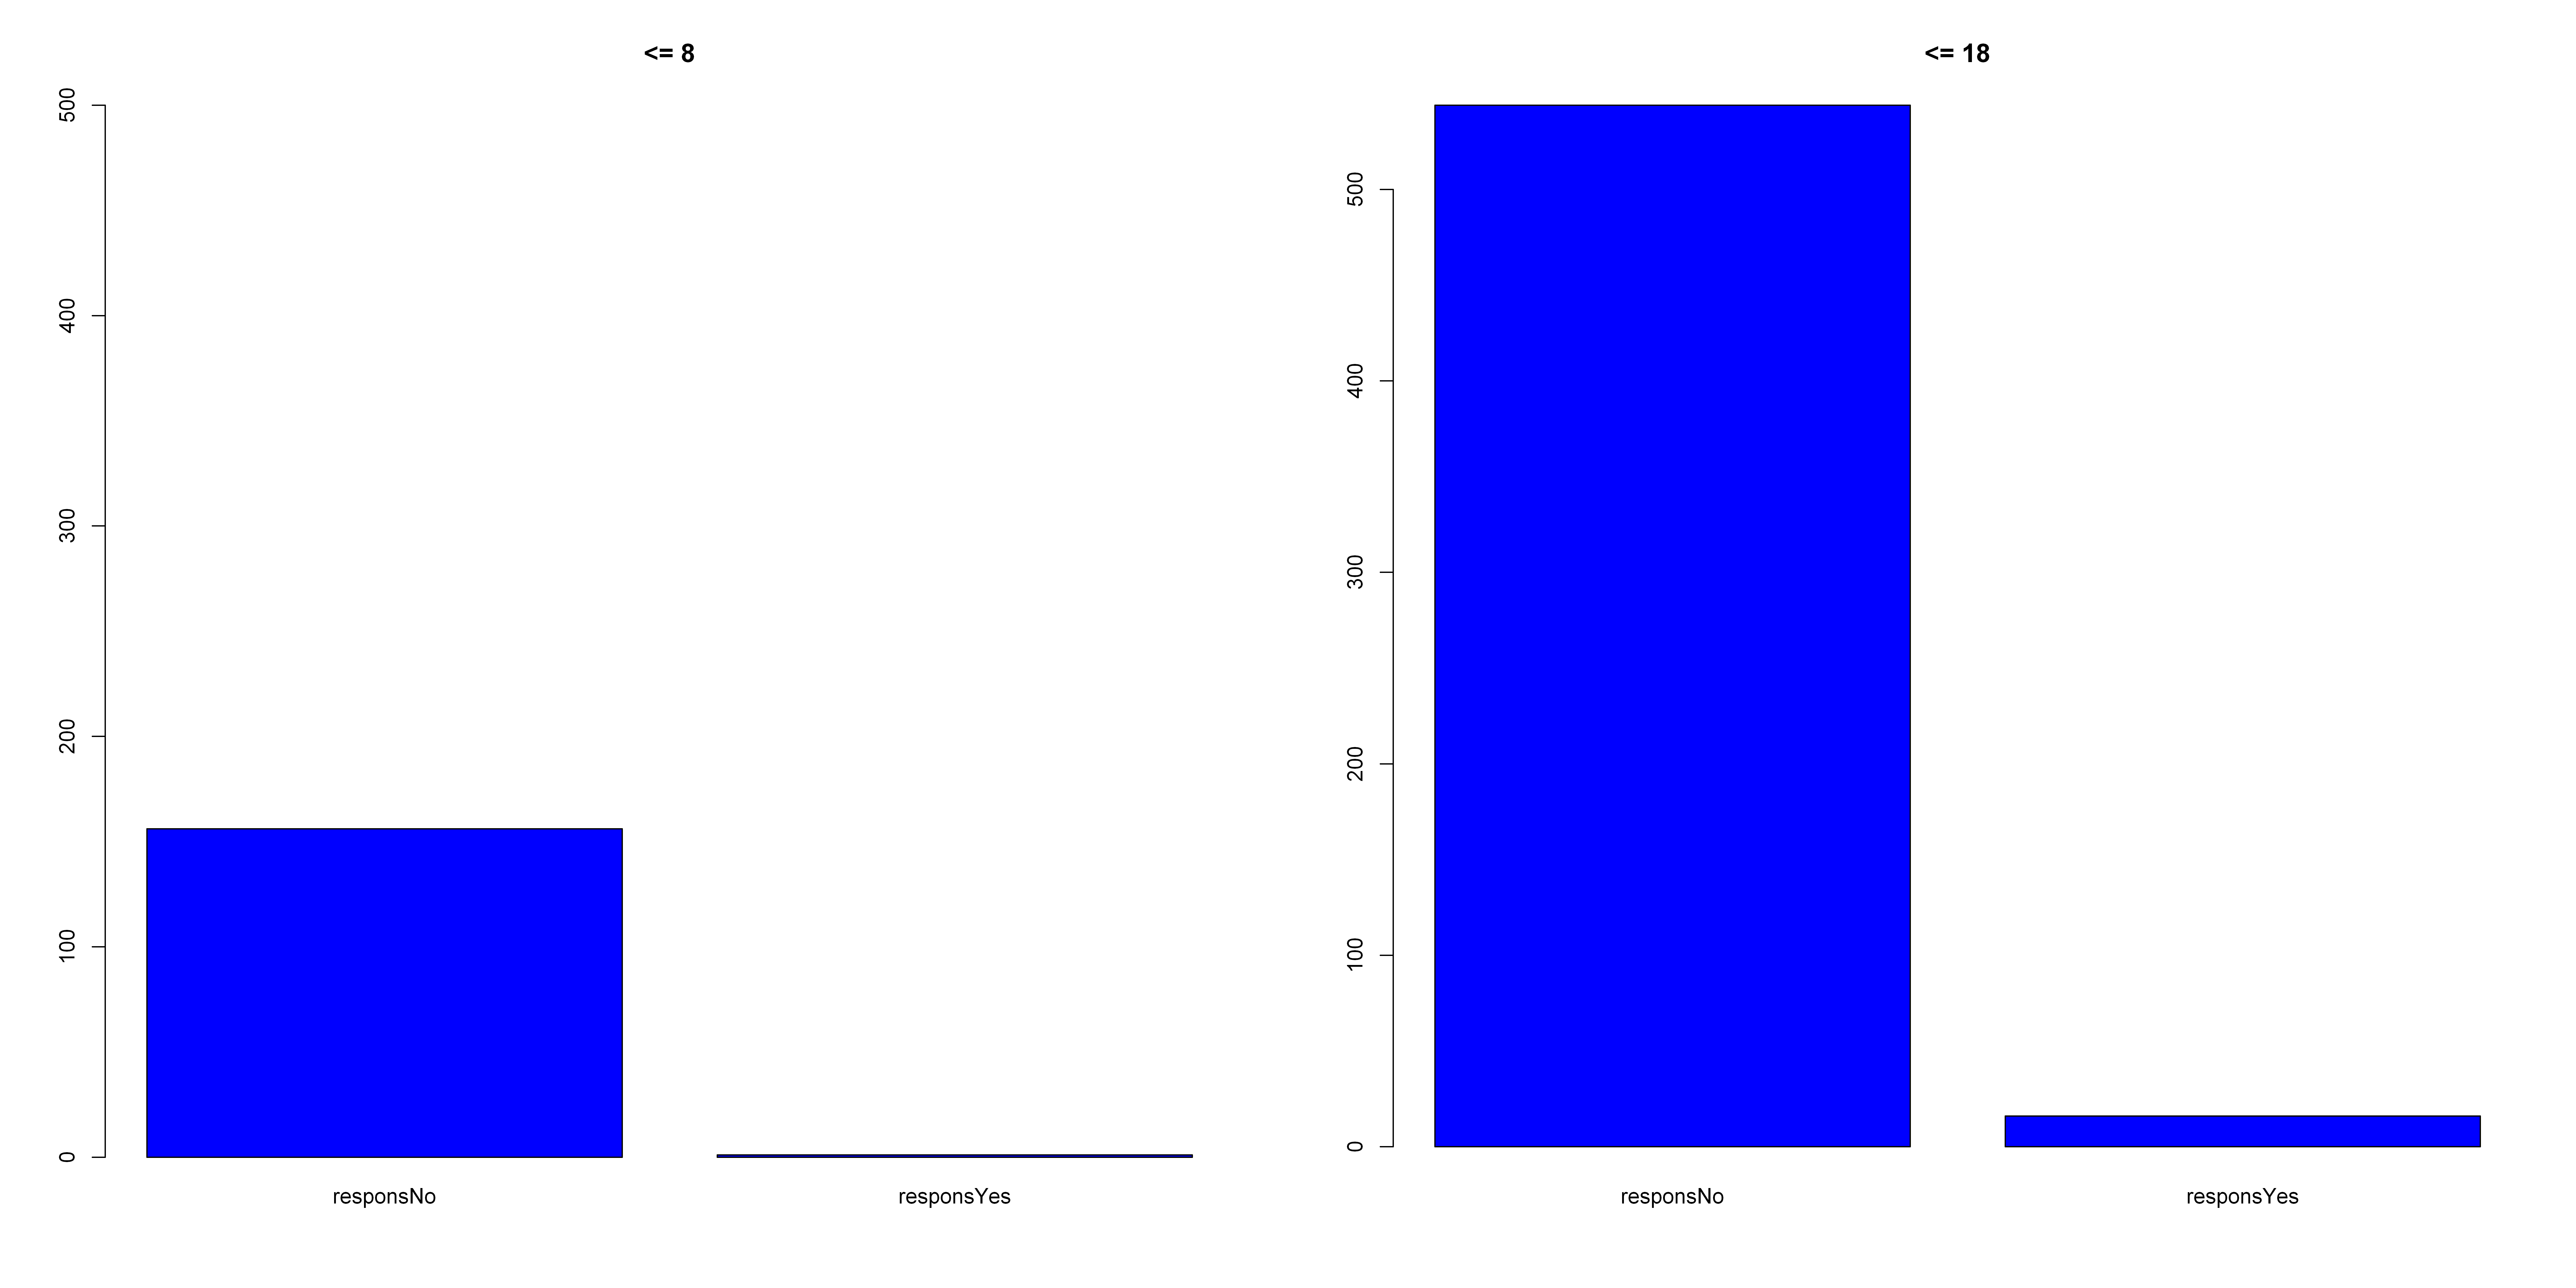

In [125]:
# Sindrome epatopolmonare

par(mfrow=c(1,2))

print("<= 8")
table(df1$epatopulmonarSyndrome)
barplot(table(df1$epatopulmonarSyndrome), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$epatopulmonarSyndrome)
barplot(table(df2$epatopulmonarSyndrome), main="<= 18", col="blue")

[1] "<= 8"



 responsNo responsYes 
       134         23 

[1] "<= 18"



 responsNo responsYes 
       455        105 

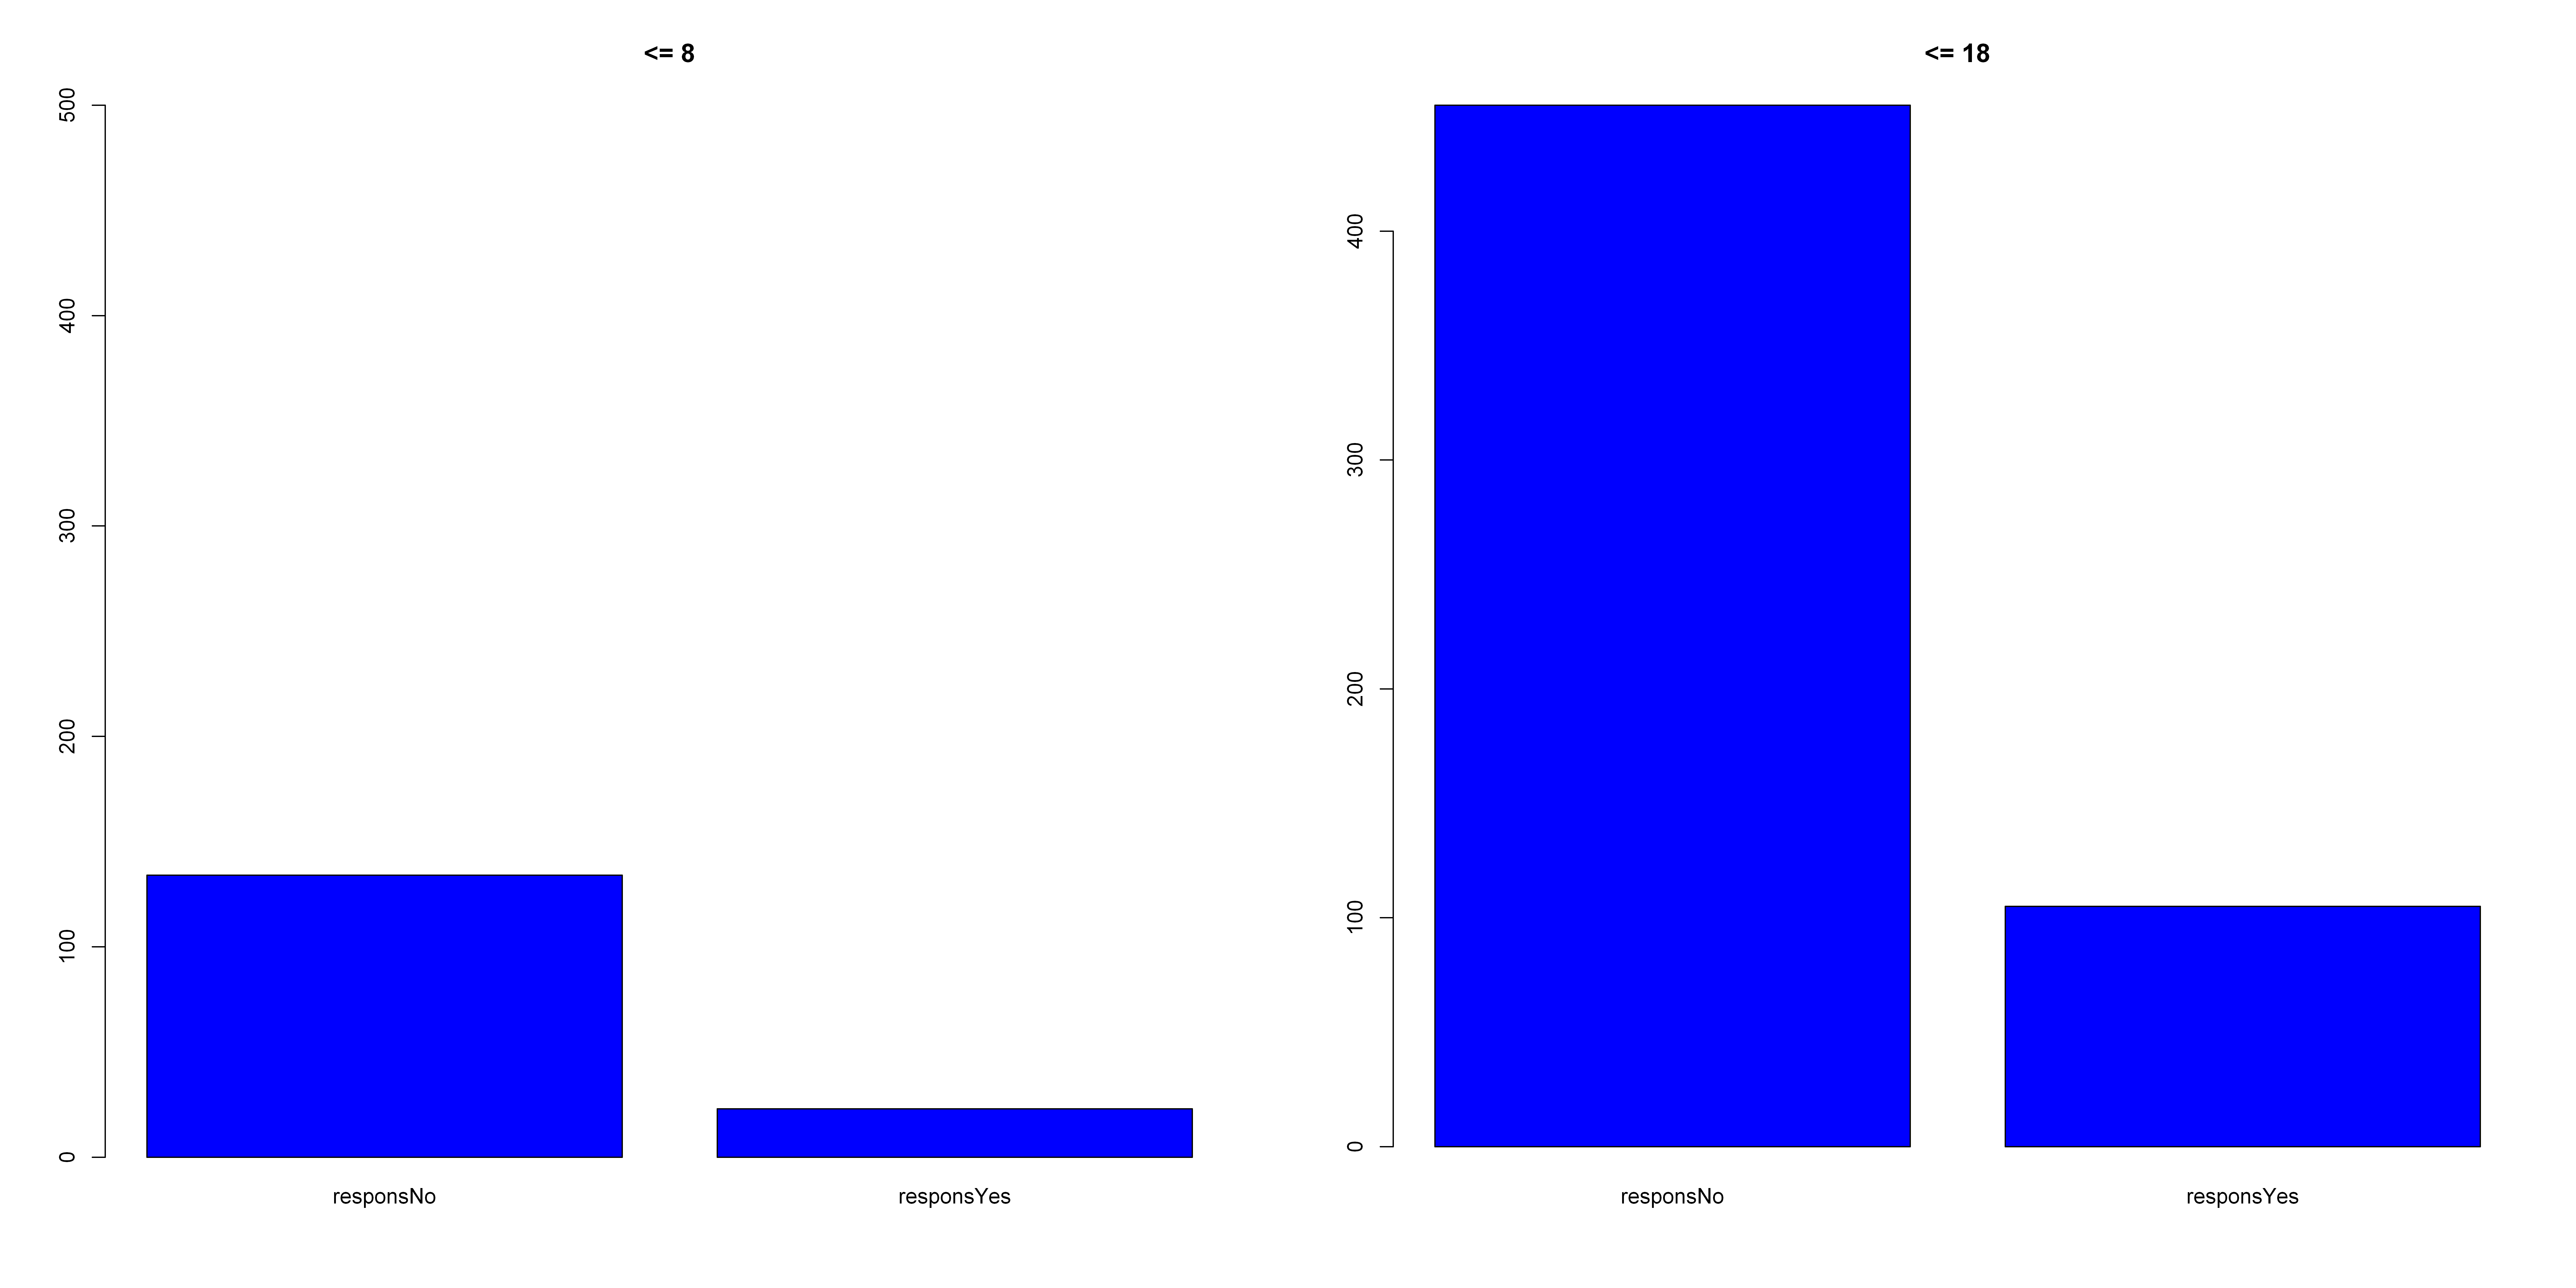

In [128]:
# Sanguinamento gastro esofaegeo

par(mfrow=c(1,2))

print("<= 8")
table(df1$BleedingEsophagGastric)
barplot(table(df1$BleedingEsophagGastric), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$BleedingEsophagGastric)
barplot(table(df2$BleedingEsophagGastric), main="<= 18", col="blue")

[1] "<= 8"



 responsNo responsYes 
       150          7 

[1] "<= 18"



 responsNo responsYes 
       546         14 

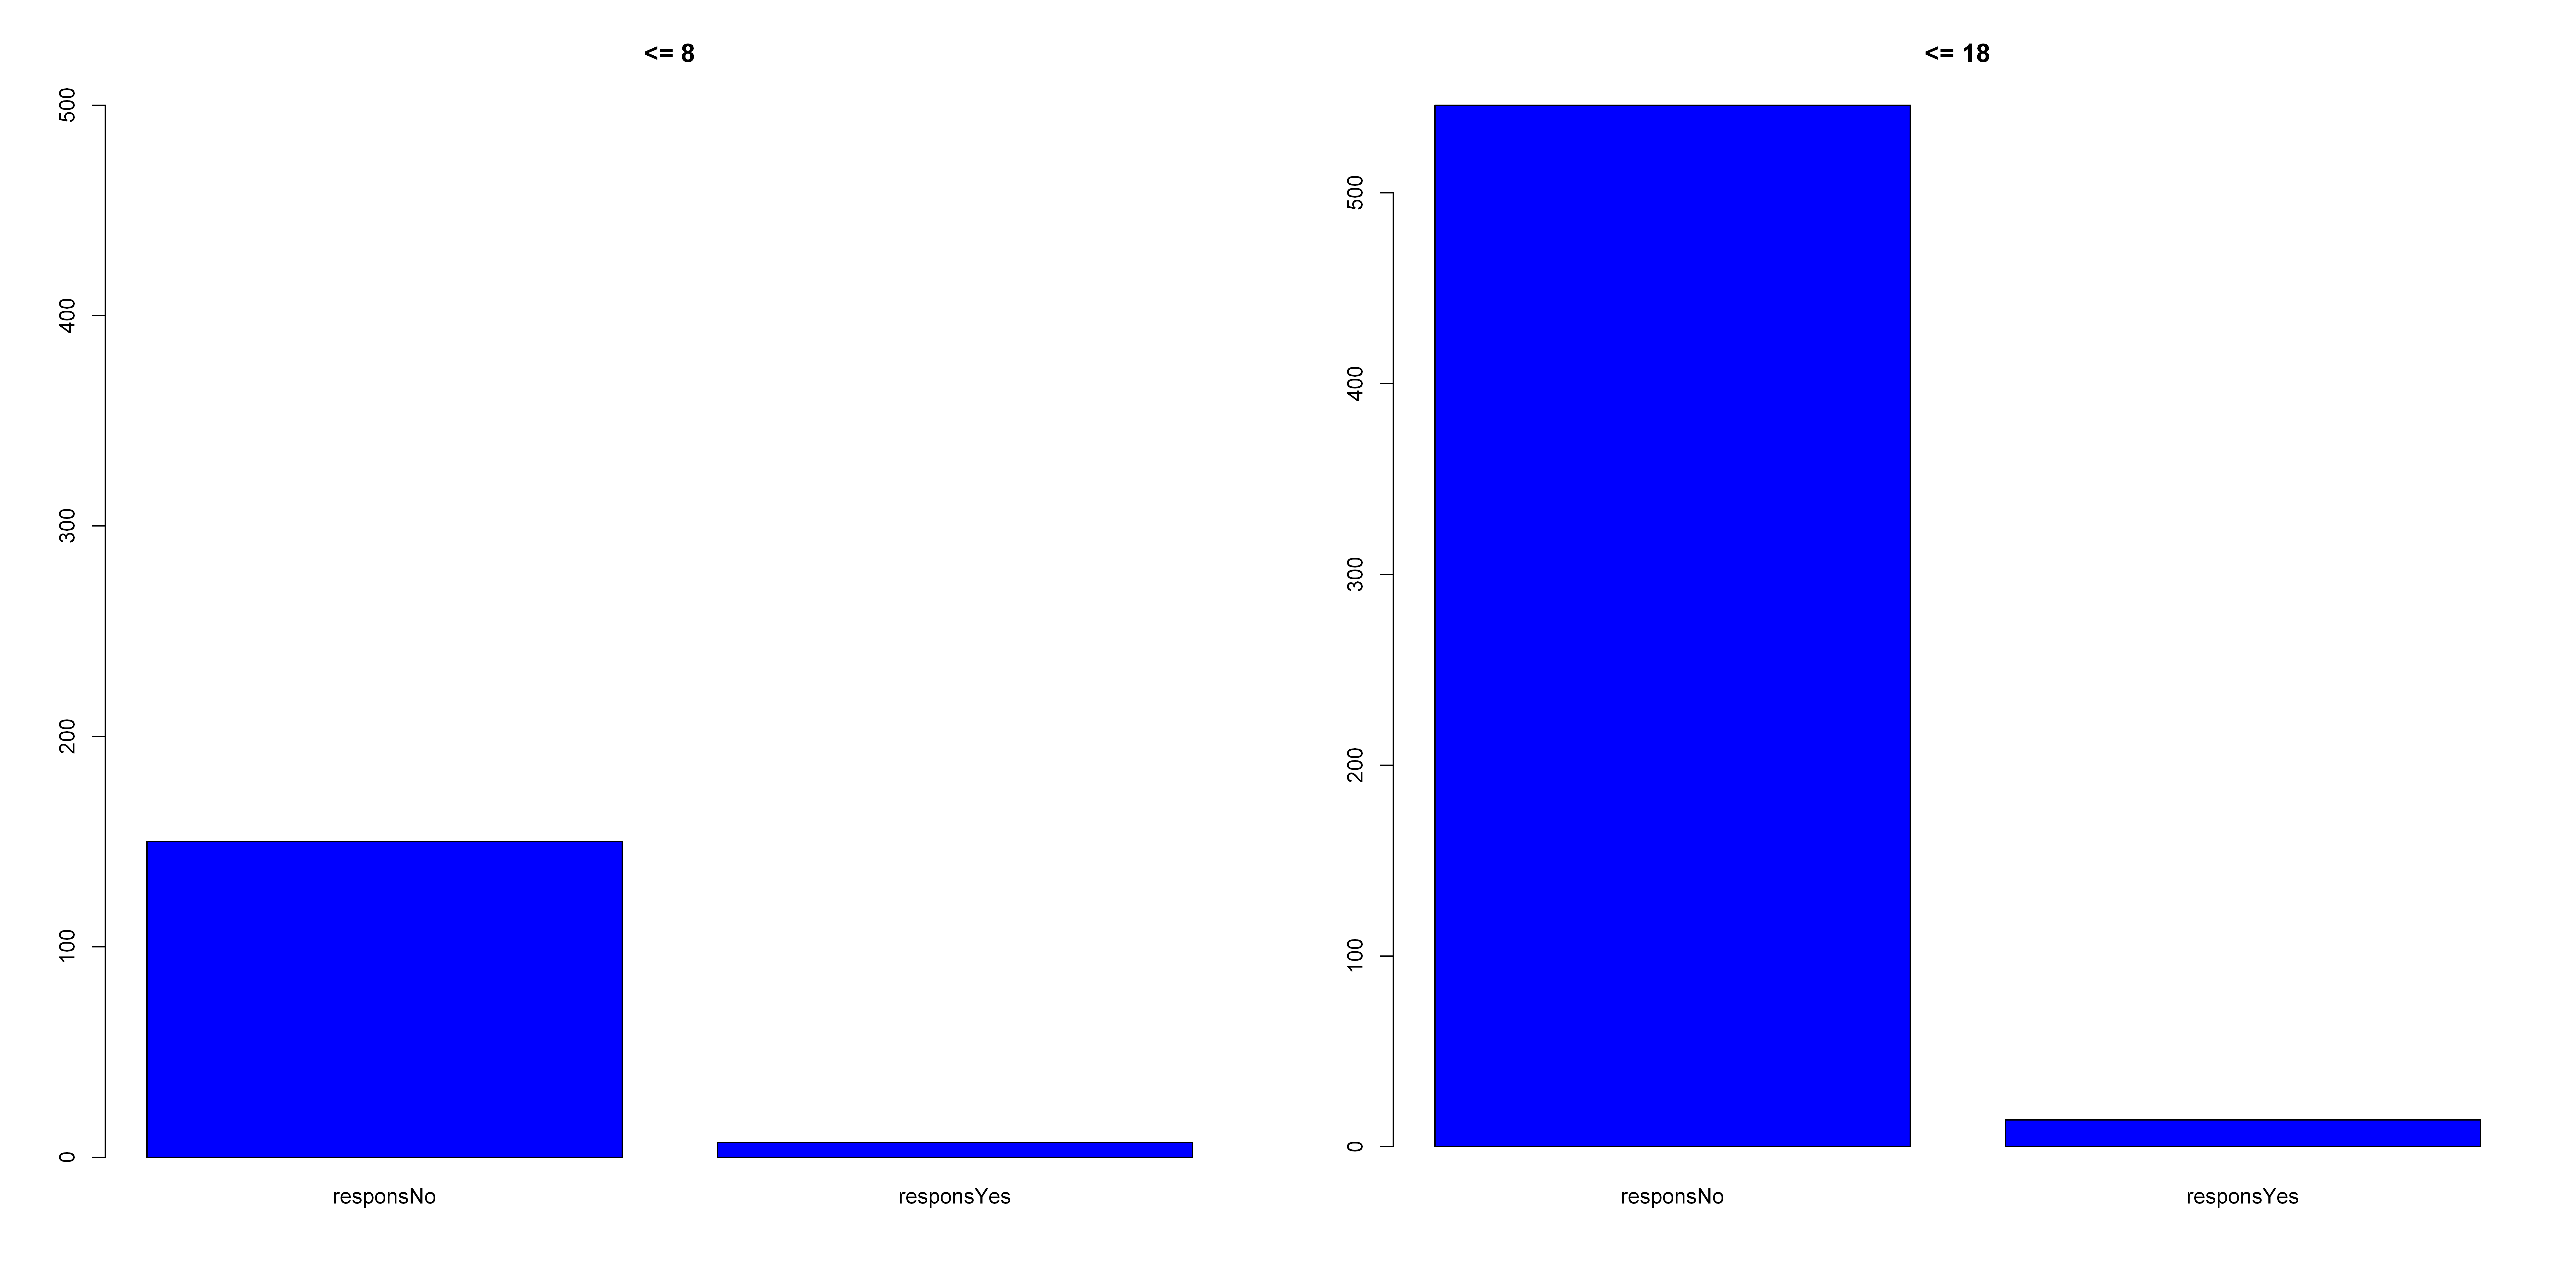

In [130]:
# Trapianto di fegato precedente

par(mfrow=c(1,2))

print("<= 8")
table(df1$prevLiverTransplant)
barplot(table(df1$prevLiverTransplant), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$prevLiverTransplant)
barplot(table(df2$prevLiverTransplant), main="<= 18", col="blue")


[1] "<= 8"



priority     mild   severe notLevel 
       9       17       10      121 

[1] "<= 18"



priority     mild   severe notLevel 
      41       95       86      338 

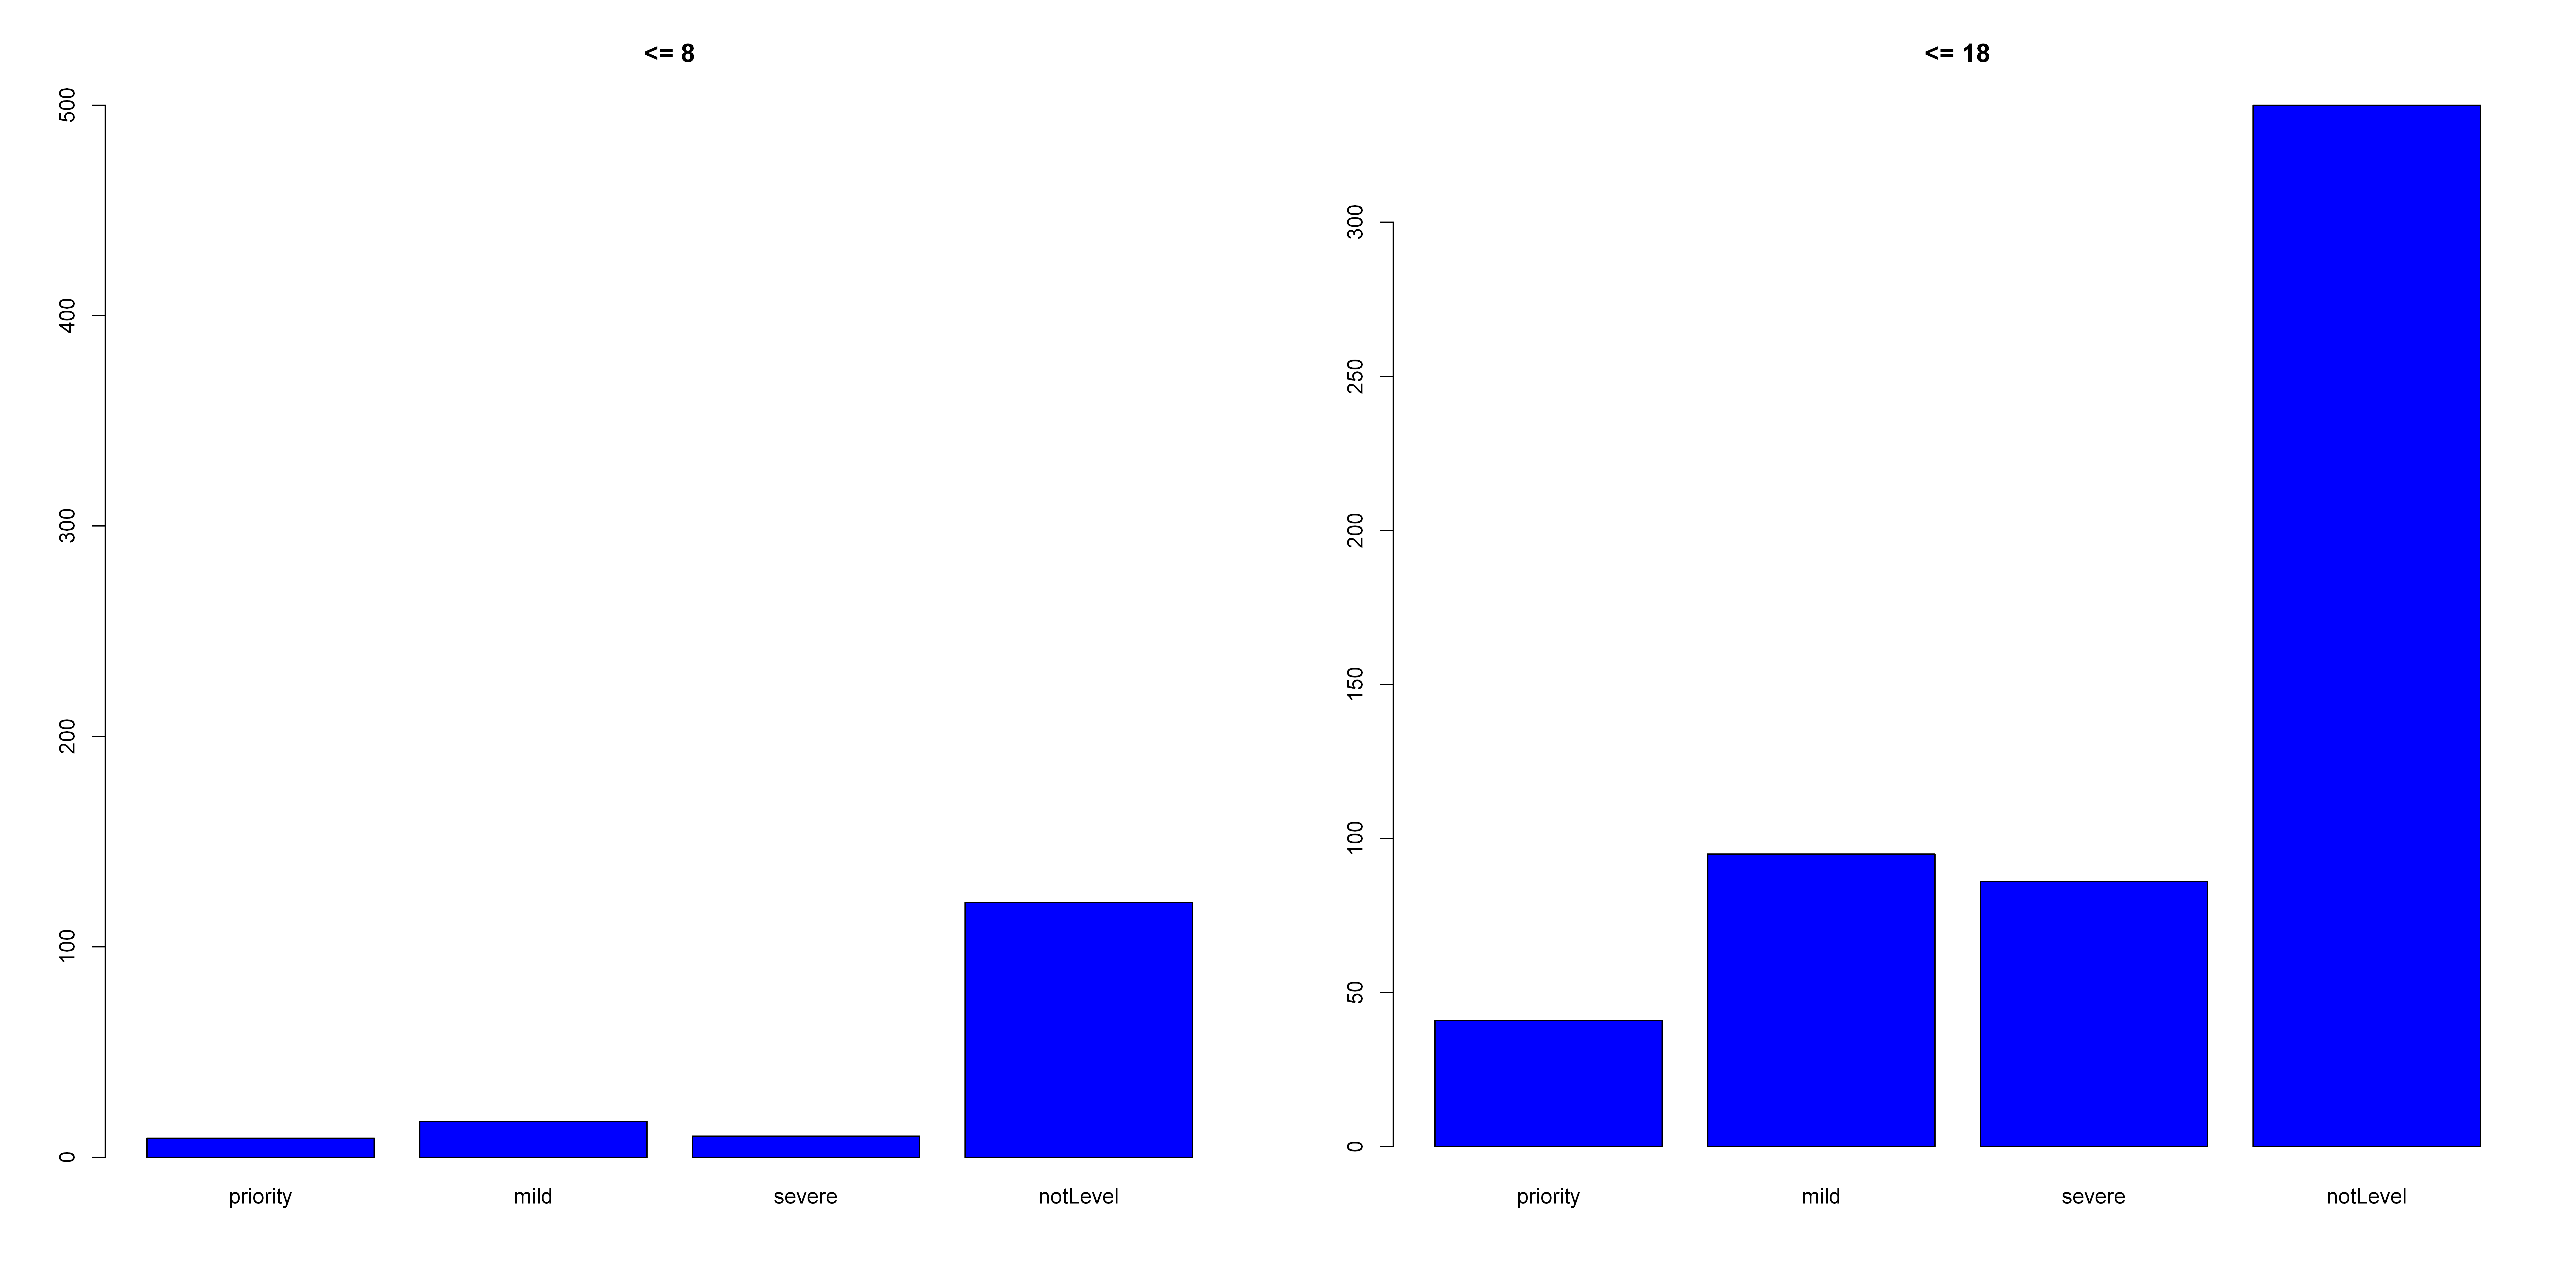

In [132]:
# Ascite refrattaria presente

par(mfrow=c(1,2))

print("<= 8")
table(df1$presentRefractAscites)
barplot(table(df1$presentRefractAscites), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$presentRefractAscites)
barplot(table(df2$presentRefractAscites), main="<= 18", col="blue")

[1] "<= 8"



 responsNo responsYes 
       138         19 

[1] "<= 18"



 responsNo responsYes 
       510         50 

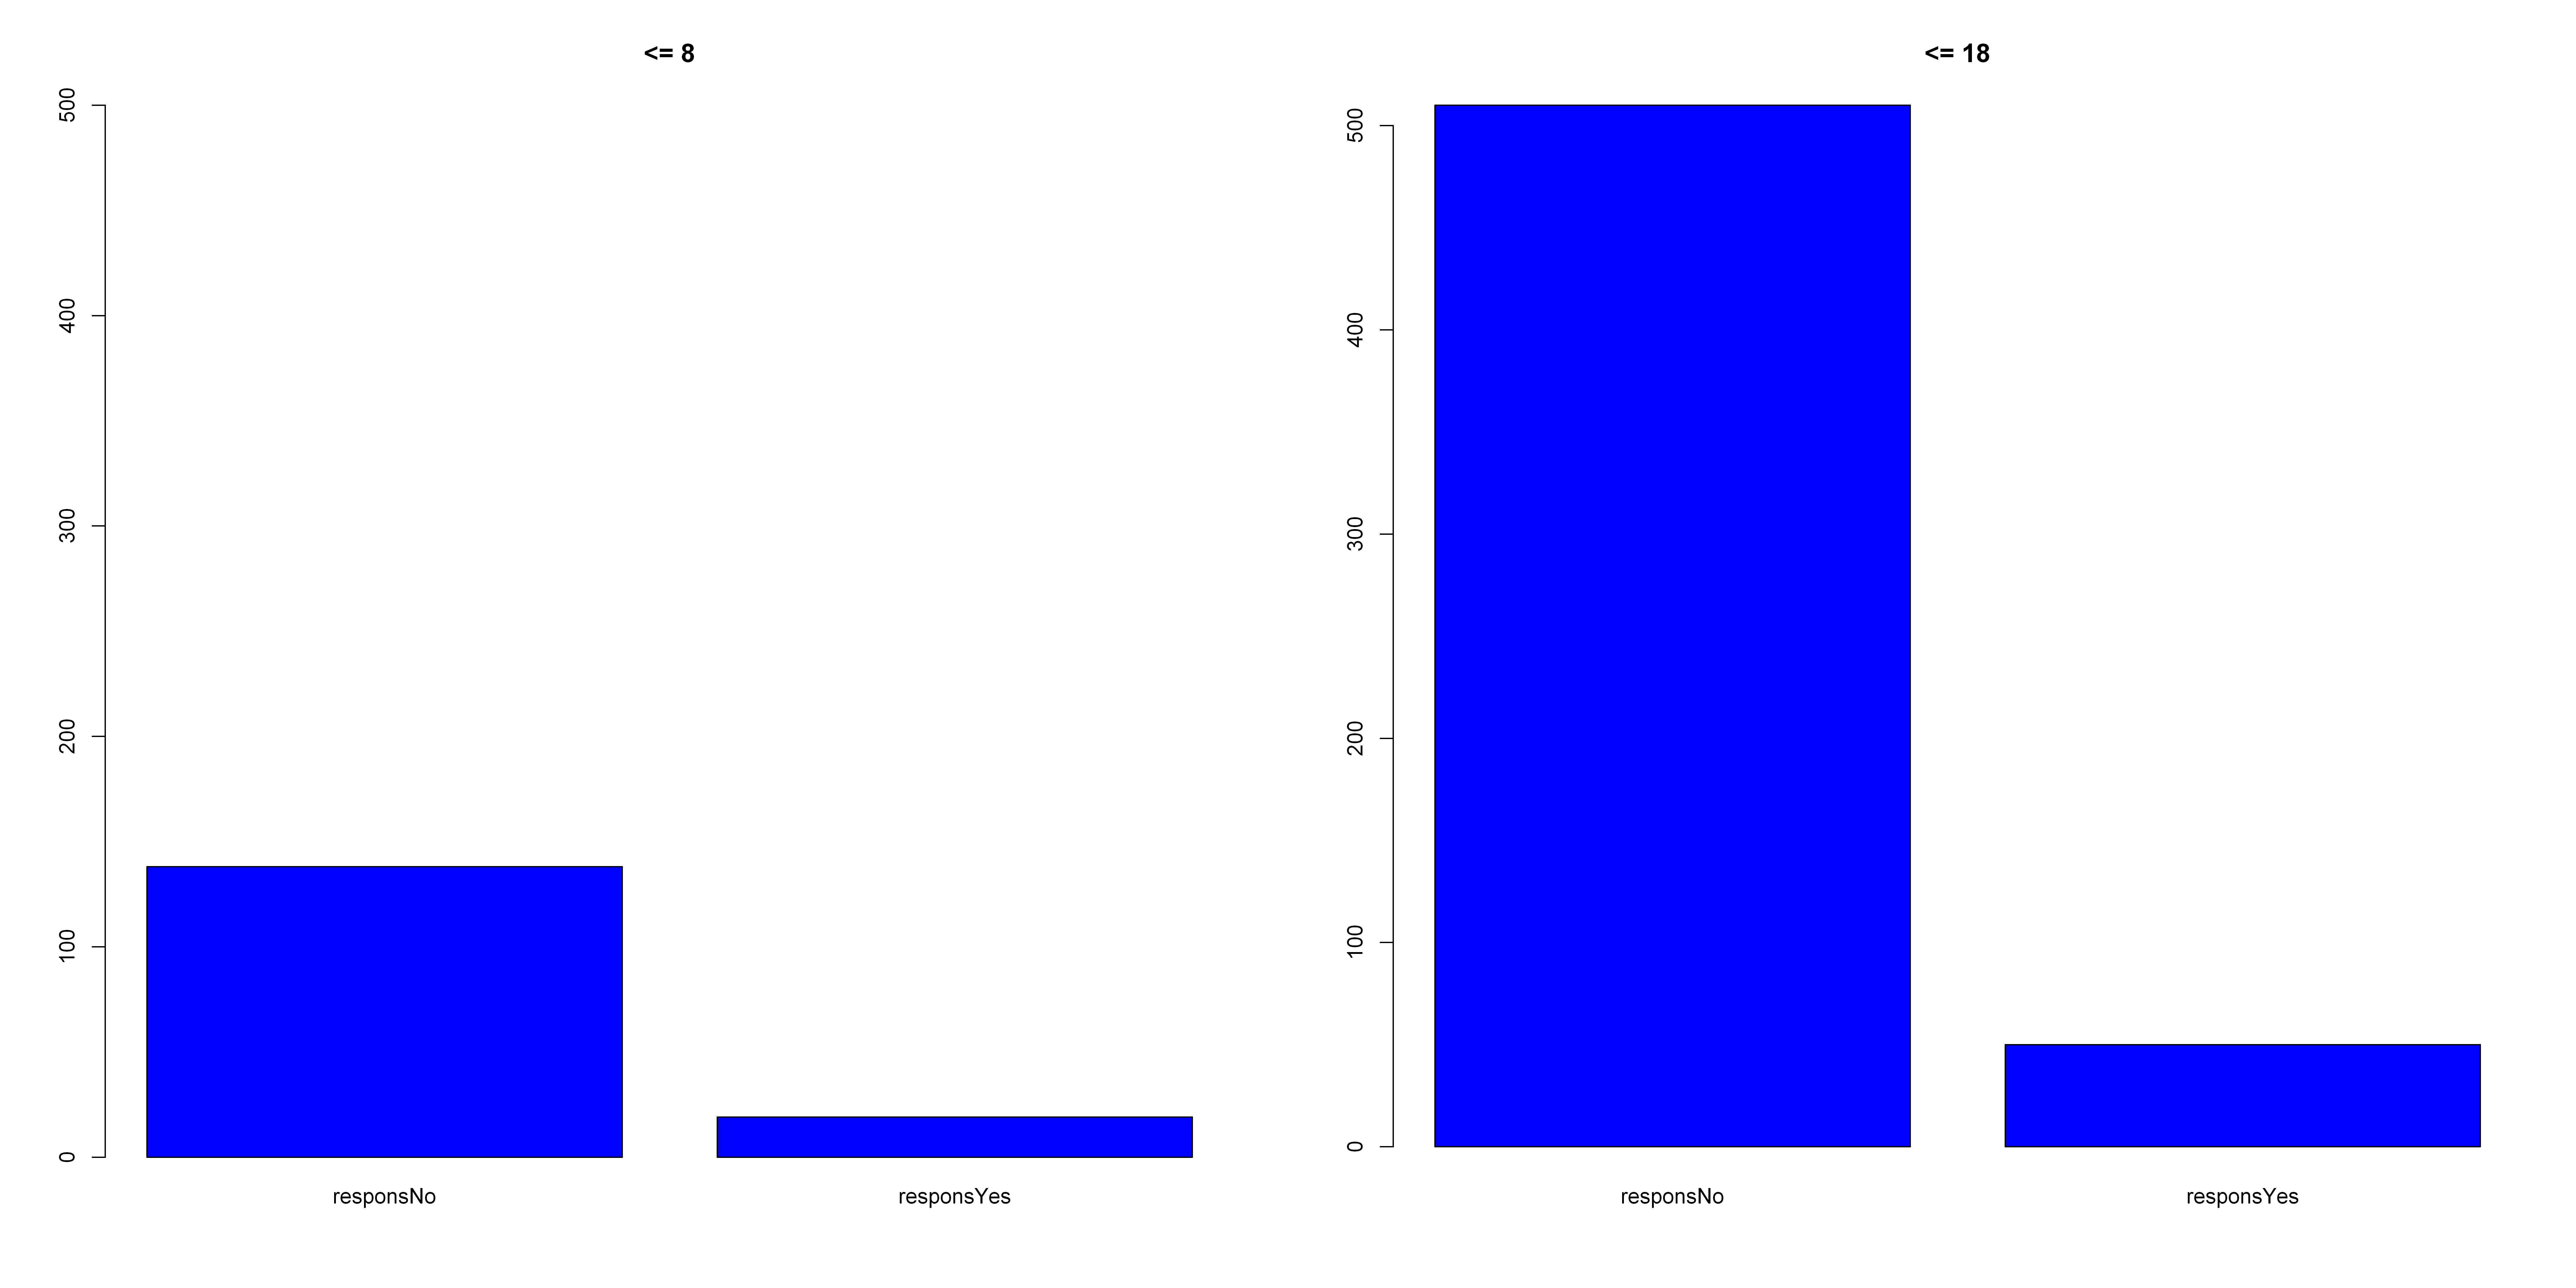

In [133]:
# Tipps

par(mfrow=c(1,2))

print("<= 8")
table(df1$tipps)
barplot(table(df1$tipps), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$tipps)
barplot(table(df2$tipps), main="<= 18", col="blue")

[1] "<= 8"



      respNo respPrevious   respEffect 
         146            8            3 

[1] "<= 18"



      respNo respPrevious   respEffect 
         506           28           26 

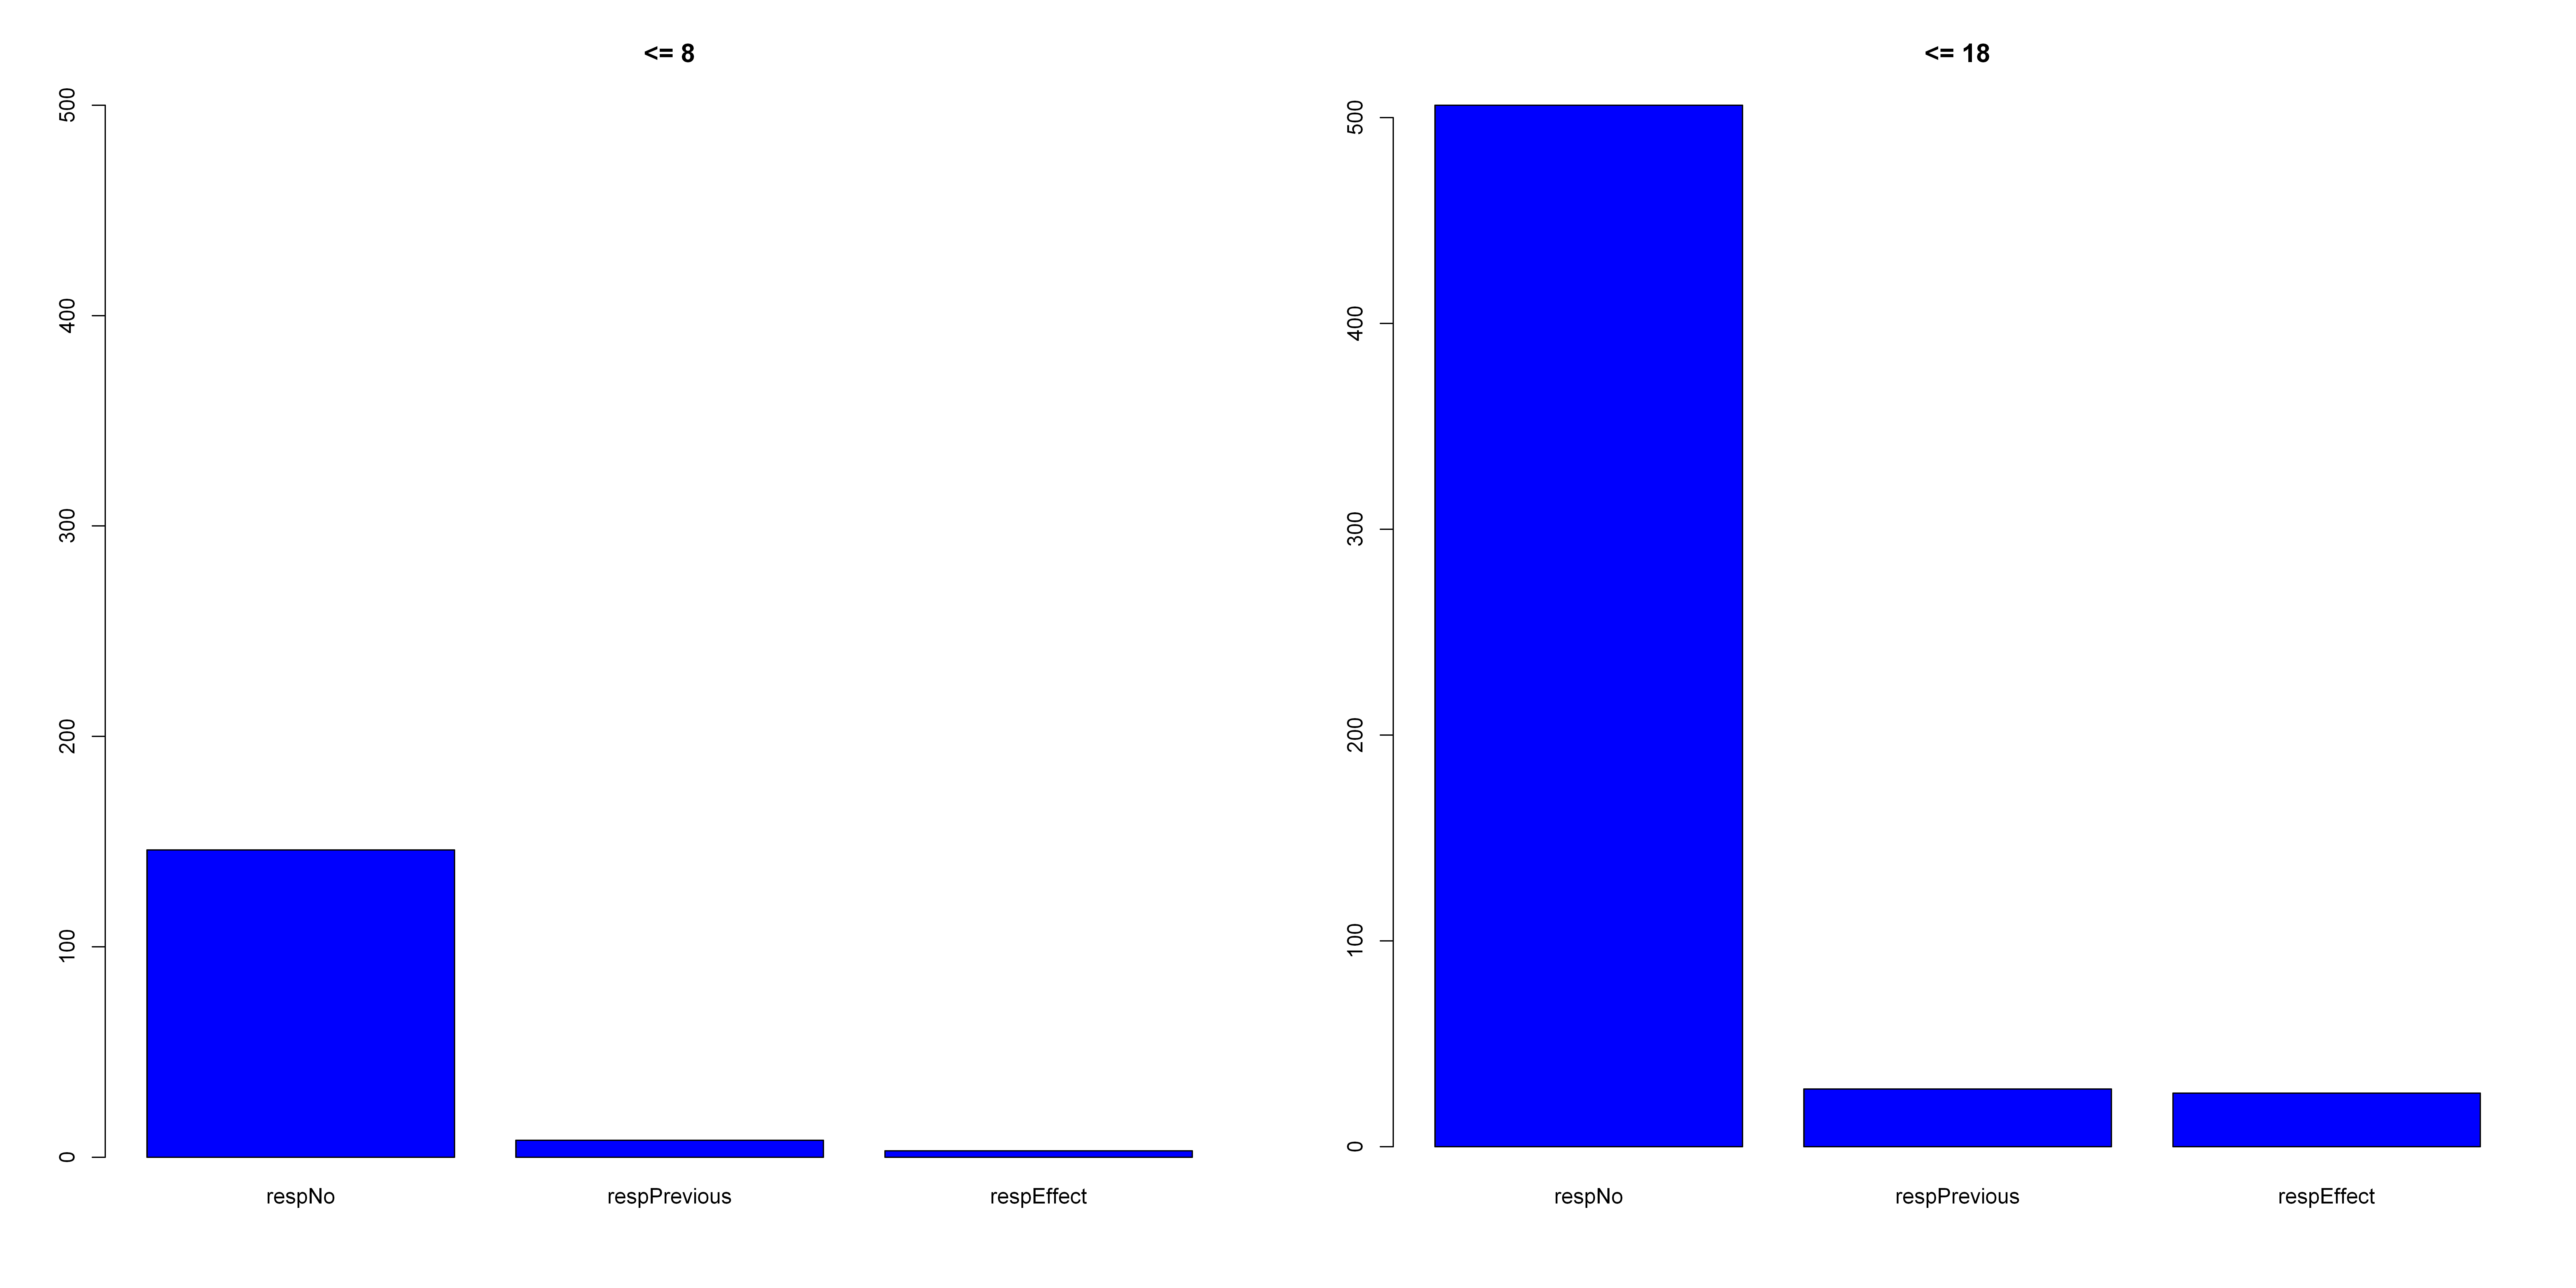

In [134]:


par(mfrow=c(1,2))

print("<= 8")
table(df1$leastOneEpathenal)
barplot(table(df1$leastOneEpathenal), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$leastOneEpathenal)
barplot(table(df2$leastOneEpathenal), main="<= 18", col="blue")



[1] "<= 8"



      respNo respPrevious   respEffect 
         148            8            1 

[1] "<= 18"



      respNo respPrevious   respEffect 
         503           55            2 

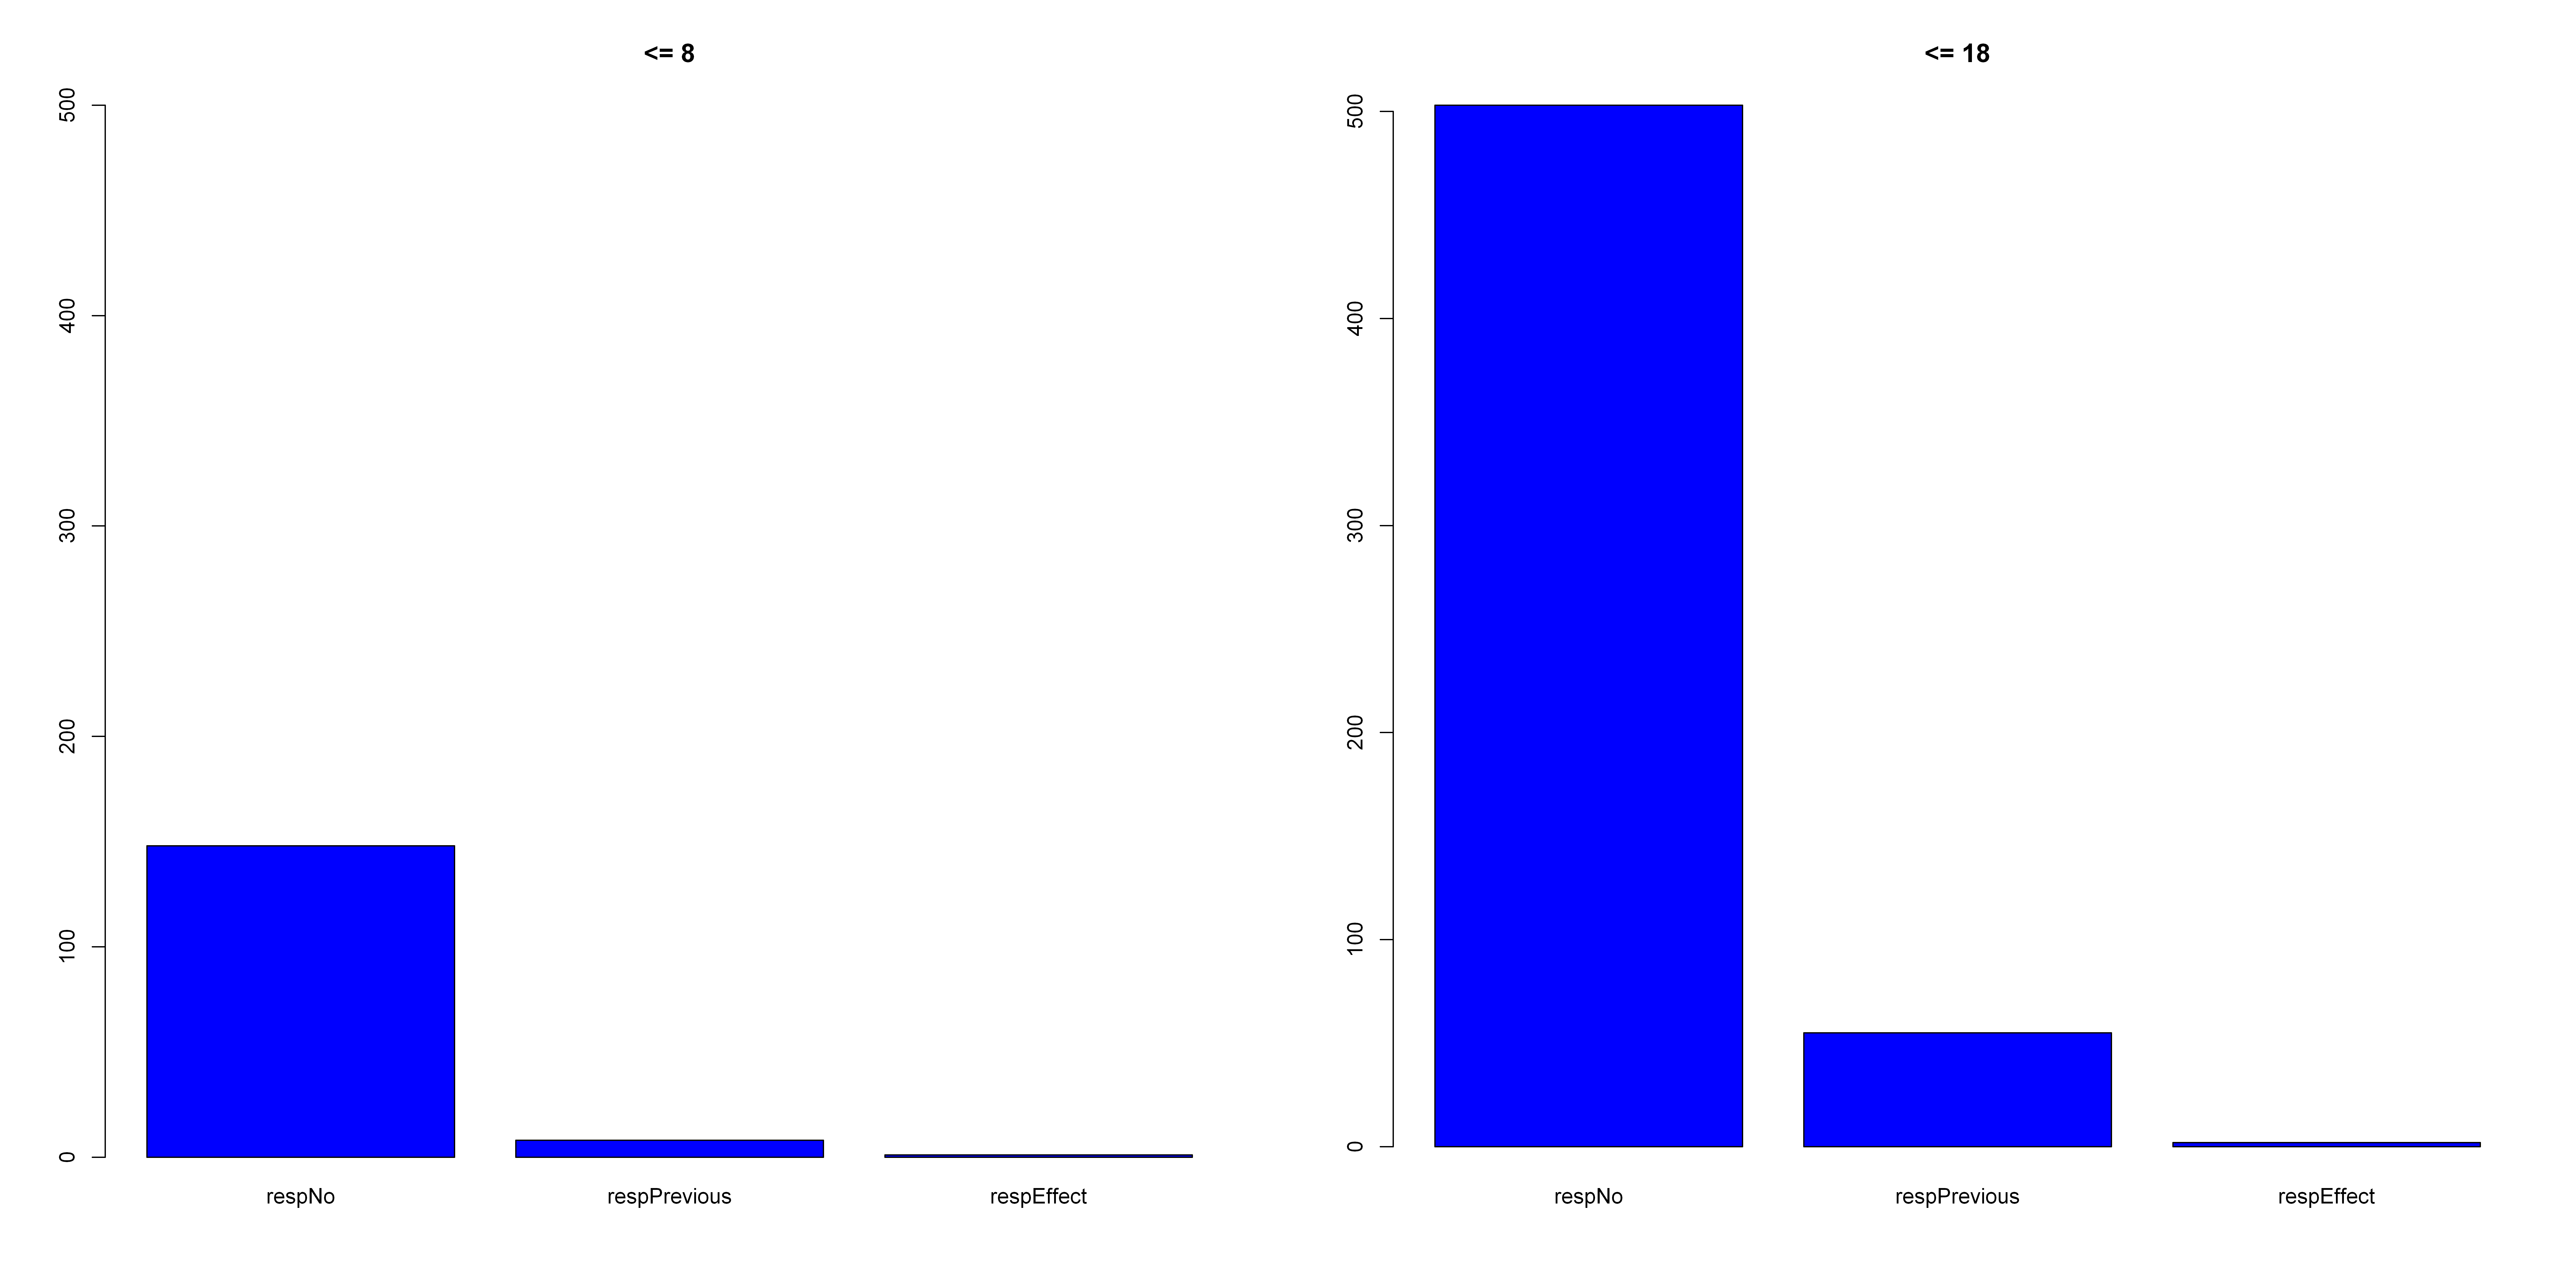

In [135]:
par(mfrow=c(1,2))

print("<= 8")
table(df1$leastOneSpontaneousBacterial)
barplot(table(df1$leastOneSpontaneousBacterial), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$leastOneSpontaneousBacterial)
barplot(table(df2$leastOneSpontaneousBacterial), main="<= 18", col="blue")

[1] "<= 8"



  degreeI  degreeII degreeIII  degreeIV      None 
       13         4         4         0       136 

[1] "<= 18"



  degreeI  degreeII degreeIII  degreeIV      None 
       38        33         9         5       475 

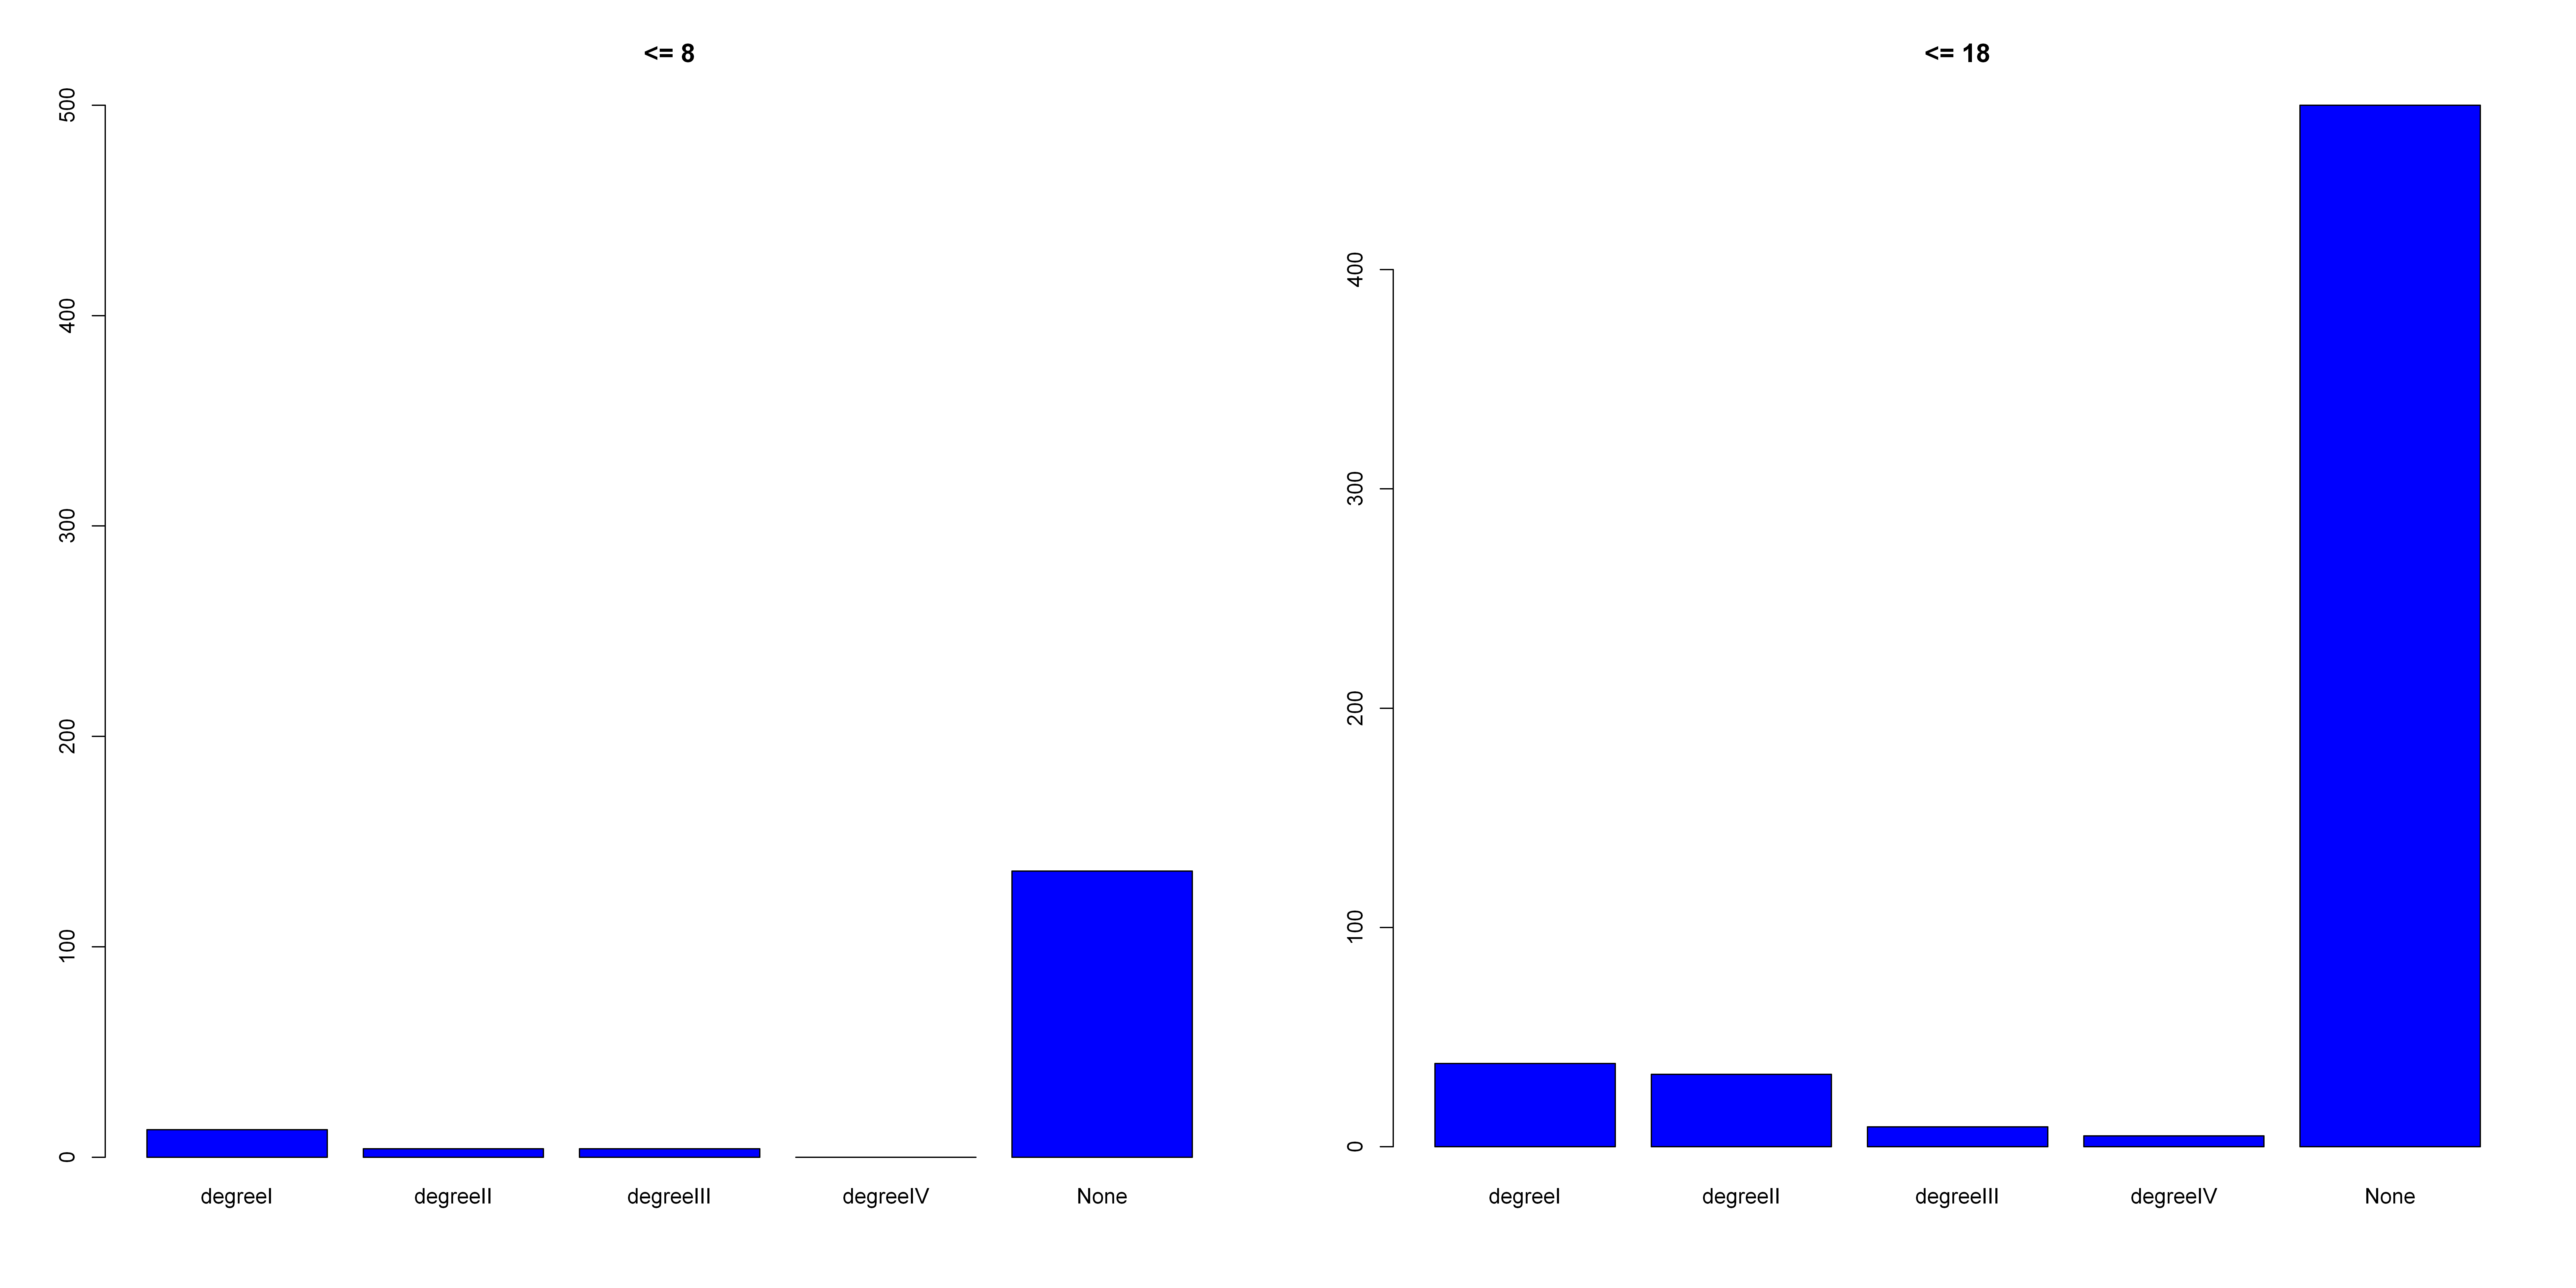

In [136]:
# Grado trombosi

par(mfrow=c(1,2))

print("<= 8")
table(df1$thrombosisDegreeWithNone)
barplot(table(df1$thrombosisDegreeWithNone), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$thrombosisDegreeWithNone)
barplot(table(df2$thrombosisDegreeWithNone), main="<= 18", col="blue")

[1] "<= 8"



      respNo respPrevious   respEffect 
         135           16            6 

[1] "<= 18"



      respNo respPrevious   respEffect 
         433           97           30 

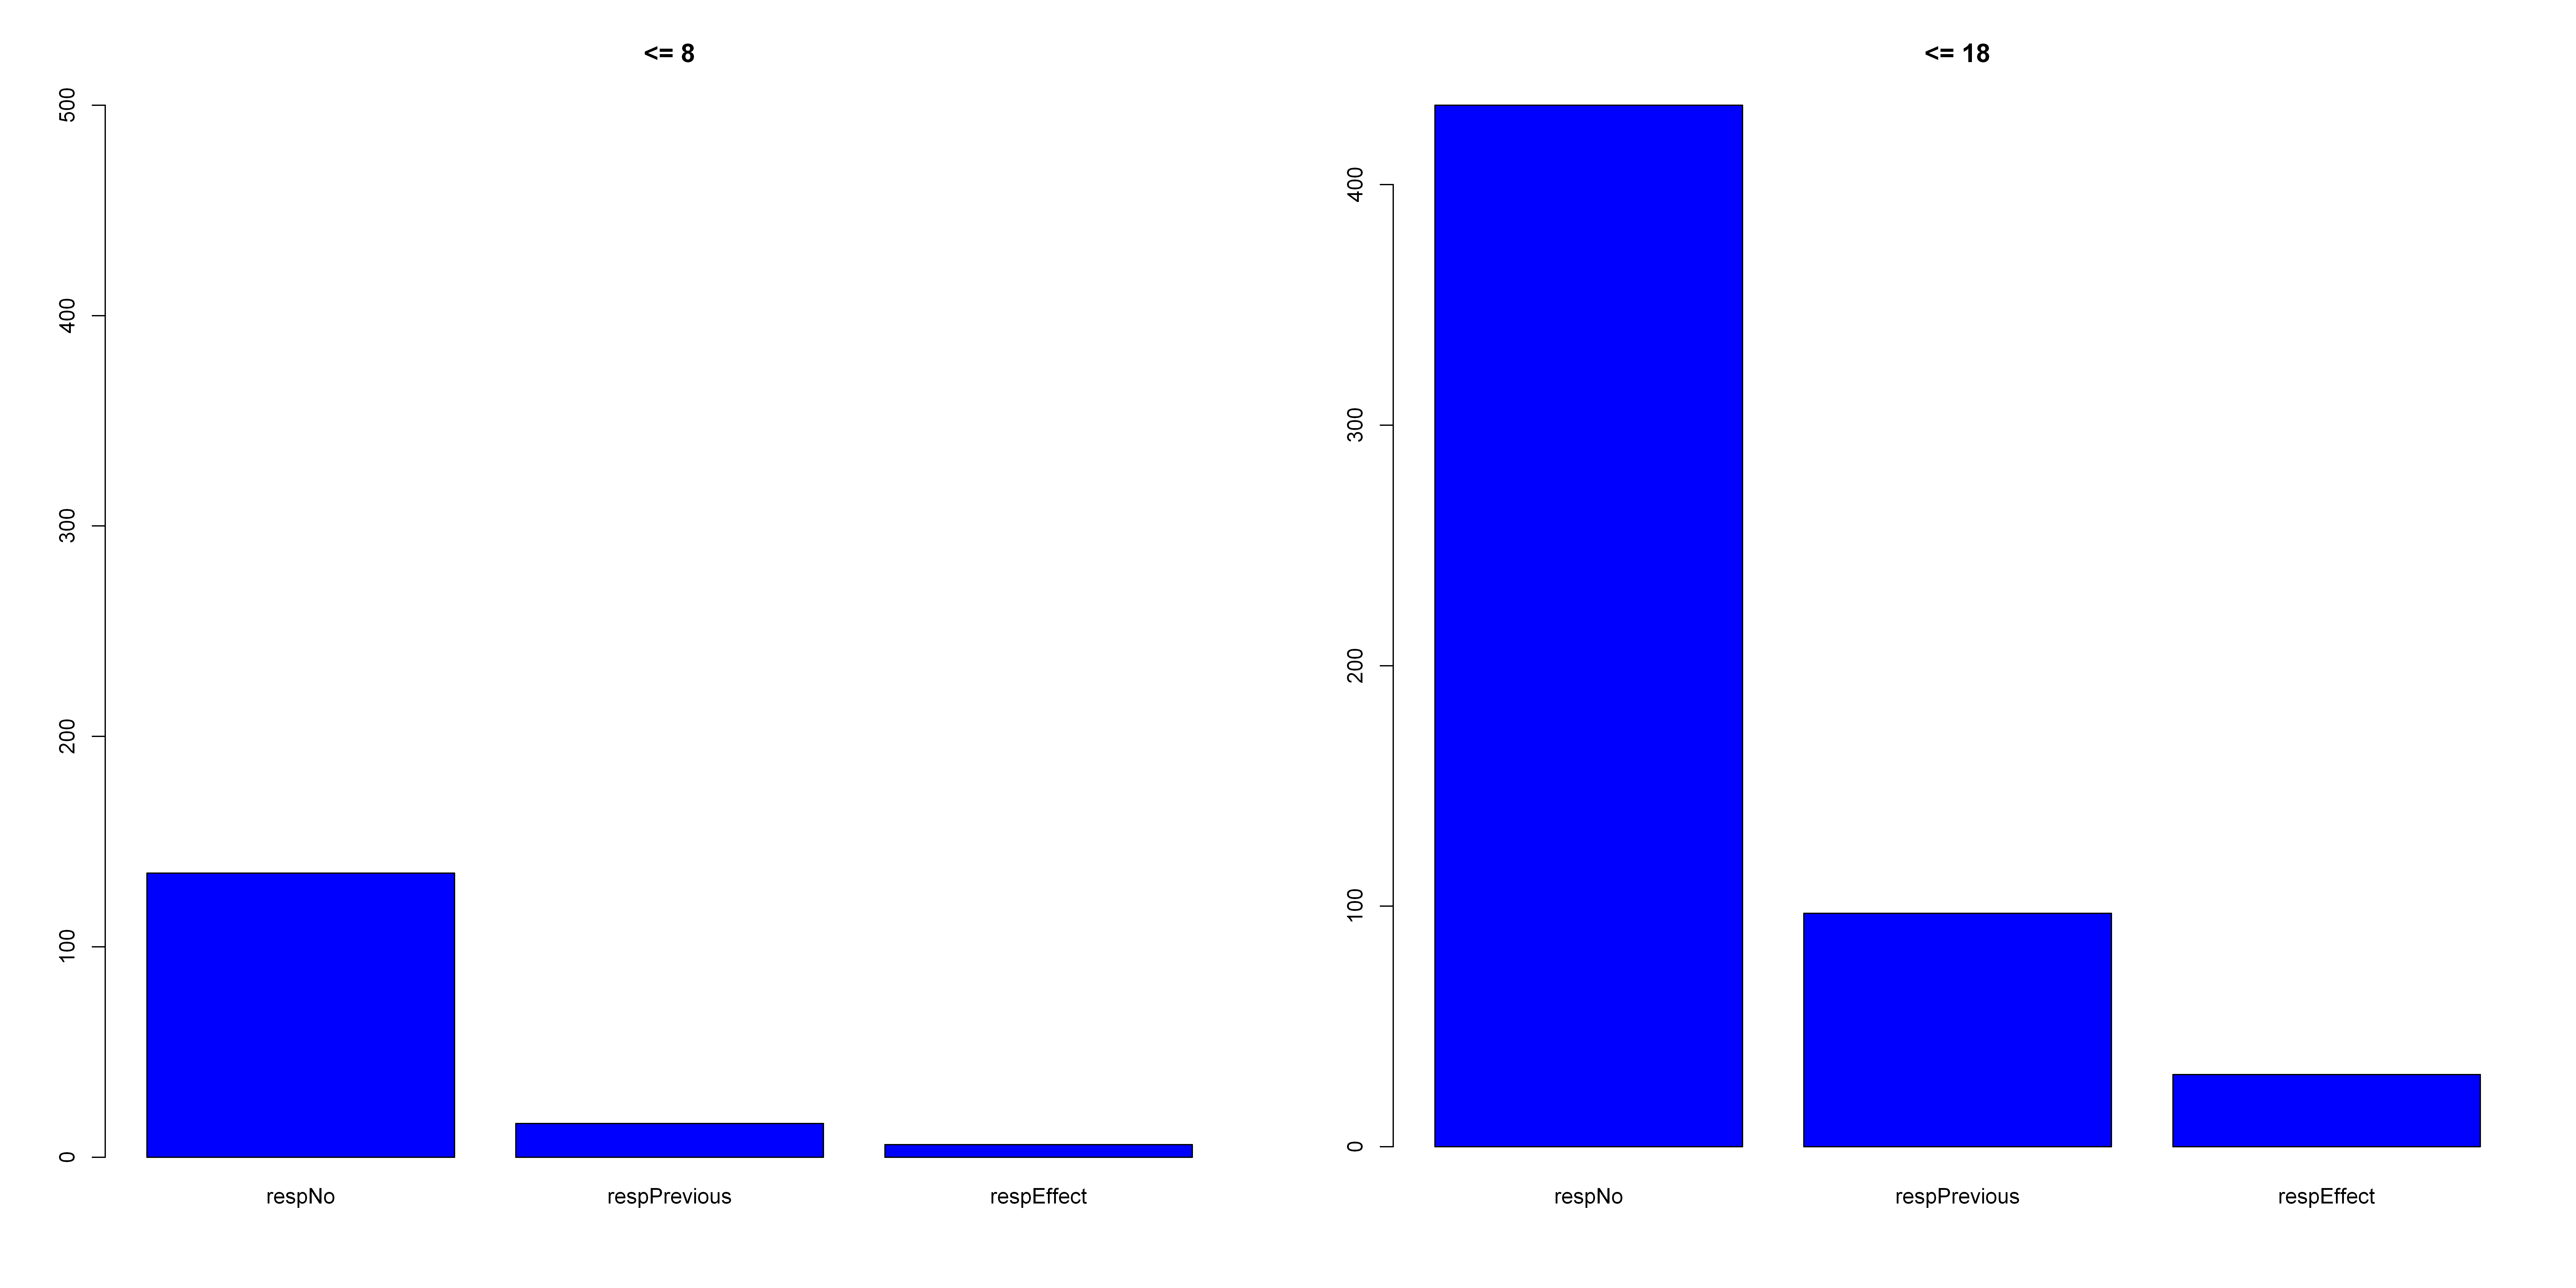

In [137]:

par(mfrow=c(1,2))

print("<= 8")
table(df1$portosystEncephalPresent)
barplot(table(df1$portosystEncephalPresent), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$portosystEncephalPresent)
barplot(table(df2$portosystEncephalPresent), main="<= 18", col="blue")

[1] "<= 8"



 slightComprom SeriousComprom 
           148              9 

[1] "<= 18"



 slightComprom SeriousComprom 
           524             36 

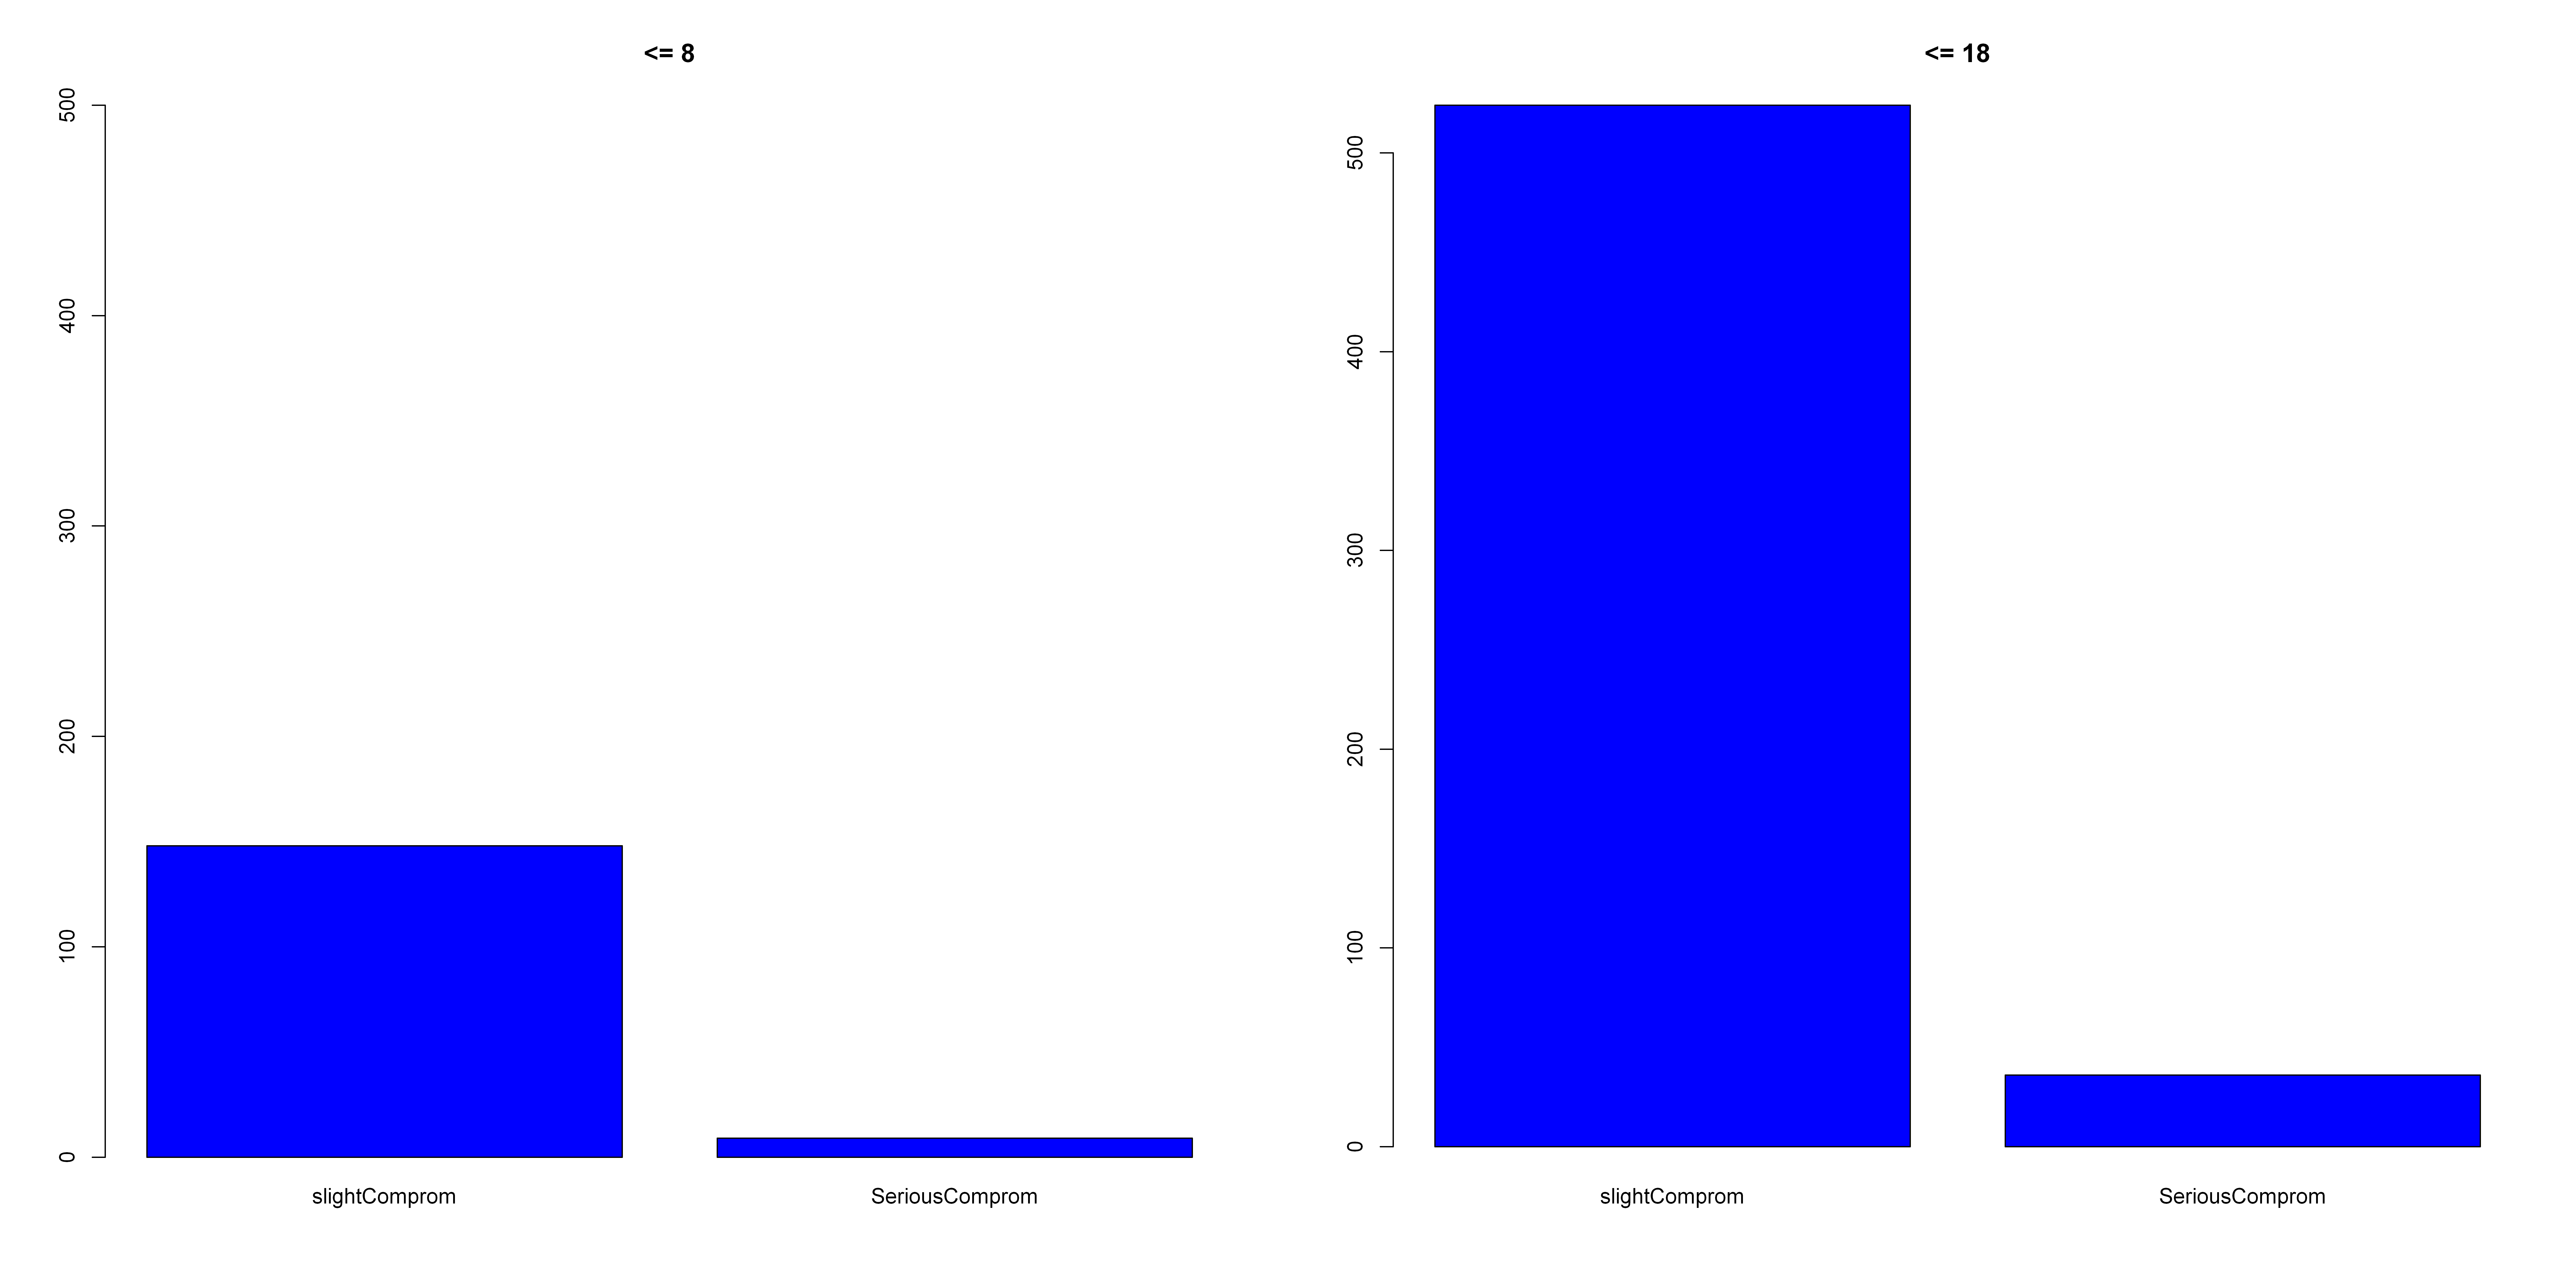

In [138]:
# Status nutrizionale

par(mfrow=c(1,2))

print("<= 8")
table(df1$nutritStatus)
barplot(table(df1$nutritStatus), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$nutritStatus)
barplot(table(df2$nutritStatus), main="<= 18", col="blue")

[1] "<= 8"



 responsNo responsYes 
       118         39 

[1] "<= 18"



 responsNo responsYes 
       398        162 

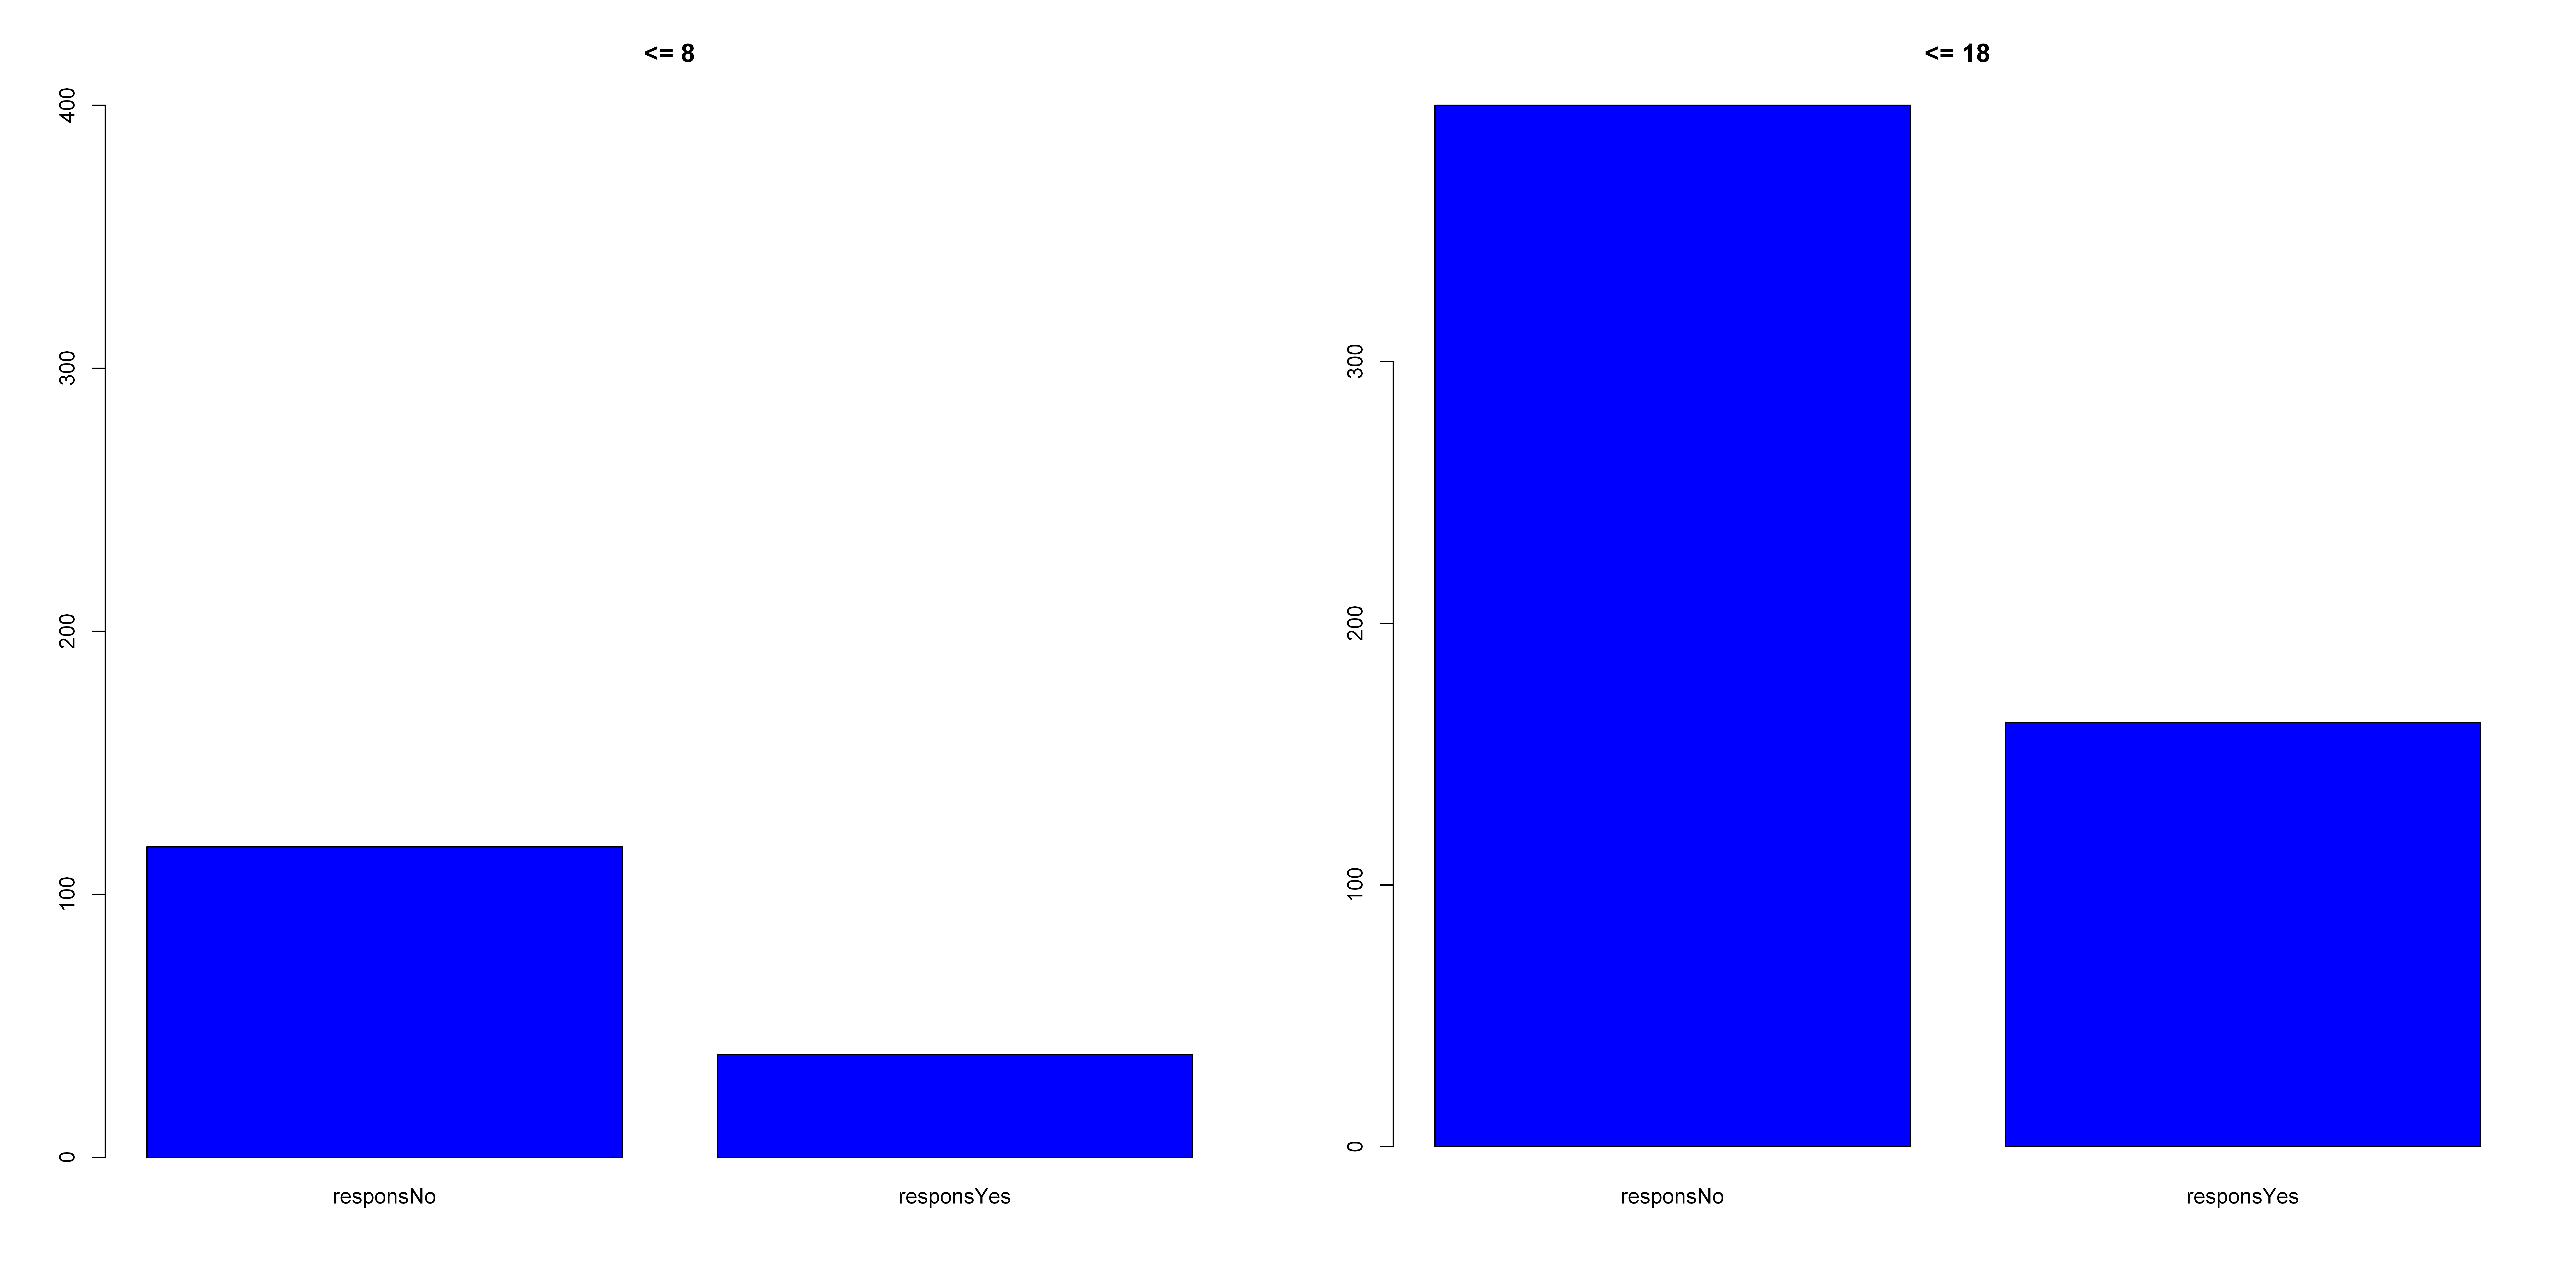

In [141]:

par(mfrow=c(1,2))

print("<= 8")
table(df1$surgeonSurgery)
barplot(table(df1$surgeonSurgery), main="<= 8", col="blue", ylim = c(0, 400))

print("<= 18")
table(df2$surgeonSurgery)
barplot(table(df2$surgeonSurgery), main="<= 18", col="blue")

[1] "<= 8"



 responsNo responsYes 
       148          9 

[1] "<= 18"



 responsNo responsYes 
       491         69 

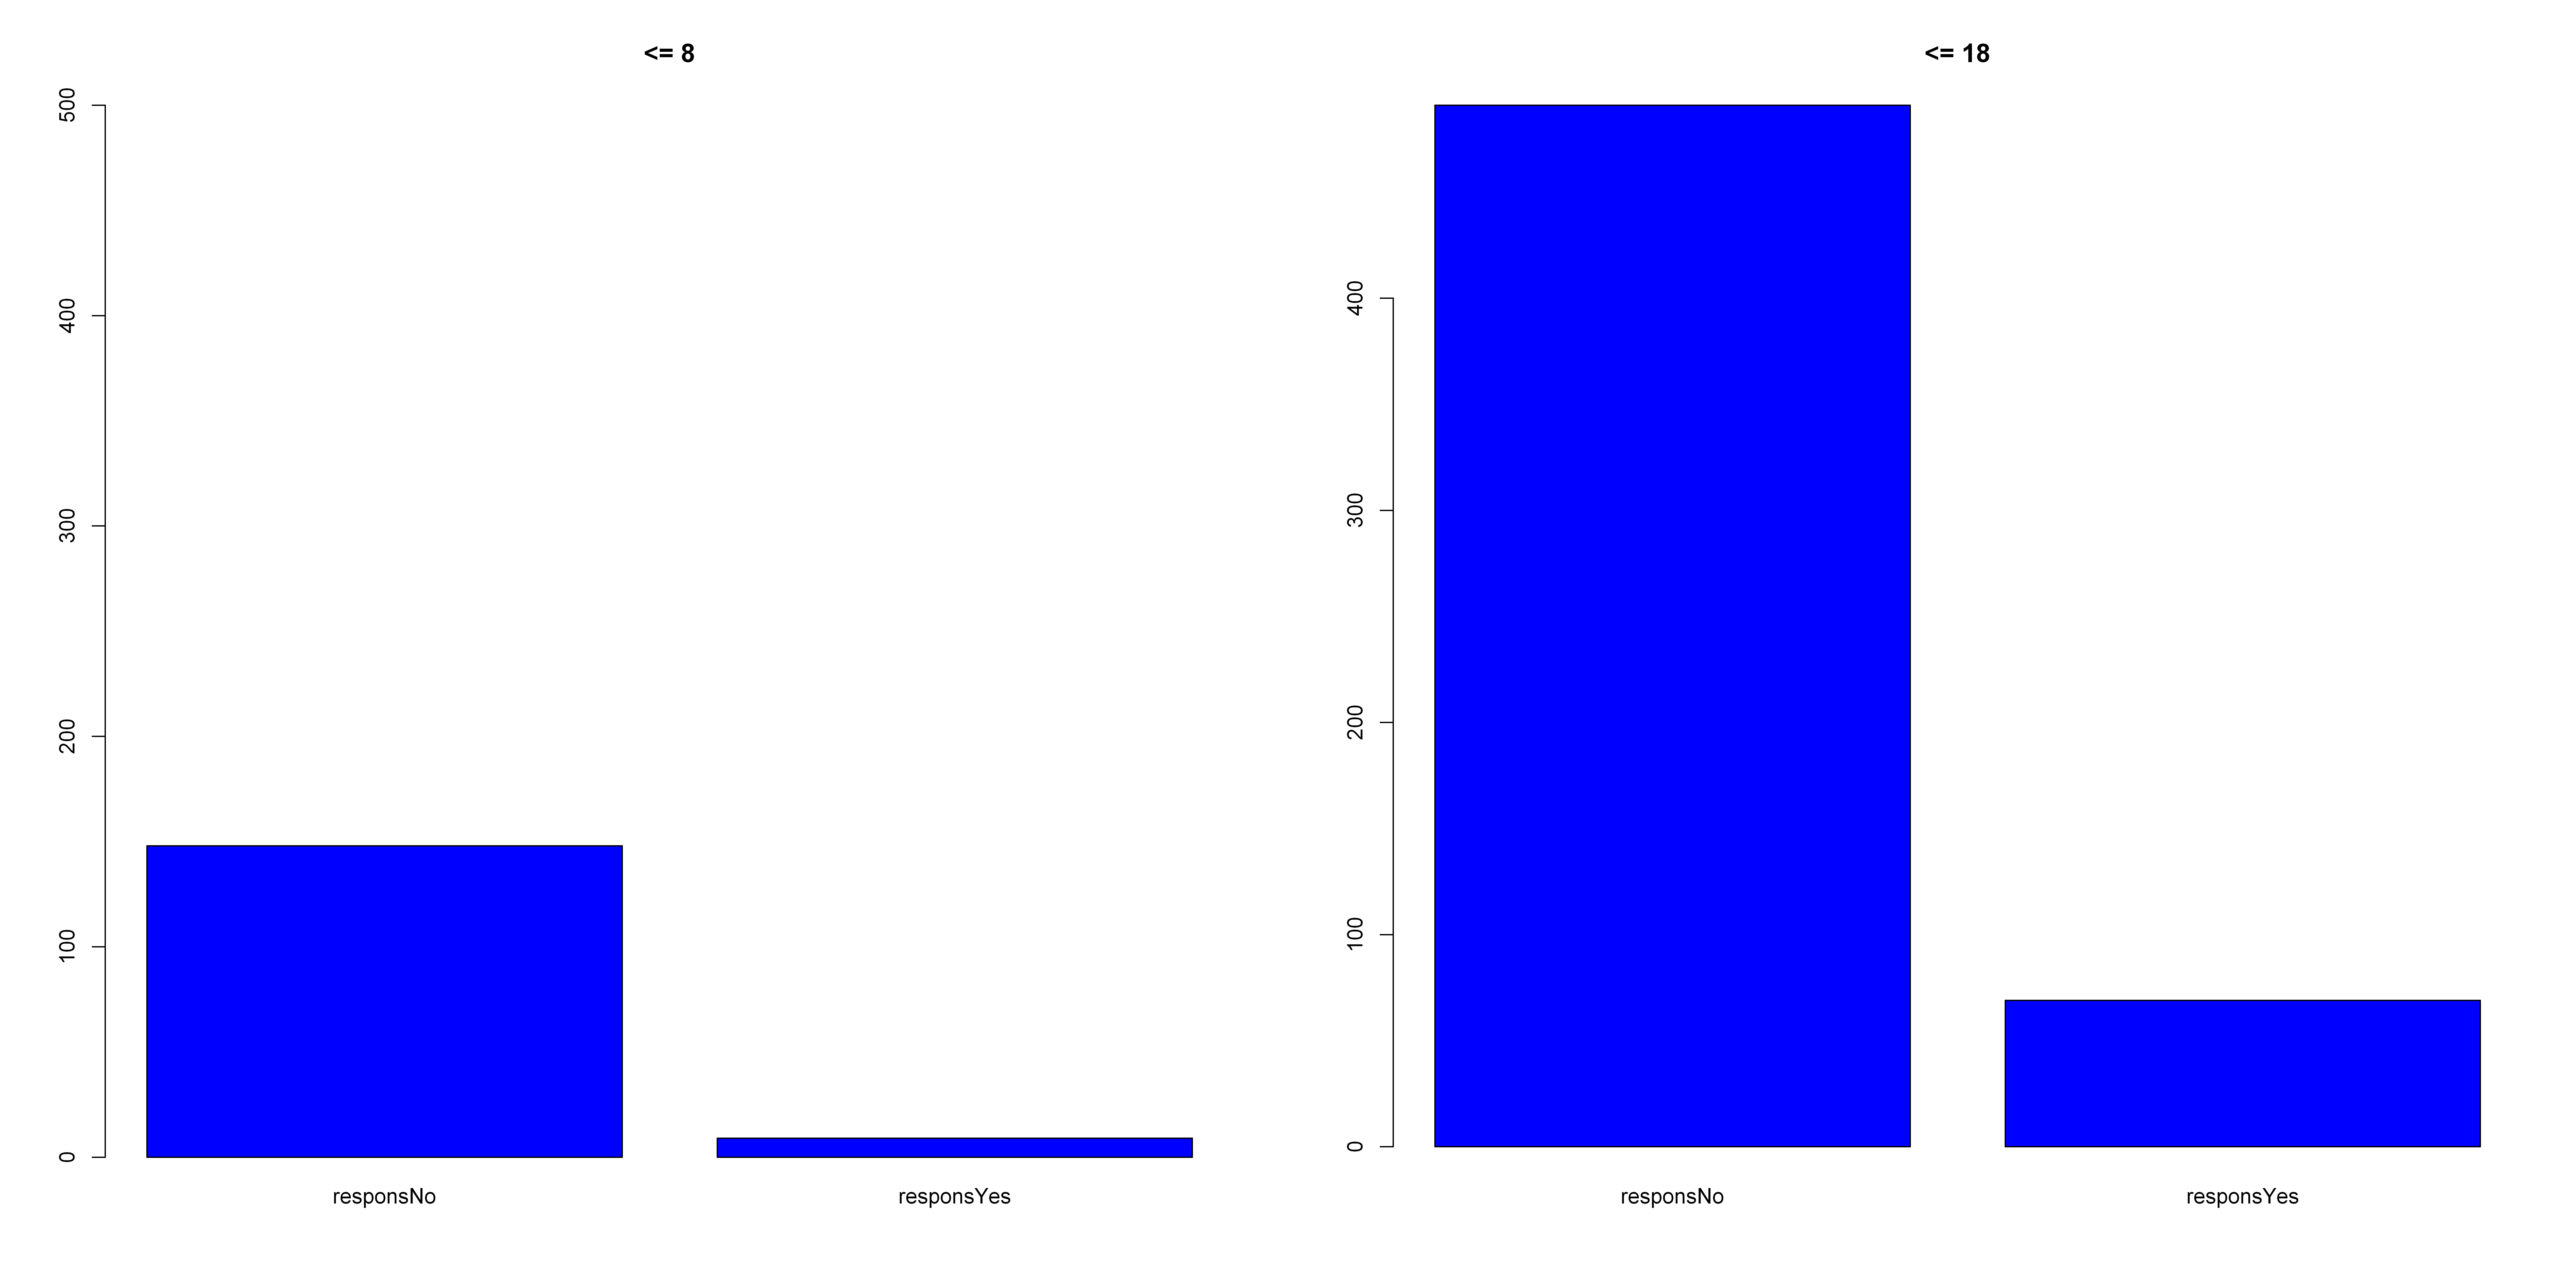

In [143]:
# Ventilazione meccanica

par(mfrow=c(1,2))

print("<= 8")
table(df1$mechanicVentilation)
barplot(table(df1$mechanicVentilation), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$mechanicVentilation)
barplot(table(df2$mechanicVentilation), main="<= 18", col="blue")

[1] "<= 8"



 responsNo responsYes 
       148          9 

[1] "<= 18"



 responsNo responsYes 
       491         69 

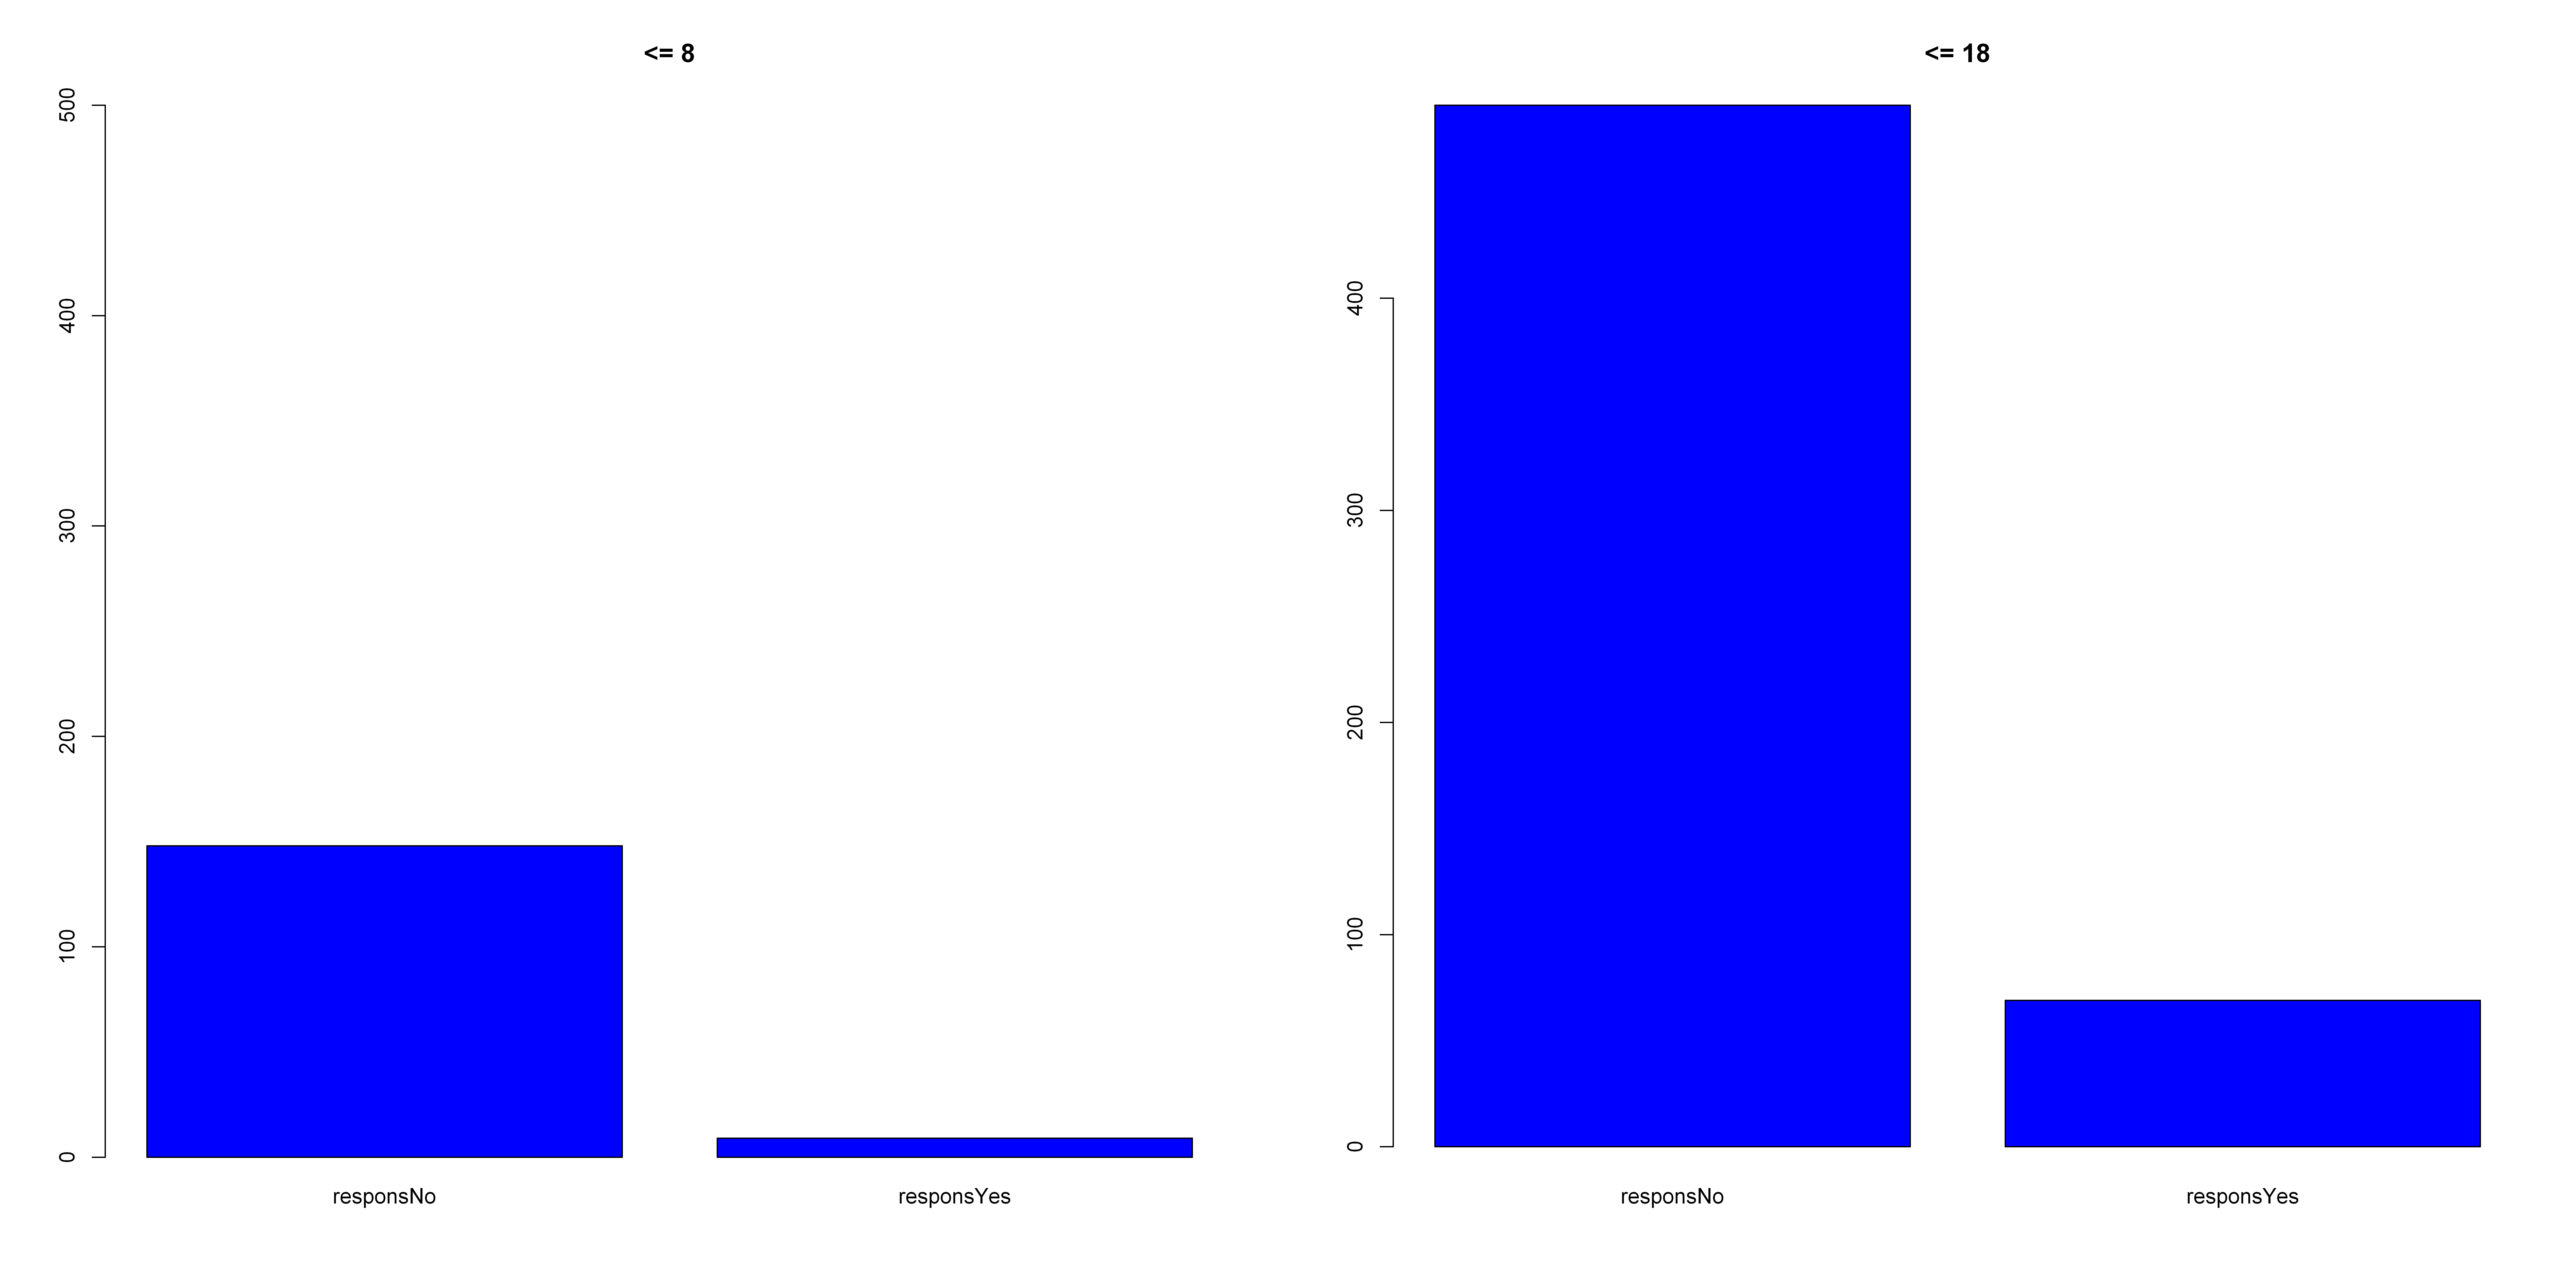

In [184]:
# Ventilazione meccanica

par(mfrow=c(1,2))

print("<= 8")
table(df1$mechanicVentilation)
barplot(table(df1$mechanicVentilation), main="<= 8", col="blue", ylim = c(0, 500))

print("<= 18")
table(df2$mechanicVentilation)
barplot(table(df2$mechanicVentilation), main="<= 18", col="blue")

[1] "<= 8"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   6.000   7.000   6.631   8.000   8.000 

[1] "<= 18"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0    11.0    13.0    13.1    15.0    18.0 

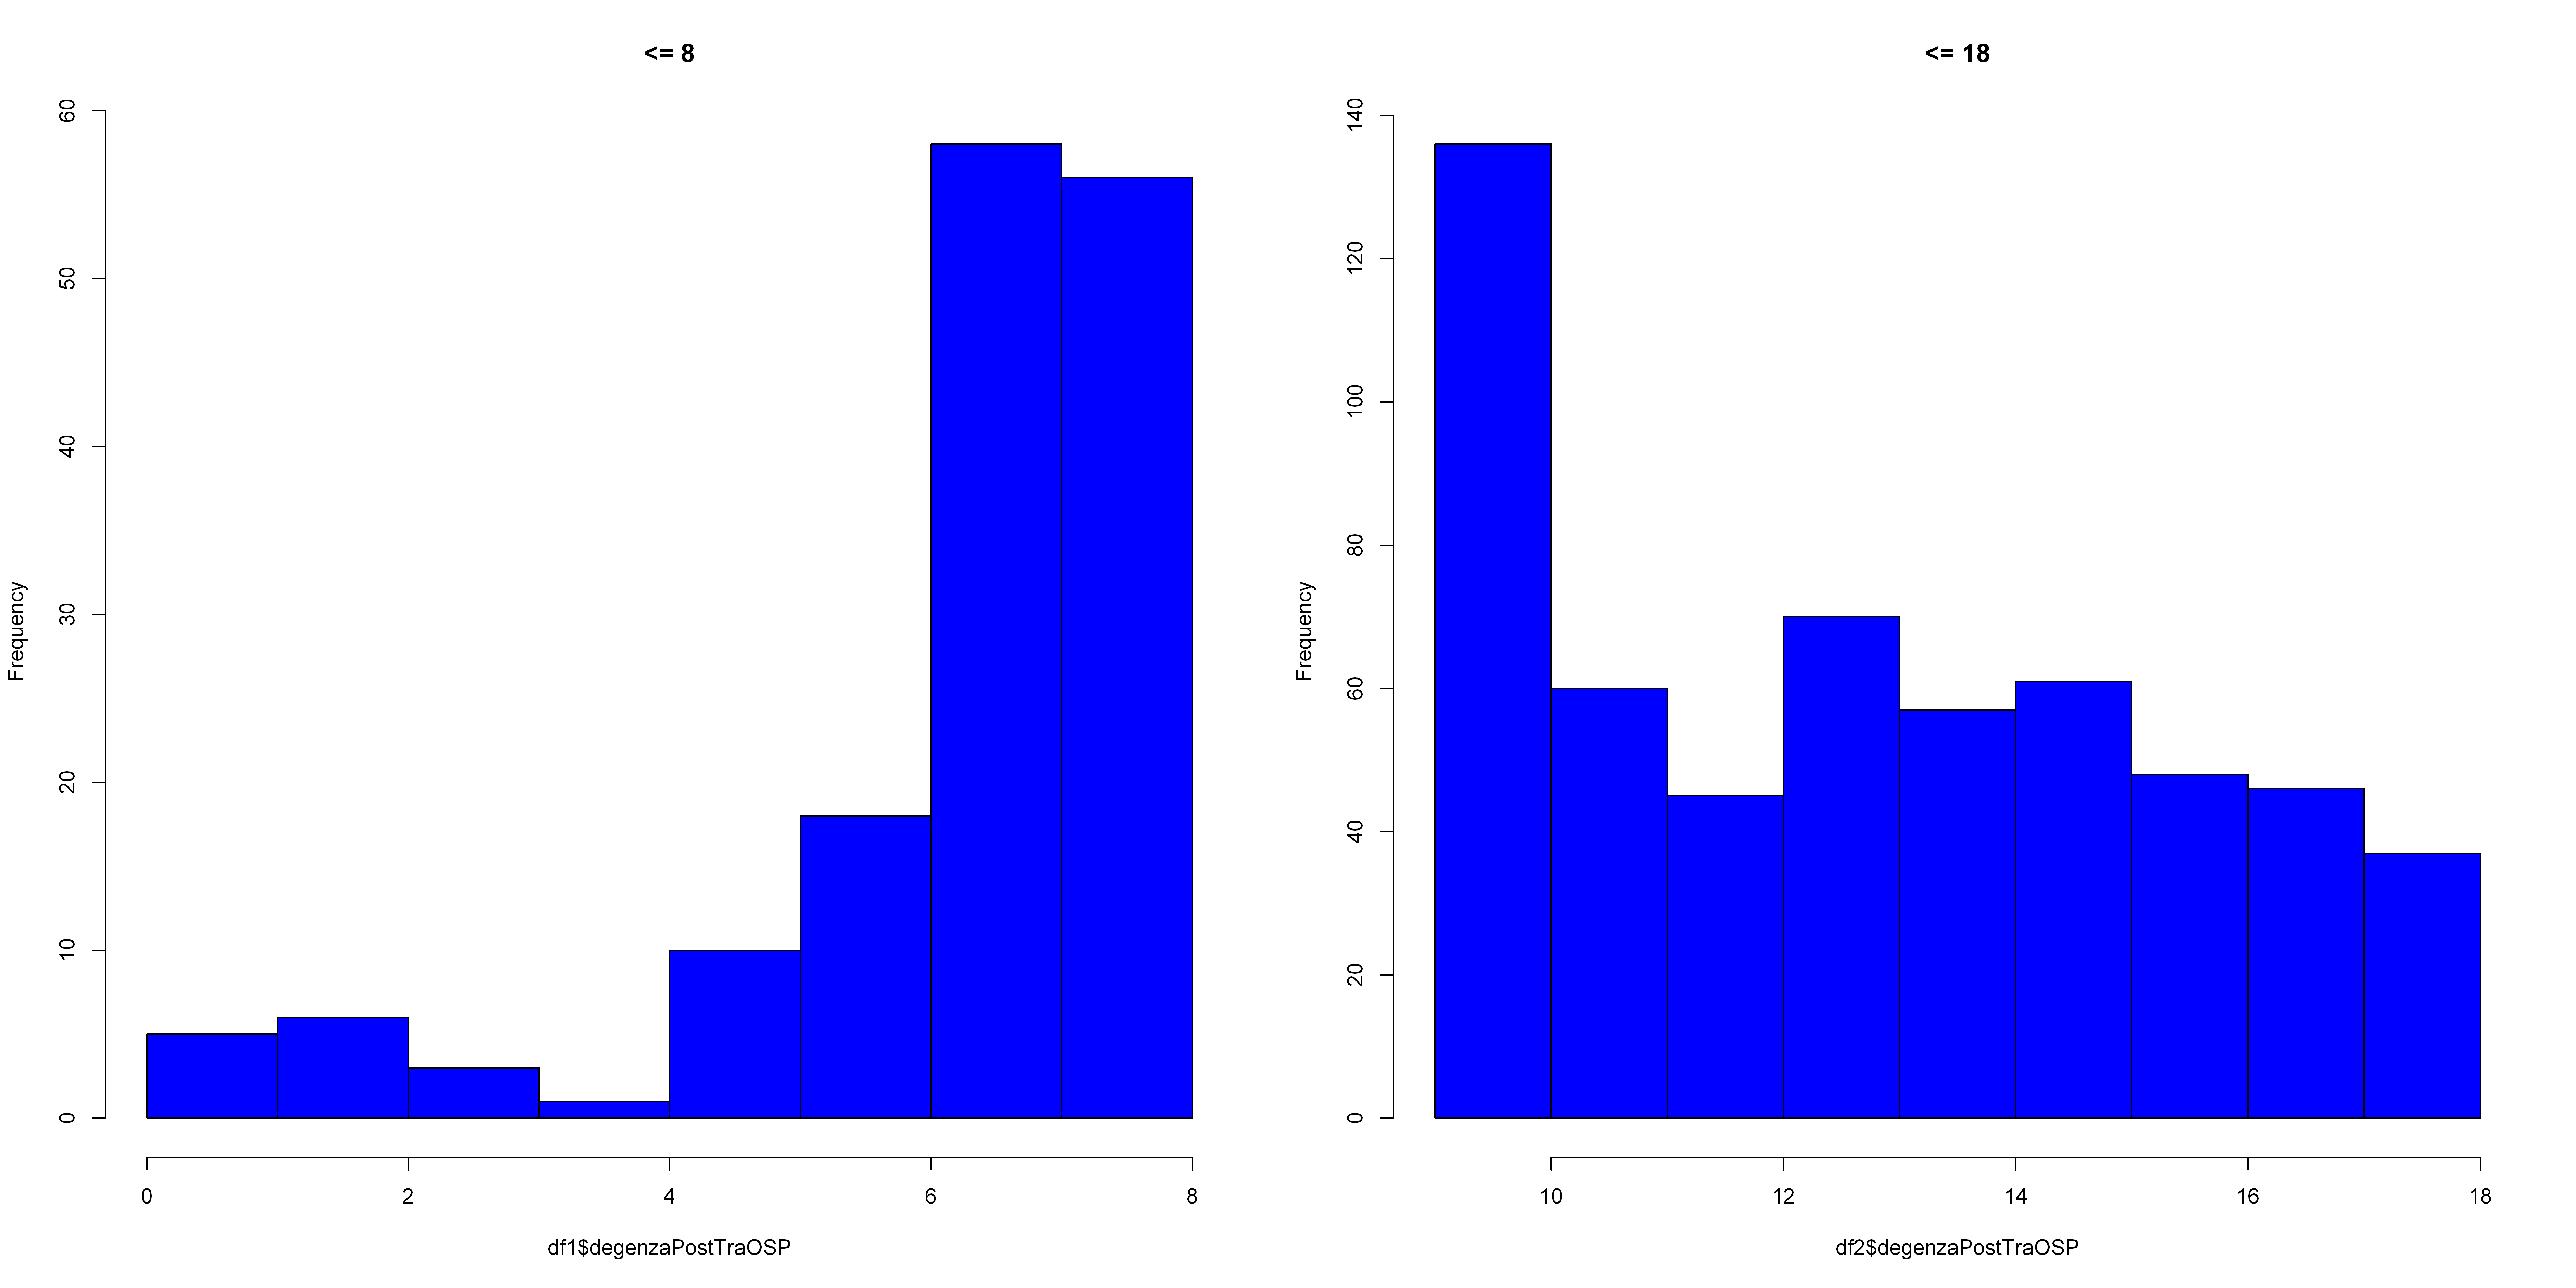

In [185]:
# Degenza ospedaliera post trapianto

par(mfrow=c(1,2))

print("<= 8")
summary(df1$degenzaPostTraOSP)
hist(df1$degenzaPostTraOSP, main="<= 8", col="blue")

print("<= 18")
summary(df2$degenzaPostTraOSP)
hist(df2$degenzaPostTraOSP, main="<= 18", col="blue")

In [ ]:



leastOneEpathenal